# 1. Очистка и подготовка данных

In [56]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


### Расходы на социальную политику

In [57]:
welfare = pd.read_excel('../data/social_russia_data/welfare_expense_share_2015_2020.xlsx')

welfare.head()

region  2015  2016  2017  2018  2019  2020
0             Российская Федерация  15.8  16.6  20.4  20.3  19.8  21.3
1  Центральный\n федеральный округ   NaN   NaN   NaN   NaN   NaN   NaN
2             Белгородская область  11.3  11.8  16.4  15.6  13.8  16.1
3                 Брянская область  22.0  26.6  24.7  23.7  20.7  23.1
4             Владимирская область  18.1  18.0  24.0  23.4  23.4  26.0

Убираем все пустые строчки, так как они относятся к округам

In [58]:
welfare.dropna(how='any', inplace=True)

welfare.head()

region  2015  2016  2017  2018  2019  2020
0  Российская Федерация  15.8  16.6  20.4  20.3  19.8  21.3
2  Белгородская область  11.3  11.8  16.4  15.6  13.8  16.1
3      Брянская область  22.0  26.6  24.7  23.7  20.7  23.1
4  Владимирская область  18.1  18.0  24.0  23.4  23.4  26.0
5   Воронежская область  15.2  15.4  22.8  20.9  19.0  21.6

Так же удалим общую строку для статистики по всей РФ

In [59]:
welfare = welfare.drop(welfare.index[0])

welfare.reset_index(drop=True, inplace=True)

welfare.head()

region  2015  2016  2017  2018  2019  2020
0  Белгородская область  11.3  11.8  16.4  15.6  13.8  16.1
1      Брянская область  22.0  26.6  24.7  23.7  20.7  23.1
2  Владимирская область  18.1  18.0  24.0  23.4  23.4  26.0
3   Воронежская область  15.2  15.4  22.8  20.9  19.0  21.6
4    Ивановская область  18.1  28.9  28.7  27.0  25.1  25.1

Заменим все названия округов написанных в 2 строки на одну

In [60]:
welfare.iloc[welfare[welfare['region'] == 'Кабардино-Балкарская\nРеспублика'].index, 0] = 'Кабардино-Балкарская Республика'
welfare.iloc[welfare[welfare['region'] == 'Карачаево-Черкесская\nРеспублика'].index, 0] = 'Карачаево-Черкесская Республика'
welfare.iloc[welfare[welfare['region'] == 'Республика Северная\nОсетия-Алания'].index, 0] = 'Республика Северная Осетия-Алания'
welfare.iloc[welfare[welfare['region'] == 'Ханты-Мансийский \nавтономный округ - Югра'].index, 0] = 'Ханты-Мансийский АО'
welfare.iloc[welfare[welfare['region'] == 'Ямало-Ненецкий \nавтономный округ'].index, 0] = 'Ямало-Hенецкий АО'

Посмотрим все получившиеся регионы

In [61]:
all_regions = welfare['region'].values

all_regions

array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Ненецкий автономный округ', 'Республика Адыгея',
       'Республика Калмыкия', 'Республика Крым', 'Краснодарский край',
       'Астраханская область', 'Волгоградская область',
       'Ростовская область', 'г. Севастополь', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',


Создадим новый датафрейм из регионов куда будем складывать всю объединенную статистику

In [62]:
data = pd.DataFrame(all_regions, columns=['region'])

print(data)

                          region
0           Белгородская область
1               Брянская область
2           Владимирская область
3            Воронежская область
4             Ивановская область
..                           ...
80              Амурская область
81           Магаданская область
82           Сахалинская область
83  Еврейская автономная область
84    Чукотский автономный округ

[85 rows x 1 columns]


Заполним новую таблицу расходами по соц политике на регион.

In [63]:
for col in welfare.columns[1:]:
    data[f'welfare_{col}'] = welfare[col]
    
data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  
0          15.6          13.8          16.1  
1          23.7          20.7          23.1  
2          23.4          23.4          26.0  
3          20.9          19.0          21.6  
4          27.0          25.1          25.1

In [64]:
# Функция для линейного графа

def create_linear_graphs(df, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))

    # Create line plot
    for column in df.columns:
        plt.plot(df.index, df[column], 
                marker='o', linewidth=2, label=column)

    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Значение', fontsize=12)
    plt.title(f'Динамика {title} по регионам', fontsize=14, fontweight='bold')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [65]:
# Функция отрисовывает линейные графики для 10 лучших и 10 худших показателей

def create_less_most_region_graph(df, title):
    copy = df[df['region'].isin(all_regions)].copy()

    copy['mean'] = copy.iloc[:, 1:].mean(axis=1)
    graphic_most = copy.sort_values('mean', ascending=False).drop(['mean'], axis=1)
    graphic_most = graphic_most.iloc[:10].set_index('region')
    graphic_most = graphic_most.T
    create_linear_graphs(graphic_most, title)
    
    graphic_less = copy.sort_values('mean').drop(['mean'], axis=1)
    graphic_less = graphic_less.iloc[:10].set_index('region')
    graphic_less = graphic_less.T
    create_linear_graphs(graphic_less, title)


In [66]:
# Конвертер областей в нужный формат написания
def common_converter(df, region = 'region'):
    df[region] = df[region].str.lstrip()
    df.iloc[df[df[region] == 'Ямало-Ненецкий автономный округ (Тюменская область)'].index, 0] = 'Ямало-Hенецкий АО'
    df.iloc[df[df[region] == 'Ханты-Мансийский автономный округ - Югра (Тюменская область)'].index, 0] = 'Ханты-Мансийский АО'
    df.iloc[df[df[region] == 'Ненецкий автономный округ (Архангельская область)'].index, 0] = 'Ненецкий автономный округ'
    df.iloc[df[df[region] == 'Город Москва столица Российской Федерации город федерального значения'].index, 0] = 'г. Москва'
    df.iloc[df[df[region] == 'Город Санкт-Петербург город федерального значения'].index, 0] = 'г. Санкт-Петербург'
    df.iloc[df[df[region] == 'Город федерального значения Севастополь'].index, 0] = 'г. Севастополь'
    df.iloc[df[df[region] == 'Чувашская Республика - Чувашия'].index, 0] = 'Чувашская Республика'
    df.iloc[df[df[region] == 'Республика Татарстан (Татарстан)'].index, 0] = 'Республика Татарстан'
    df.iloc[df[df[region] == 'Республика Адыгея (Адыгея)'].index, 0] = 'Республика Адыгея'
    df.iloc[df[df[region] == 'Кемеровская область - Кузбасс'].index, 0] = 'Кемеровская область'

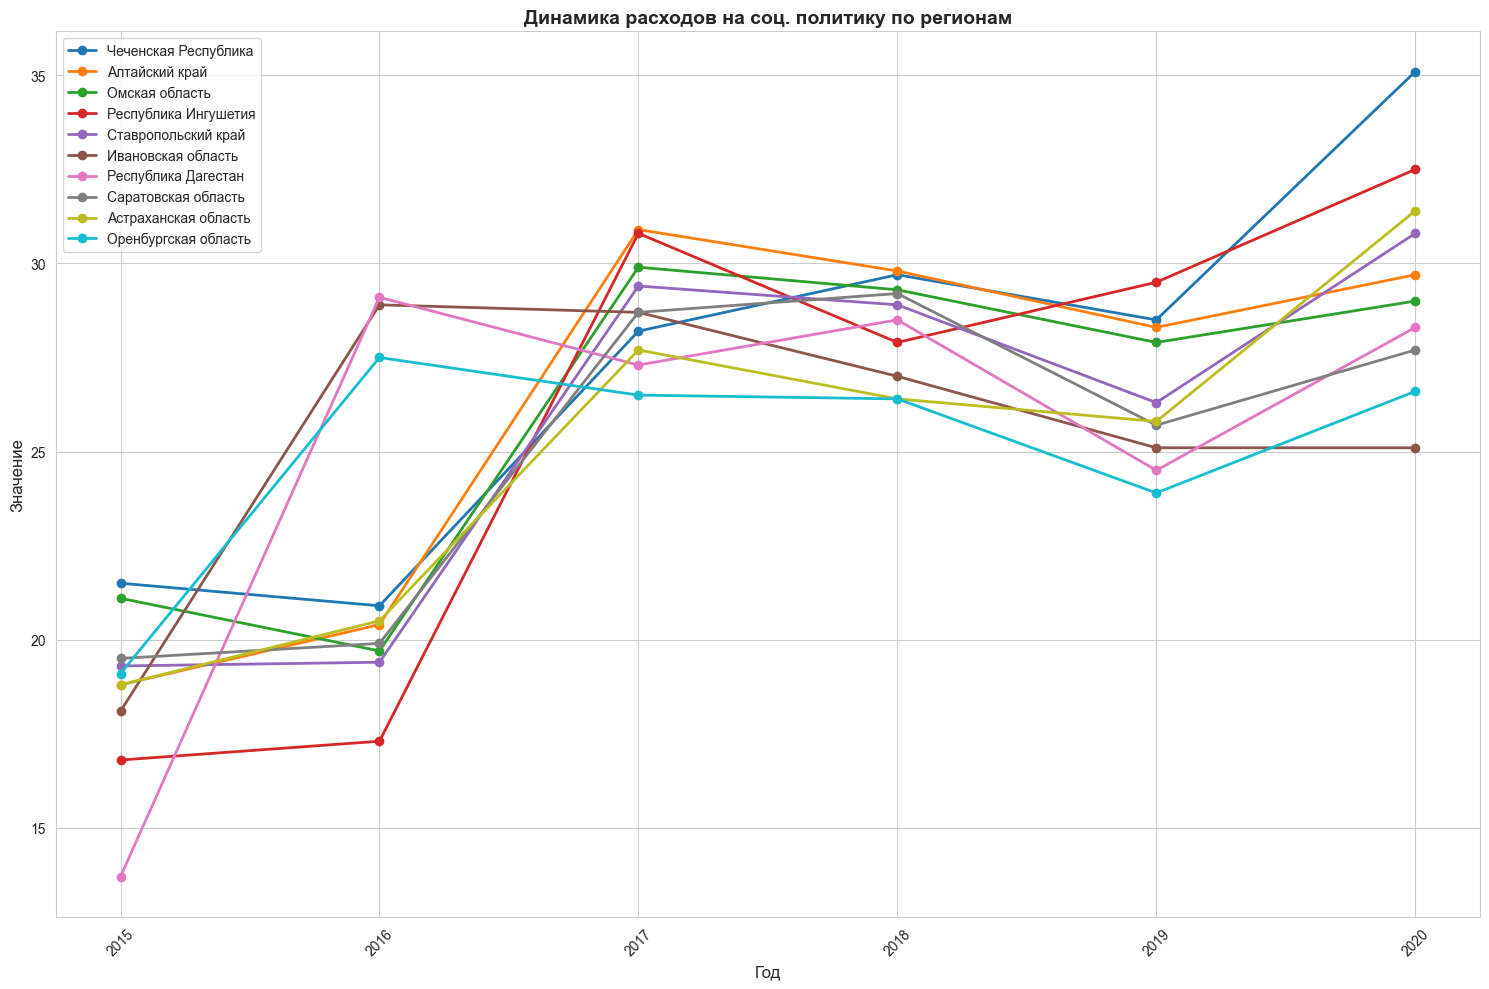

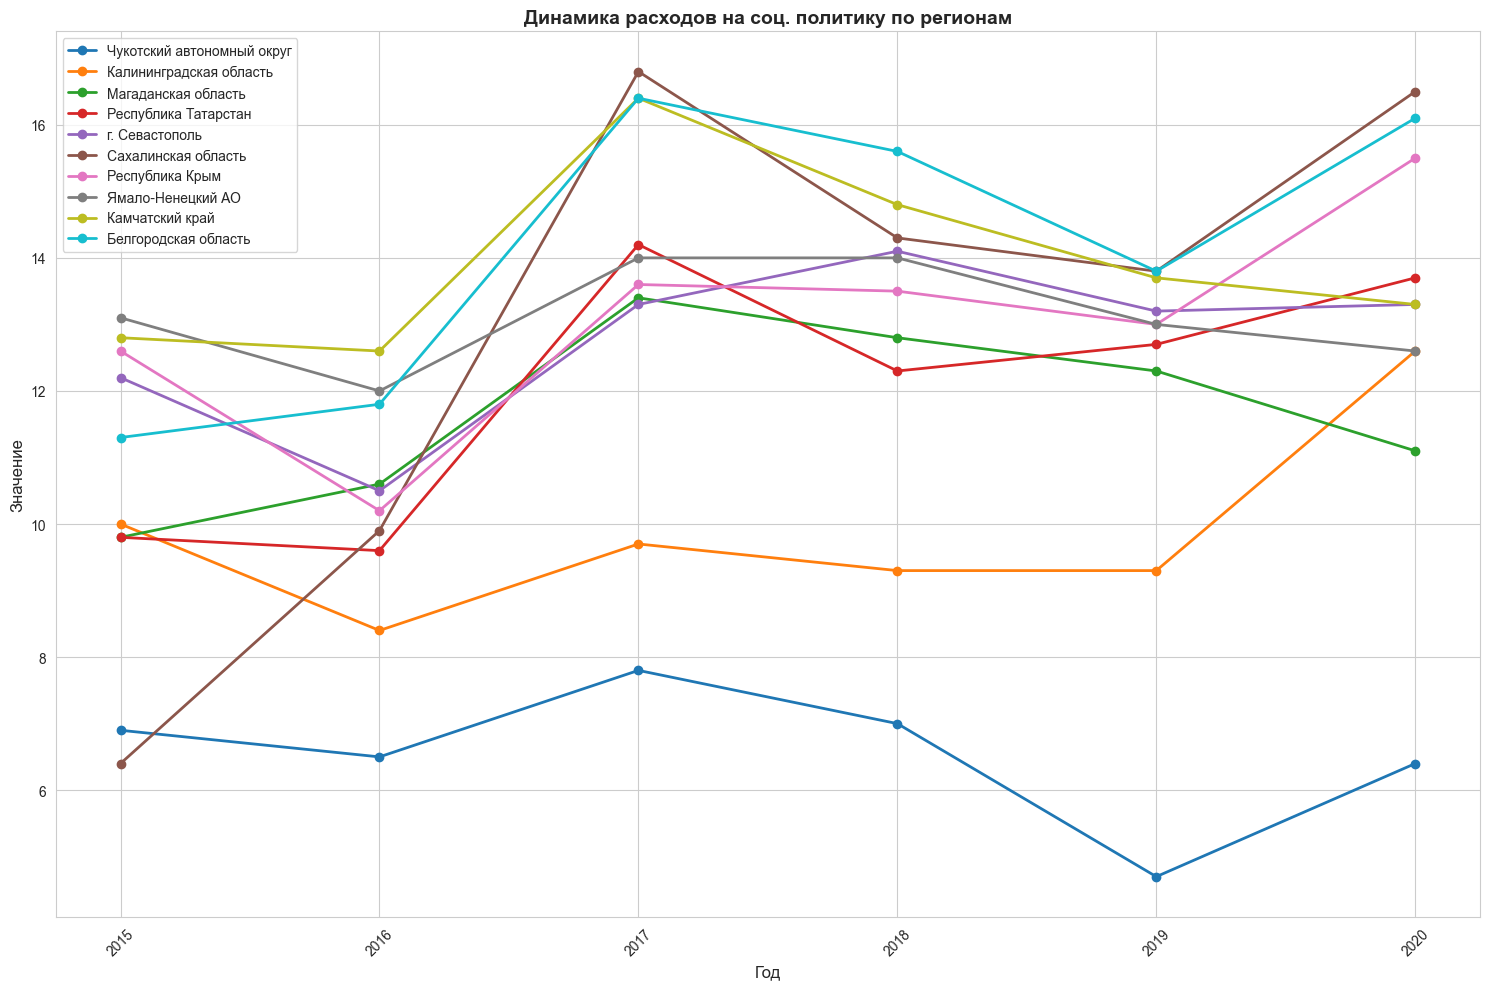

In [67]:
create_less_most_region_graph(welfare, 'расходов на соц. политику')

Как видно из графиков в 2020 году больше всего денег на соц политику уходило на Чеченскую республику, а меньше всего на Чукотский автономный округ. При этом в 2015 году так же этот показатель был низок по г. Москва. Данная статистика не сильно дает нам выделить малообеспеченные регионы. Продолжим исследовать данные.

### Численность населения

In [68]:
population = pd.read_excel('../data/social_russia_data/population.xlsx')

population.head()

Unnamed: 0    Unnamed: 1  \
0                                                NaN           NaN   
1                                      все население  w2:p_mest:11   
2                               Российская Федерация           643   
3  Раздел 1. Муниципальные образования субъектов ...   00000000000   
4                      Центральный федеральный округ           030   

  23110000100030200002 Численность постоянного населения на 1 января  \
0                                     январь 1999 г.                   
1                                                NaN                   
2                                                NaN                   
3                                          147539426                   
4                                                NaN                   

  23110000100030200002 Численность постоянного населения на 1 января.1  \
0                                     январь 2000 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          146890128                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.2  \
0                                     январь 2001 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          146303611                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.3  \
0                                     январь 2002 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          145649334                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.4  \
0                                     январь 2003 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          144963650                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.5  \
0                                     январь 2004 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          144333586                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.6  \
0                                     январь 2005 г.                     
1                                                NaN                     
2                                                NaN                     
3                                          143801046                     
4                                                NaN                     

  23110000100030200002 Численность постоянного населения на 1 января.7  ...  \
0                                     январь 2006 г.                    ...   
1                                                NaN                    ...   
2                                                NaN                    ...   
3                                          143236582                    ...   
4                                                NaN                    ...   

  23110000100030200002 Численность постоянн

Приведем таблицу в читаемый вид

In [69]:
new_columns = population.iloc[0].values
population = population.iloc[1:].set_axis(new_columns, axis=1)

In [70]:
population = population.drop(population.index[0])

In [71]:
population.columns.values[0] = 'region'
population.columns.values[1] = 'code'
columns = list(['region','code', *[x.split()[1] for x in population.columns[2:]]])

population.columns = columns

In [72]:
population['region'] = population['region'].shift(1)

In [73]:
population.drop(['code'], axis=1, inplace=True)
population.reset_index(drop=True, inplace=True)

In [74]:
population.head()

region       1999       2000  \
0                                               None        NaN        NaN   
1                               Российская Федерация  147539426  146890128   
2  Раздел 1. Муниципальные образования субъектов ...        NaN        NaN   
3                      Центральный федеральный округ   38311159   38227656   
4  Раздел 1. Муниципальные образования субъектов ...        NaN        NaN   

        2001       2002       2003       2004       2005       2006  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  146303611  145649334  144963650  144333586  143801046  143236582   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3   38175094   38068452   37946810   37965073   38044068   38109006   
4        NaN        NaN        NaN        NaN        NaN        NaN   

        2007  ...       2013       2014       2015       2016       2017  \
0        NaN  ...        NaN        NaN        NaN        NaN        NaN   
1  142862692  ...  143347059  143666931  146267288  146544710  146804372   
2        NaN  ...        NaN        NaN        NaN        NaN        NaN   
3   38183357  ...   38678913   38819874   38951479   39104319   39209582   
4        NaN  ...        NaN        NaN        NaN        NaN        NaN   

        2018       2019       2020       2021       2022  
0        NaN        NaN        NaN        NaN        NaN  
1  146880432  146780720  146748590  146171015  145557576  
2        NaN        NaN        NaN        NaN        NaN  
3   39311413   39378059   39433556   39250960   39104400  
4        NaN        NaN        NaN        NaN        NaN  

[5 rows x 25 columns]

In [75]:
population = population.drop(population.index[0])
population = population[~population['region'].str.startswith('Раздел')]
population.reset_index(drop=True, inplace=True)

In [76]:
population.head()

region       1999       2000       2001       2002  \
0           Российская Федерация  147539426  146890128  146303611  145649334   
1  Центральный федеральный округ   38311159   38227656   38175094   38068452   
2           Белгородская область    1494868    1501699    1506976    1508137   
3               Брянская область    1437471    1423178    1407965    1391430   
4           Владимирская область    1592184    1575507    1558052    1539179   

        2003       2004       2005       2006       2007  ...       2013  \
0  144963650  144333586  143801046  143236582  142862692  ...  143347059   
1   37946810   37965073   38044068   38109006   38183357  ...   38678913   
2    1511899    1513860    1511662    1511715    1514153  ...    1540985   
3    1375004    1360249    1344132    1327652    1312748  ...    1253666   
4    1520057    1509571    1497598    1486453    1475861  ...    1421742   

        2014       2015       2016       2017       2018       2019  \
0  143666931  146267288  146544710  146804372  146880432  146780720   
1   38819874   38951479   39104319   39209582   39311413   39378059   
2    1544108    1547936    1550137    1552865    1549876    1547418   
3    1242599    1232940    1225741    1220530    1210982    1200187   
4    1413321    1405613    1397168    1389599    1378337    1365805   

        2020       2021       2022  
0  146748590  146171015  145557576  
1   39433556   39250960   39104400  
2    1549151    1541259    1531917  
3    1192491    1182682    1168771  
4    1358416    1342099    1323659  

[5 rows x 25 columns]

Данные в таблице представлены с 1999 по 2022 года

In [77]:
common_converter(population)

In [78]:
population[population.isna().any(axis=1)]

region      1999      2000  \
25   Архангельская область (кроме Ненецкого автоном...       NaN       NaN   
33               Южный федеральный округ (по 2009 год)  22719026  22742546   
34               Южный федеральный округ (с 2010 года)       NaN       NaN   
35              Южный федеральный округ (с 29.07.2016)       NaN       NaN   
38                                     Республика Крым       NaN       NaN   
..                                                 ...       ...       ...   
240                     Усть-Ордынский Бурятский округ    134461    134694   
244                  Дальневосточный федеральный округ   7027462   6913279   
245                  Дальневосточный федеральный округ       NaN       NaN   
250  Корякский округ, входящий в состав Камчатского...     27480     26645   
258                         Крымский федеральный округ       NaN       NaN   

         2001      2002     2003      2004      2005      2006      2007  ...  \
25        NaN       NaN      NaN   1273668   1257312   1239924   1224813  ...   
33   22761875  22853022      NaN       NaN       NaN       NaN       NaN  ...   
34        NaN       NaN      NaN  13905906  13870776  13837111  13820436  ...   
35        NaN       NaN      NaN       NaN       NaN       NaN       NaN  ...   
38        NaN       NaN      NaN       NaN       NaN       NaN       NaN  ...   
..        ...       ...      ...       ...       ...       ...       ...  ...   
240    134735    135210      NaN       NaN       NaN       NaN       NaN  ...   
244   6832034   6743006  6679743   6608263   6537601   6460402   6398557  ...   
245       NaN       NaN      NaN       NaN       NaN       NaN       NaN  ...   
250     25831     25685      NaN       NaN       NaN       NaN       NaN  ...   
258       NaN       NaN      NaN       NaN       NaN       NaN       NaN  ...   

         2013      2014      2015      2016      2017      2018      2019  \
25    1159506   1148760   1139950   1130240   1121813   1111031   1100290   
33        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
34   13910179  13963874  14003828  14044580       NaN       NaN       NaN   
35        NaN       NaN       NaN       NaN  16428458  16441852  16454550   
38        NaN       NaN   1895915   1907106   1912168   1913731   1911818   
..        ...       ...       ...       ...       ...       ...       ...   
240       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
244   6251496   6226640   6211021   6194969   6182679   6165284       NaN   
245       NaN       NaN       NaN       NaN       NaN       NaN   8188623   
250       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
258       NaN       NaN   2294888   2323369       NaN       NaN       NaN   

         2020      2021      2022  
25    1092424   1082662   1069782  
33        NaN       NaN       NaN  
34        NaN       NaN       NaN  
35   16466084  16482488  16434898  
38    1912622   1901578   1896393  
..        ...       ...       ...  
240       NaN       NaN       NaN  
244       NaN       NaN       NaN  
245   8169203   8124053   8091244  
250       NaN       NaN       NaN  
258       NaN       NaN       NaN  

[171 rows x 25 columns]

Заполним пропуски медианными значениями по региону

In [79]:
population.iloc[:,1:] = population.iloc[:,1:].apply(lambda row: row.fillna(row.median()), axis=1)

/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/1954674319.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  population.iloc[:,1:] = population.iloc[:,1:].apply(lambda row: row.fillna(row.median()), axis=1)
/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/1954674319.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  population.iloc[:,1:] = population.iloc[:,1:].apply(lambda row: row.fillna(row.median()), axis=1)
/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/1954674319.py:1: FutureWarning: Downcasting ob

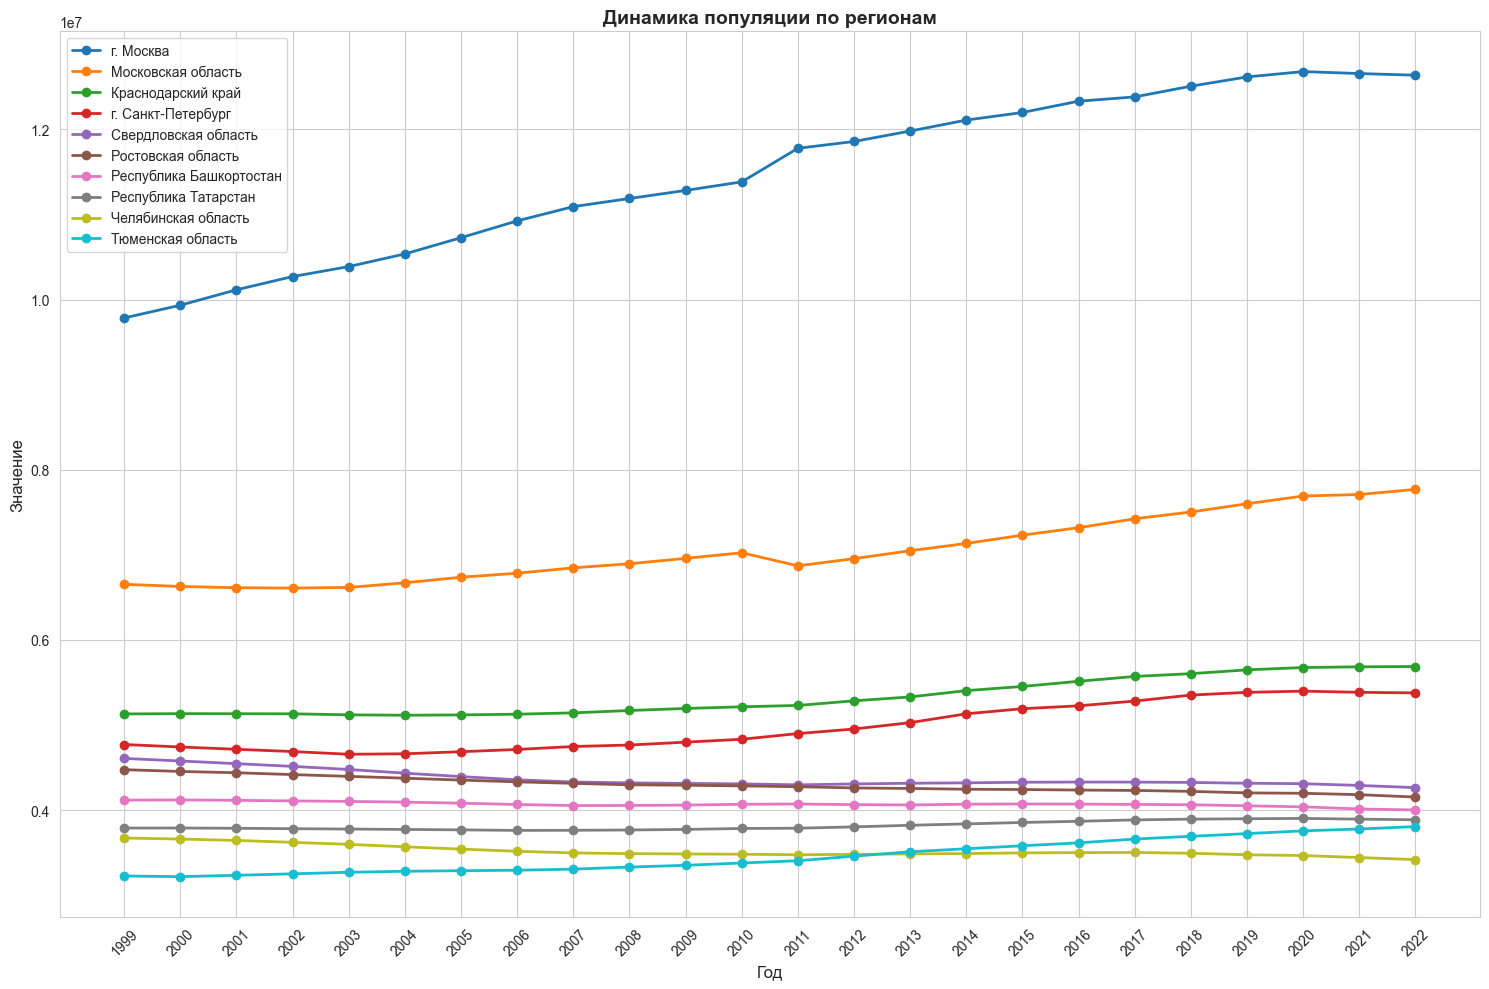

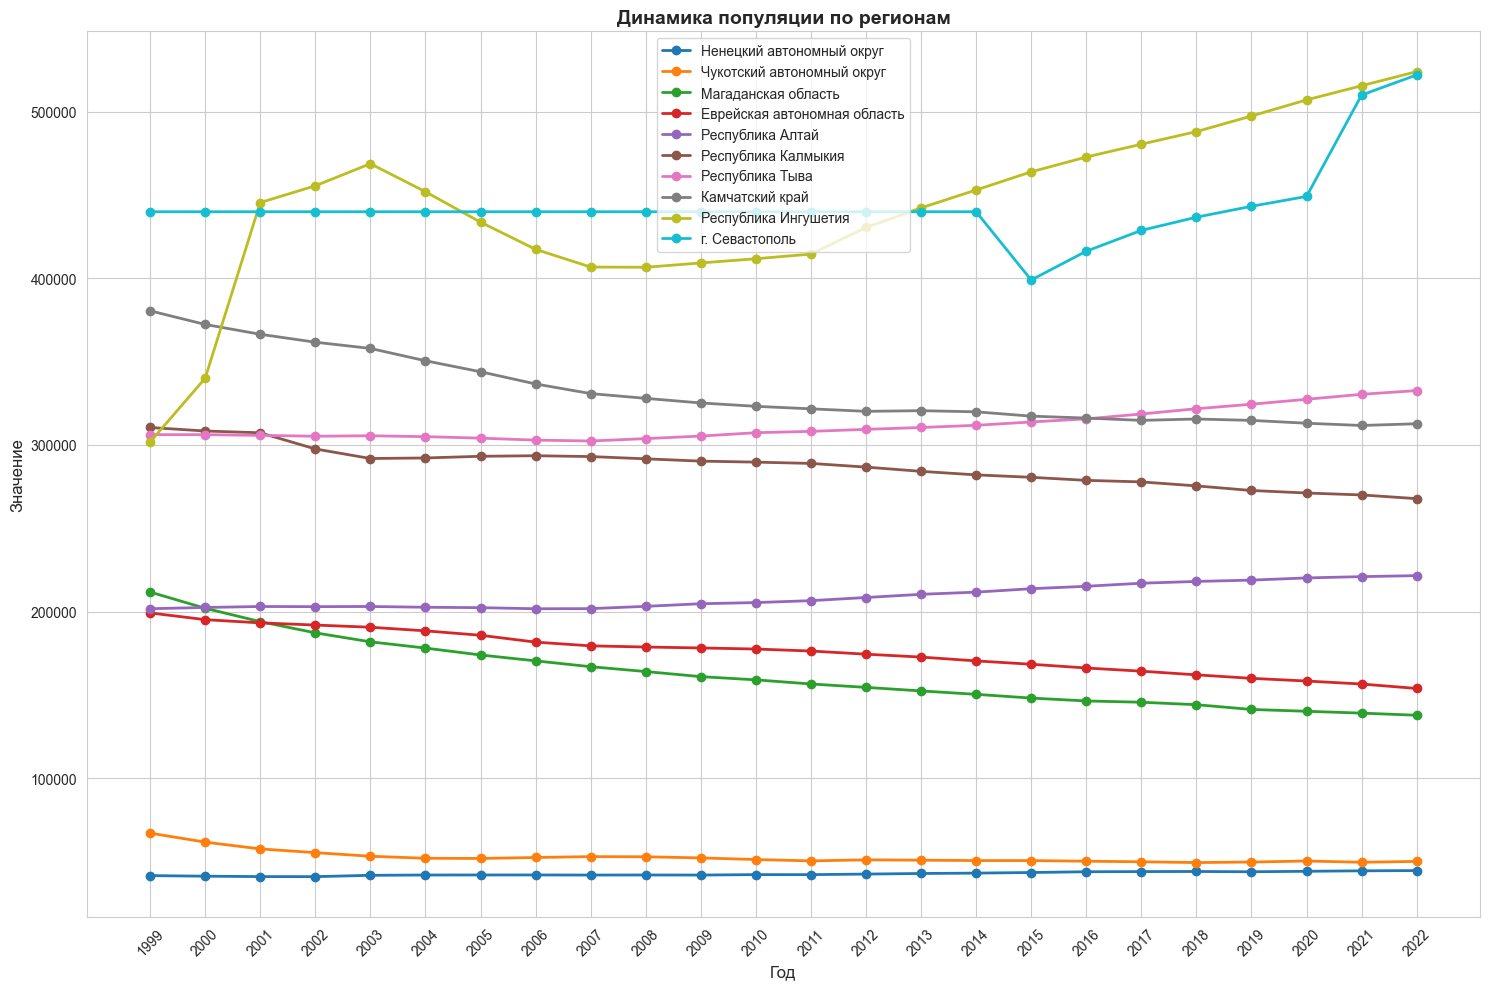

In [80]:
create_less_most_region_graph(population, 'популяции')

По Графикам хорошо заметно, что Москва намного опережает другие регионы по увеличению чесленности. Регионы с самой низкой численностью являются Чукотский автономный округ и Ненецкий астономный округ. Можем их пока отнести к бедным регионам, так как туда не переезжают жить люди. Также отметим тенденцию к снижению численности в Еврейской области и Магаданской области.

In [81]:
population = population.add_prefix('population_')

Добавим данные в общую таблицу

In [82]:
data = data.join(population.set_index('population_region'), on="region", how="left")

In [83]:
data[data.isna().any(axis=1)].sort_index()

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022]
Index: []

[0 rows x 31 columns]

### Процент людей за гранью бедности

In [84]:
poverty_percent = pd.read_csv('../data/social_russia_data/poverty_percent_by_regions_1992_2020.csv')

poverty_percent.head()

region  year  poverty_percent
0  Российская Федерация  1992             33.5
1  Российская Федерация  1993             31.3
2  Российская Федерация  1994             22.4
3  Российская Федерация  1995             24.8
4  Российская Федерация  1996             22.1

Составим таблицу по аналогии с предыдущими, где колонки это год, а регионы с процентами бедности будут в строках

In [85]:
poverty_percent = poverty_percent.pivot(index='region', columns='year', values='poverty_percent').reset_index()

poverty_percent.columns.name = None 

display(poverty_percent)

region  1992  1993  1994  1995  \
0               Архангельская область (кроме Ненец...   NaN   NaN   NaN   NaN   
1               Ненецкий автономный округ (Арханге...   NaN   NaN   NaN   0.0   
2               Тюменская область (кроме Ханты-Ман...   NaN   NaN   NaN   NaN   
3               Ханты-Мансийский автономный округ ...   NaN   NaN   NaN   0.0   
4               Ямало-Ненецкий автономный округ (Т...   NaN   NaN   NaN   0.0   
..                                                ...   ...   ...   ...   ...   
93                        Уральский федеральный округ   NaN   NaN   NaN   NaN   
94                      Центральный федеральный округ   NaN   NaN   NaN   NaN   
95              Южный федеральный округ (с 2010 года)   NaN   NaN   NaN   NaN   
96             Южный федеральный округ (с 29.07.2016)   NaN   NaN   NaN   NaN   
97                               Российская Федерация  33.5  31.3  22.4  24.8   

    1996  1997  1998  1999  2000  ...  2011  2012  2013  2014  2015  2016  \
0    NaN   NaN   NaN   NaN   NaN  ...   NaN  13.0  14.5  14.5  16.2  14.9   
1    0.0   0.0   0.0   0.0  37.9  ...   7.7   6.5   7.8   8.9   9.4  10.1   
2    NaN   NaN   NaN   NaN   NaN  ...   NaN  10.4  11.8  12.0  14.7  15.5   
3    0.0   0.0   0.0   0.0  11.8  ...  10.6   9.8  10.4  11.1  11.9  11.6   
4    0.0   0.0   0.0   0.0  11.1  ...   7.4   6.4   6.4   6.7   7.5   7.1   
..   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
93   NaN   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   
94   NaN   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   
95   NaN   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   NaN   
96   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   0.0   0.0   
97  22.1  20.8  23.4  28.4  29.0  ...  12.7  10.7  10.8  11.3  13.4  13.2   

    2017  2018  2019  2020  
0   13.9  12.5  12.7  12.3  
1   10.6   9.7   9.4   9.4  
2   15.4  14.3  14.4  13.6  
3    9.5   9.0   8.9   8.4  
4    6.1   5.8   5.5   4.8  
..   ...   ...   ...   ...  
93   0.0   0.0   NaN   NaN  
94   0.0   0.0   NaN   NaN  
95   NaN   NaN   NaN   NaN  
96   0.0   0.0   NaN   NaN  
97  12.9  12.6  12.3  12.1  

[98 rows x 30 columns]

Видим большое кол-во пропусков удалим такие строки и столбцы

In [86]:
thresh = poverty_percent.shape[0]*0.7

poverty_percent = poverty_percent.dropna(thresh=thresh, axis=1)

In [87]:
thresh_value = int(0.7 * len(poverty_percent.columns))

poverty_percent = poverty_percent.dropna(thresh=thresh_value)

poverty_percent.reset_index(drop=True, inplace=True)

In [88]:
common_converter(poverty_percent)

In [89]:
poverty_percent.head()

region  1995  1996  1997  1998  1999  2000  2001  2002  \
0  Ненецкий автономный округ   0.0   0.0   0.0   0.0   0.0  37.9  26.9  21.5   
1        Ханты-Мансийский АО   0.0   0.0   0.0   0.0   0.0  11.8   9.3  11.6   
2          Ямало-Hенецкий АО   0.0   0.0   0.0   0.0   0.0  11.1   9.3   7.7   
3             Алтайский край  33.7  46.8  45.7  52.9  53.8  53.9  47.3  38.9   
4           Амурская область  36.1  28.2  26.3  31.2  38.0  47.7  45.3  44.6   

   2003  ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
0   8.3  ...   7.7   6.5   7.8   8.9   9.4  10.1  10.6   9.7   9.4   9.4  
1  10.6  ...  10.6   9.8  10.4  11.1  11.9  11.6   9.5   9.0   8.9   8.4  
2   8.0  ...   7.4   6.4   6.4   6.7   7.5   7.1   6.1   5.8   5.5   4.8  
3  33.9  ...  22.6  20.6  17.6  17.1  18.0  17.8  17.5  17.4  17.6  17.5  
4  35.6  ...  20.4  16.0  16.2  14.8  15.2  17.0  16.7  15.6  15.7  15.2  

[5 rows x 27 columns]

In [90]:
poverty_percent[poverty_percent.isna().any(axis=1)]

region  1995  1996  1997  1998  1999  2000  2001  2002  \
79  Чеченская Республика   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    2003  ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
79   0.0  ...   0.0  21.7  17.8  14.2  16.0  17.3  20.7  20.5  20.7  20.4  

[1 rows x 27 columns]

Заменим 0 на nan и заполним пустые значения

In [91]:
poverty_percent = poverty_percent.replace(0, np.nan)

In [92]:
poverty_percent.iloc[:,1:] = poverty_percent.iloc[:,1:].apply(lambda row: row.fillna(round(row.bfill())), axis=1)

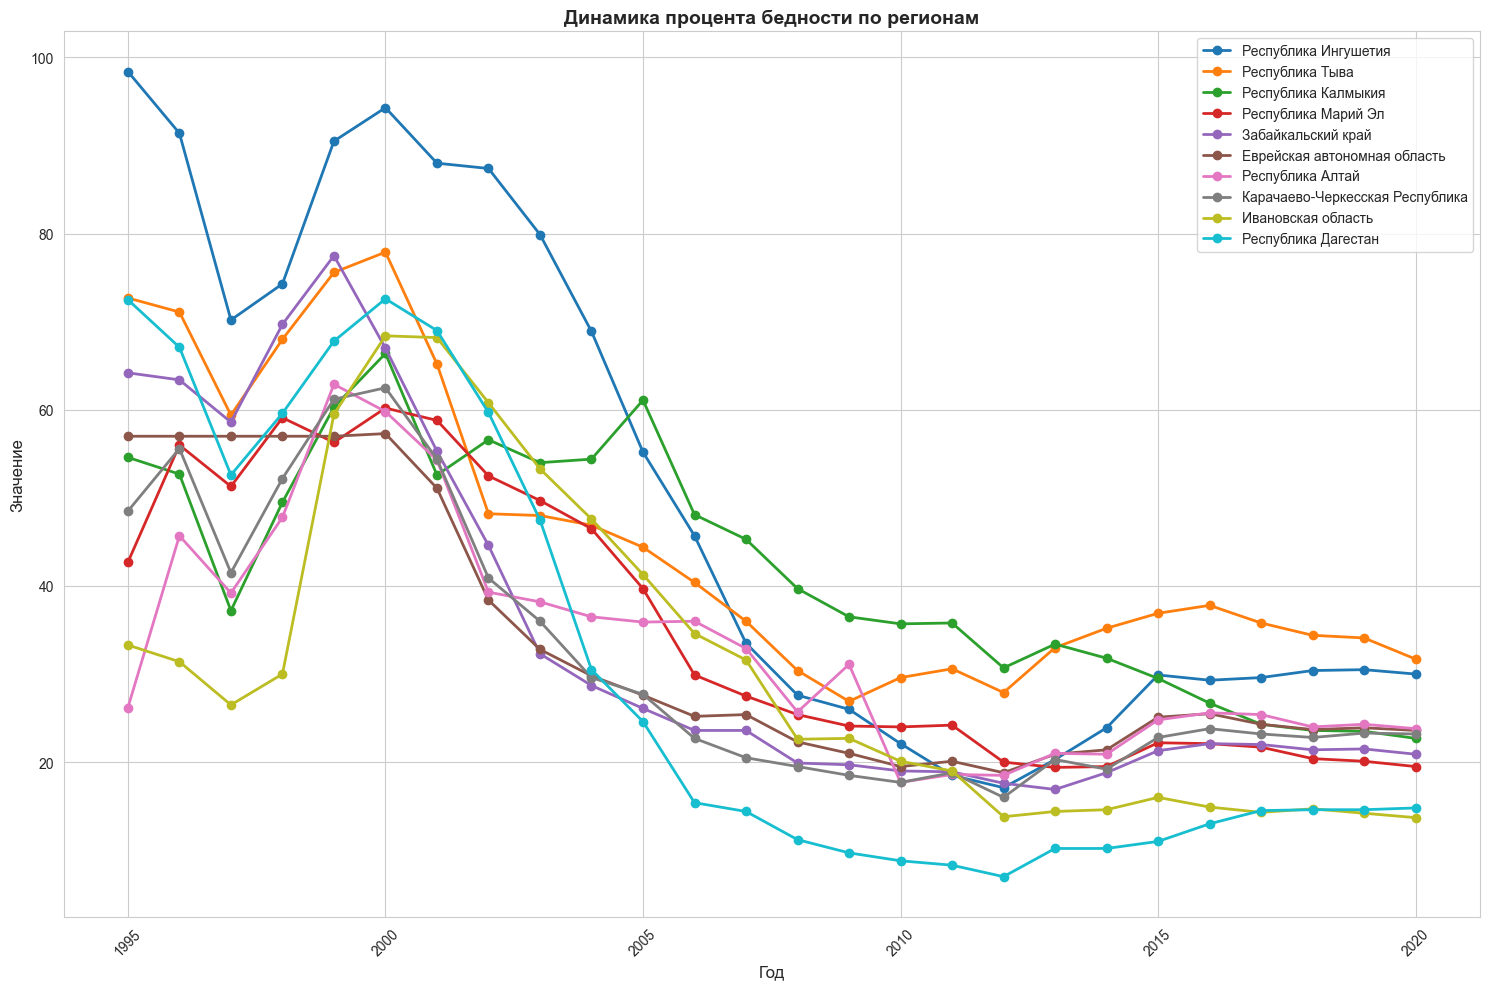

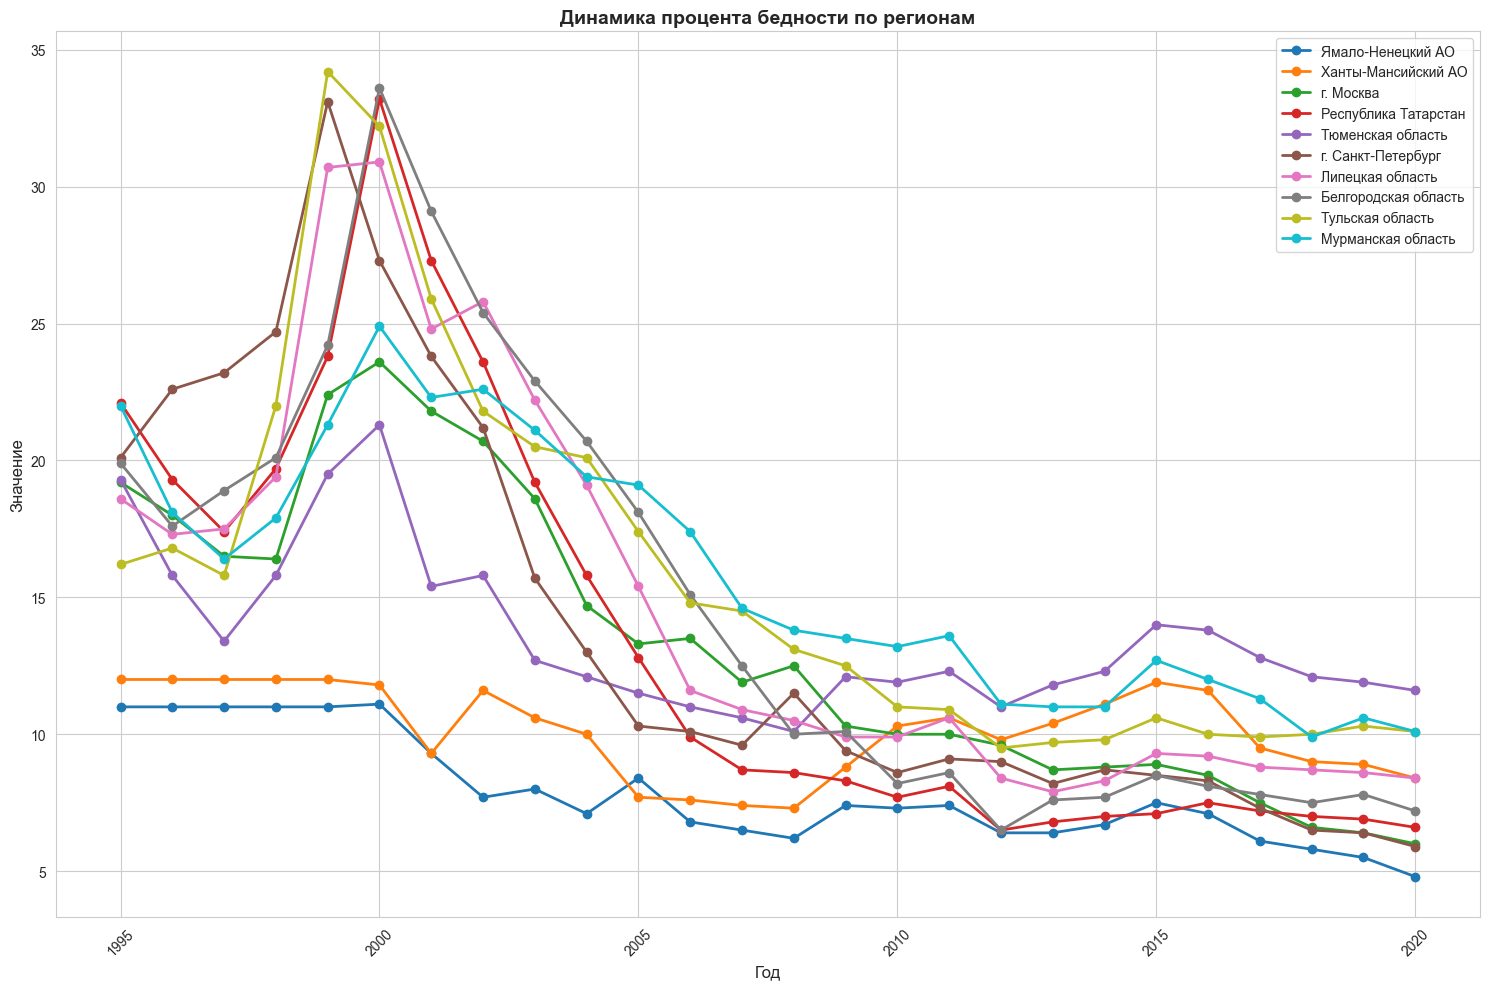

In [93]:
create_less_most_region_graph(poverty_percent, 'процента бедности')

По графикам можем выделить высокий уровень бедности в Ингушетии и республике Тыва. Наиболее благополучные регионы Ямало ненецкий, Москва и Санкт Петербург.

In [94]:
poverty_percent = poverty_percent.add_prefix('poverty_')

In [95]:
poverty_percent.head()

poverty_region  poverty_1995  poverty_1996  poverty_1997  \
0  Ненецкий автономный округ          38.0          38.0          38.0   
1        Ханты-Мансийский АО          12.0          12.0          12.0   
2          Ямало-Hенецкий АО          11.0          11.0          11.0   
3             Алтайский край          33.7          46.8          45.7   
4           Амурская область          36.1          28.2          26.3   

   poverty_1998  poverty_1999  poverty_2000  poverty_2001  poverty_2002  \
0          38.0          38.0          37.9          26.9          21.5   
1          12.0          12.0          11.8           9.3          11.6   
2          11.0          11.0          11.1           9.3           7.7   
3          52.9          53.8          53.9          47.3          38.9   
4          31.2          38.0          47.7          45.3          44.6   

   poverty_2003  ...  poverty_2011  poverty_2012  poverty_2013  poverty_2014  \
0           8.3  ...           7.7           6.5           7.8           8.9   
1          10.6  ...          10.6           9.8          10.4          11.1   
2           8.0  ...           7.4           6.4           6.4           6.7   
3          33.9  ...          22.6          20.6          17.6          17.1   
4          35.6  ...          20.4          16.0          16.2          14.8   

   poverty_2015  poverty_2016  poverty_2017  poverty_2018  poverty_2019  \
0           9.4          10.1          10.6           9.7           9.4   
1          11.9          11.6           9.5           9.0           8.9   
2           7.5           7.1           6.1           5.8           5.5   
3          18.0          17.8          17.5          17.4          17.6   
4          15.2          17.0          16.7          15.6          15.7   

   poverty_2020  
0           9.4  
1           8.4  
2           4.8  
3          17.5  
4          15.2  

[5 rows x 27 columns]

Также добавим данные в общую таблицу

In [96]:
data = data.join(poverty_percent.set_index('poverty_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
0          15.6          13.8          16.1       1494868.0       1501699.0   
1          23.7          20.7          23.1       1437471.0       1423178.0   
2          23.4          23.4          26.0       1592184.0       1575507.0   
3          20.9          19.0          21.6       2458558.0       2441337.0   
4          27.0          25.1          25.1       1210603.0       1194595.0   

  population_2001  ... poverty_2011 poverty_2012 poverty_2013 poverty_2014  \
0       1506976.0  ...          8.6          6.5          7.6          7.7   
1       1407965.0  ...         12.6         10.5         12.6         13.2   
2       1558052.0  ...         17.5         15.0         14.1         14.2   
3       2422371.0  ...         17.2         10.3          9.4          9.2   
4       1178969.0  ...         19.0         13.8         14.4         14.6   

  poverty_2015 poverty_2016 poverty_2017 poverty_2018 poverty_2019  \
0          8.5          8.1          7.8          7.5          7.8   
1         14.1         14.4         14.2         13.6         13.8   
2         14.7         14.6         13.2         13.1         12.6   
3          9.5          9.4          9.0          8.9          8.9   
4         16.0         14.9         14.3         14.7         14.2   

  poverty_2020  
0          7.2  
1         13.6  
2         12.5  
3          8.5  
4         13.7  

[5 rows x 57 columns]

### Доход населения

In [97]:
income = pd.read_excel('../data/social_russia_data/cash_real_income_wages_2015_2020.xlsx')

income.head()

region      2015     2016     2017     2018  \
0             Российская Федерация  302541.0  30865.0  31897.0  33266.0   
1  Центральный\n федеральный округ   38832.0  40200.0  41897.0  44009.0   
2             Белгородская область   28043.0  29799.0  30342.0  30778.0   
3                 Брянская область   23428.0  24006.0  25107.0  26585.0   
4             Владимирская область   22712.0  22365.0  23554.0  23539.0   

      2019     2020  
0  35338.0  36073.0  
1  47252.0  48226.0  
2  32352.0  32841.0  
3  28371.0  28596.0  
4  25358.0  25922.0

In [98]:
income[income.isna().any(axis=1)]

region  2015  2016  2017  2018  2019  2020
24  в том числе:   NaN   NaN   NaN   NaN   NaN   NaN
70  в том числе:   NaN   NaN   NaN   NaN   NaN   NaN

In [99]:
income.dropna(inplace=True)

income.reset_index(drop=True, inplace=True)

In [100]:
income.iloc[income[income['region'] == 'Кабардино-Балкарская\nРеспублика'].index, 0] = 'Кабардино-Балкарская Республика'
income.iloc[income[income['region'] == 'Карачаево-Черкесская\nРеспублика'].index, 0] = 'Карачаево-Черкесская Республика'
income.iloc[income[income['region'] == 'Республика Северная\nОсетия-Алания'].index, 0] = 'Республика Северная Осетия-Алания'
income.iloc[income[income['region'] == 'Ханты-Мансийский \nавтономный округ - Югра'].index, 0] = 'Ханты-Мансийский АО'
income.iloc[income[income['region'] == 'Ямало-Ненецкий \nавтономный округ'].index, 0] = 'Ямало-Hенецкий АО'

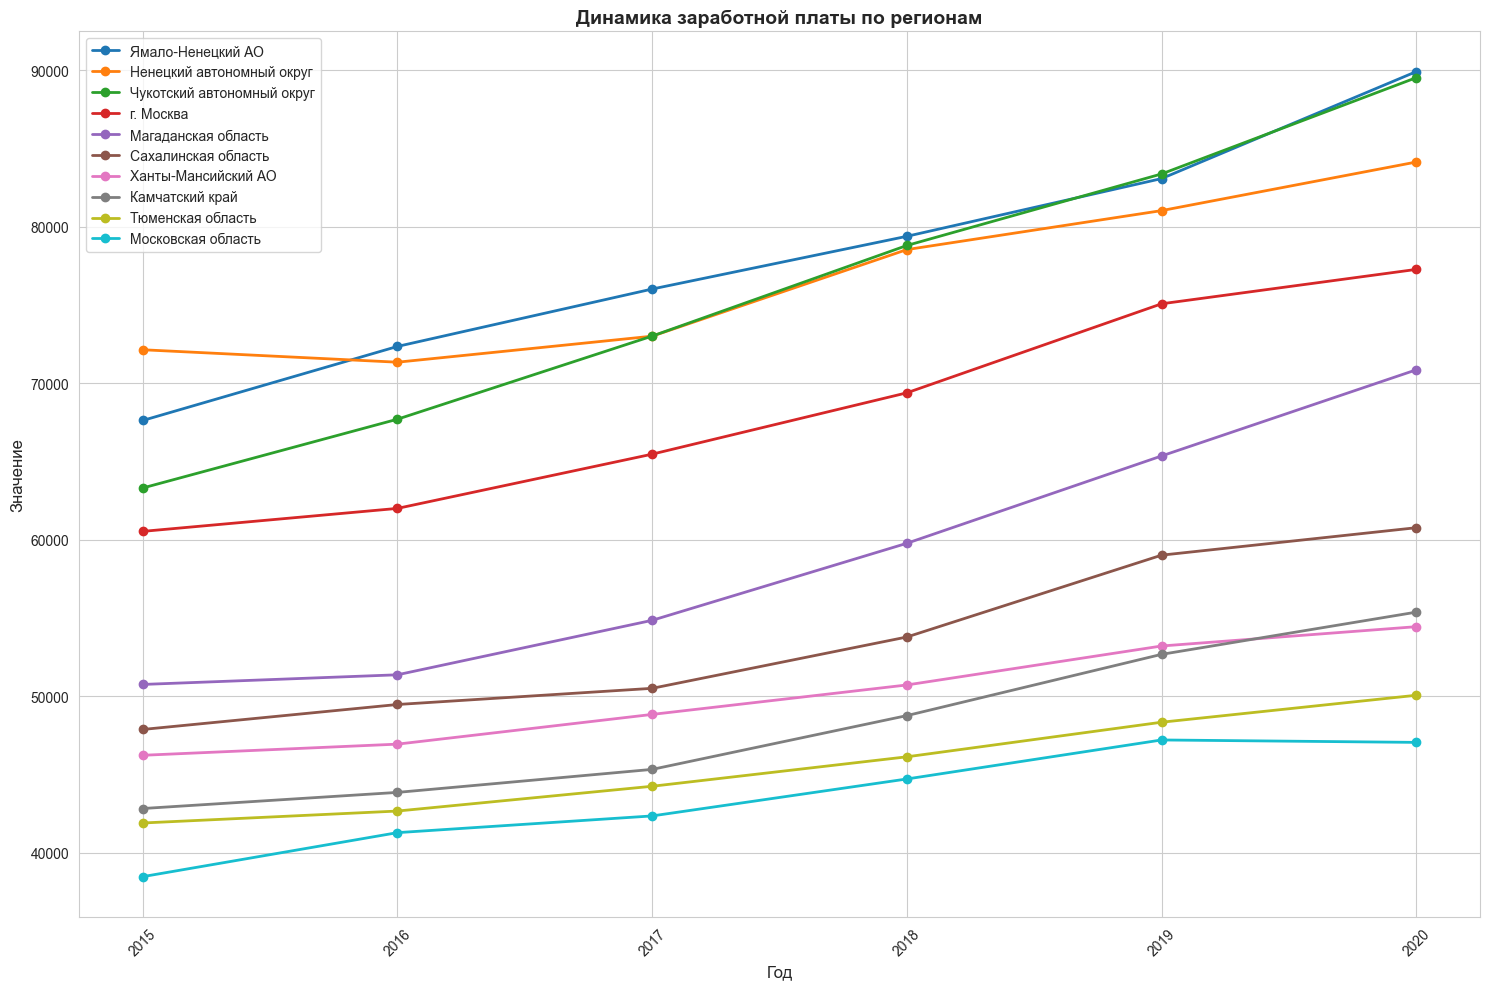

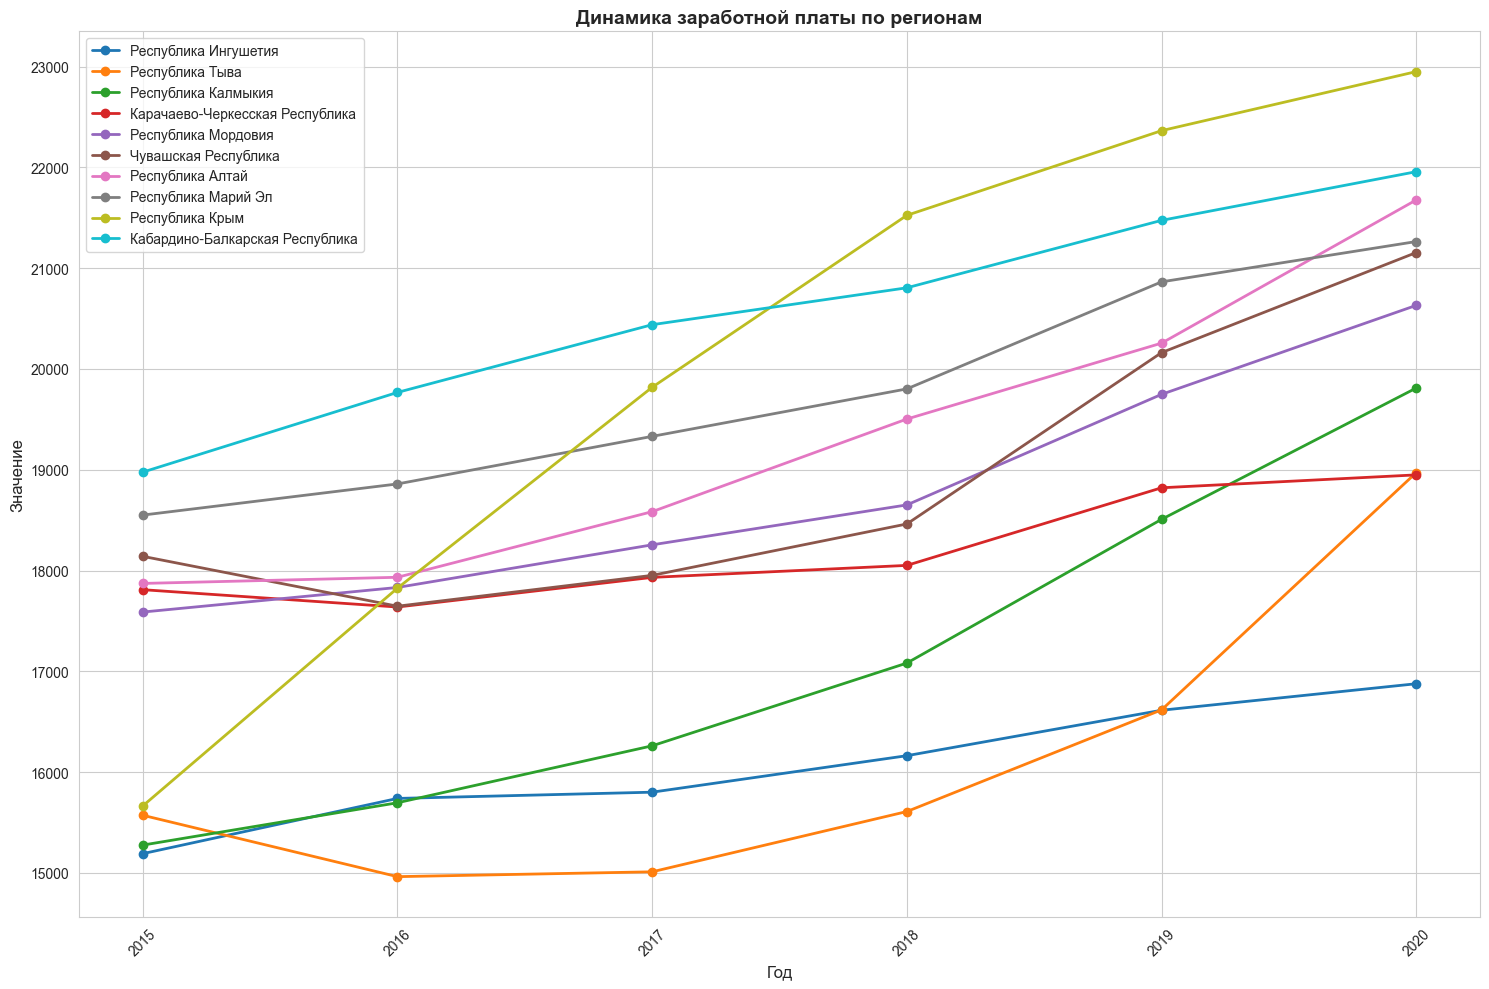

In [101]:
create_less_most_region_graph(income, 'заработной платы')

Как видно из графиков самые низкие зарплаты в Ингушетии и Республике Тыва поэтому там и высокий уровень бедности. Также низкая зарплата наблюдается в регионе Карачаево Черкесская республика. Стоит выделить Магаданскую область население которой стабильно уменьшается не смотря на рост зарплат. Самые высоки зарплаты в Чукотском и Ямало ненецком округах.

In [102]:
income = income.add_prefix('income_')

In [103]:
data = data.join(income.set_index('income_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
0          15.6          13.8          16.1       1494868.0       1501699.0   
1          23.7          20.7          23.1       1437471.0       1423178.0   
2          23.4          23.4          26.0       1592184.0       1575507.0   
3          20.9          19.0          21.6       2458558.0       2441337.0   
4          27.0          25.1          25.1       1210603.0       1194595.0   

  population_2001  ... poverty_2017 poverty_2018 poverty_2019 poverty_2020  \
0       1506976.0  ...          7.8          7.5          7.8          7.2   
1       1407965.0  ...         14.2         13.6         13.8         13.6   
2       1558052.0  ...         13.2         13.1         12.6         12.5   
3       2422371.0  ...          9.0          8.9          8.9          8.5   
4       1178969.0  ...         14.3         14.7         14.2         13.7   

  income_2015 income_2016 income_2017 income_2018 income_2019 income_2020  
0     28043.0     29799.0     30342.0     30778.0     32352.0     32841.0  
1     23428.0     24006.0     25107.0     26585.0     28371.0     28596.0  
2     22712.0     22365.0     23554.0     23539.0     25358.0     25922.0  
3     29366.0     29284.0     29498.0     30289.0     32022.0     32078.0  
4     22297.0     23676.0     24860.0     24503.0     25794.0     26277.0  

[5 rows x 63 columns]

In [104]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020 population_1999 population_2000  \
31          13.0          15.5       1909462.0       1909462.0   
36          13.2          13.3        439941.0        439941.0   

   population_2001  ... poverty_2017 poverty_2018 poverty_2019 poverty_2020  \
31       1909462.0  ...          NaN          NaN          NaN          NaN   
36        439941.0  ...          NaN          NaN          NaN          NaN   

   income_2015 income_2016 income_2017 income_2018 income_2019 income_2020  
31     15664.0     17825.0     19818.0     21524.0     22364.0     22950.0  
36     17774.0     26239.0     28130.0     28834.0     30261.0     29957.0  

[2 rows x 63 columns]

### Распределение малоимущего населения

In [105]:
poverty_2017 = pd.read_excel('../data/social_russia_data/poverty_socdem_2017.xls')
poverty_2018= pd.read_excel('../data/social_russia_data/poverty_socdem_2018.xls')
poverty_2019 = pd.read_excel('../data/social_russia_data/poverty_socdem_2019.xls')
poverty_2020 = pd.read_excel('../data/social_russia_data/poverty_socdem_2020.xls')

poverty_2017.head()

Распределение малоимущего населения по социально-демографическим группам (2017, процент, значение показателя за год)  \
0                                                NaN                                                                     
1                                                NaN                                                                     
2                               Российская Федерация                                                                     
3                               Белгородская область                                                                     
4                                   Брянская область                                                                     

      Unnamed: 1                 Unnamed: 2  \
0            NaN                        NaN   
1  Все население  Дети в возрасте до 16 лет   
2            100                       39.3   
3            100                       43.4   
4            100                       42.9   

                                  Unnamed: 3  \
0                                        NaN   
1  Население старше трудоспособного возраста   
2                                        6.6   
3                                       11.8   
4                                        4.9   

                           Unnamed: 4  
0                                 NaN  
1  Население трудоспособного возраста  
2                                54.1  
3                                44.8  
4                                52.2

Имеем 4 таблицы распределения бедности по слоям населения за 4 года

In [106]:
new_columns = poverty_2017.iloc[1].values

poverty_2017 = poverty_2017.iloc[2:].set_axis(new_columns, axis=1)
poverty_2018 = poverty_2018.iloc[2:].set_axis(new_columns, axis=1)
poverty_2019 = poverty_2019.iloc[2:].set_axis(new_columns, axis=1)
poverty_2020 = poverty_2020.iloc[2:].set_axis(new_columns, axis=1)

In [107]:
columns = ['region', 'all', 'children', 'workers', 'old']

poverty_2017.columns = columns
poverty_2018.columns = columns
poverty_2019.columns = columns
poverty_2020.columns = columns

In [108]:
poverty_2017.drop(['all'], axis=1, inplace=True)
poverty_2017.reset_index(drop=True, inplace=True)
poverty_2018.drop(['all'], axis=1, inplace=True)
poverty_2018.reset_index(drop=True, inplace=True)
poverty_2019.drop(['all'], axis=1, inplace=True)
poverty_2019.reset_index(drop=True, inplace=True)
poverty_2020.drop(['all'], axis=1, inplace=True)
poverty_2020.reset_index(drop=True, inplace=True)

In [109]:
poverty_2017.head()

region children workers   old
0          Российская Федерация     39.3     6.6  54.1
1          Белгородская область     43.4    11.8  44.8
2              Брянская область     42.9     4.9  52.2
3          Владимирская область     34.8     8.6  56.6
4           Воронежская область     38.6     5.9  55.6

Сделаем замены пропусков

In [110]:
poverty_2019[poverty_2019.iloc[:, 1:].sum(axis=1) == 0] = poverty_2019[poverty_2019.iloc[:, 1:].sum(axis=1) == 0].replace(0, np.nan)
poverty_2019 = poverty_2019.fillna(poverty_2018)

/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/698983701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  poverty_2019[poverty_2019.iloc[:, 1:].sum(axis=1) == 0] = poverty_2019[poverty_2019.iloc[:, 1:].sum(axis=1) == 0].replace(0, np.nan)


In [111]:
poverty_2020 = poverty_2020.fillna(poverty_2019)

In [112]:
poverty_2020.head()

region children workers   old
0          Российская Федерация     39.7     5.2  55.2
1          Белгородская область     44.8    12.9  42.3
2              Брянская область     44.8     3.7  51.6
3          Владимирская область     34.8     4.8  60.4
4           Воронежская область     28.5     2.3  69.2

In [113]:
poverty_2017 = poverty_2017.add_prefix('poverty_2017_')
poverty_2018 = poverty_2018.add_prefix('poverty_2018_')
poverty_2019 = poverty_2019.add_prefix('poverty_2019_')
poverty_2020 = poverty_2020.add_prefix('poverty_2020_')

Объединим таблицы в одну

In [114]:
poverty_soc = poverty_2017.join(poverty_2018.set_index('poverty_2018_region'), on="poverty_2017_region", how="left")
poverty_soc = poverty_soc.join(poverty_2019.set_index('poverty_2019_region'), on="poverty_2017_region", how="left")
poverty_soc = poverty_soc.join(poverty_2020.set_index('poverty_2020_region'), on="poverty_2017_region", how="left")

In [115]:
poverty_soc.head()

poverty_2017_region poverty_2017_children poverty_2017_workers  \
0          Российская Федерация                  39.3                  6.6   
1          Белгородская область                  43.4                 11.8   
2              Брянская область                  42.9                  4.9   
3          Владимирская область                  34.8                  8.6   
4           Воронежская область                  38.6                  5.9   

  poverty_2017_old poverty_2018_children poverty_2018_workers  \
0             54.1                  39.9                  6.5   
1             44.8                  44.8                 12.9   
2             52.2                  40.3                  1.8   
3             56.6                  48.9                  8.3   
4             55.6                  32.6                    8   

  poverty_2018_old poverty_2019_children poverty_2019_workers  \
0             53.7                    41                  6.9   
1             42.3                  44.8                 12.9   
2             57.9                  37.5                  5.1   
3             42.8                  34.8                  4.8   
4             59.4                  45.2                  5.4   

  poverty_2019_old poverty_2020_children poverty_2020_workers poverty_2020_old  
0               52                  39.7                  5.2             55.2  
1             42.3                  44.8                 12.9             42.3  
2             57.4                  44.8                  3.7             51.6  
3             60.4                  34.8                  4.8             60.4  
4             49.4                  28.5                  2.3             69.2

In [116]:
poverty_soc[poverty_soc.isna().any(axis=1)]

poverty_2017_region poverty_2017_children  \
23              Архангельская область (без АО)                  37.4   
65                  Тюменская область (без АО)                  52.5   

   poverty_2017_workers poverty_2017_old poverty_2018_children  \
23                  7.1             55.5                   NaN   
65                  2.2             45.2                   NaN   

   poverty_2018_workers poverty_2018_old poverty_2019_children  \
23                  NaN              NaN                   NaN   
65                  NaN              NaN                   NaN   

   poverty_2019_workers poverty_2019_old poverty_2020_children  \
23                  NaN              NaN                   NaN   
65                  NaN              NaN                   NaN   

   poverty_2020_workers poverty_2020_old  
23                  NaN              NaN  
65                  NaN              NaN

In [117]:
common_converter(poverty_soc, 'poverty_2017_region')

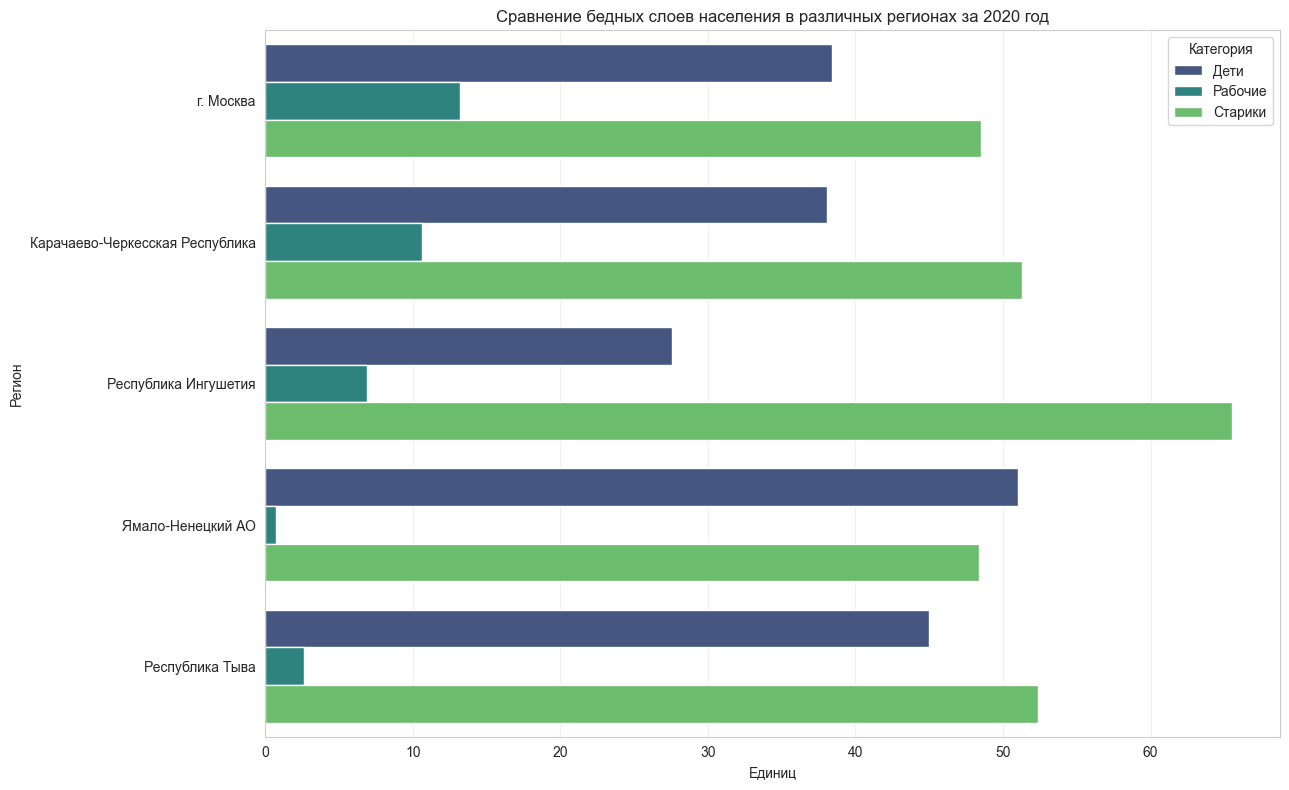

In [118]:
df_regions= ['г. Москва', 'Карачаево-Черкесская Республика', 'Республика Ингушетия', 'Ямало-Hенецкий АО', 'Республика Тыва']

def get_values(value):
    new_df = poverty_soc[(poverty_soc['poverty_2017_region'].isin(df_regions))].loc[:, value]
    return new_df.values
    
# Создаем общий датафрейм
common = {
    'index': df_regions*3,
    'value': [*get_values('poverty_2020_children'), *get_values('poverty_2020_workers'), *get_values('poverty_2020_old')],
    'table': ['Дети']*5 + ['Рабочие']*5 + ['Старики']*5
}

df_long = pd.DataFrame(common)

plt.figure(figsize=(13, 8))
sns.barplot(data=df_long, x='value', y='index', hue='table', palette='viridis')

plt.title('Сравнение бедных слоев населения в различных регионах за 2020 год')
plt.ylabel('Регион')
plt.xlabel('Единиц')
plt.legend(title='Категория')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

По графику видим, что лишь в Ямало Ненецком округе детей больше чем стариков. В Москве больше всего бедного населения, которое может работать, хотя как было заметно ранее регион не бедный. В бедных регионах сложно выделить какие либо отклонения и отличить их от богатых.

In [119]:
data = data.join(poverty_soc.set_index('poverty_2017_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
0          15.6          13.8          16.1       1494868.0       1501699.0   
1          23.7          20.7          23.1       1437471.0       1423178.0   
2          23.4          23.4          26.0       1592184.0       1575507.0   
3          20.9          19.0          21.6       2458558.0       2441337.0   
4          27.0          25.1          25.1       1210603.0       1194595.0   

  population_2001  ... poverty_2017_old poverty_2018_children  \
0       1506976.0  ...             44.8                  44.8   
1       1407965.0  ...             52.2                  40.3   
2       1558052.0  ...             56.6                  48.9   
3       2422371.0  ...             55.6                  32.6   
4       1178969.0  ...             55.9                  31.2   

  poverty_2018_workers poverty_2018_old poverty_2019_children  \
0                 12.9             42.3                  44.8   
1                  1.8             57.9                  37.5   
2                  8.3             42.8                  34.8   
3                    8             59.4                  45.2   
4                  9.5             59.3                  47.5   

  poverty_2019_workers poverty_2019_old poverty_2020_children  \
0                 12.9             42.3                  44.8   
1                  5.1             57.4                  44.8   
2                  4.8             60.4                  34.8   
3                  5.4             49.4                  28.5   
4                    5             47.5                  47.5   

  poverty_2020_workers poverty_2020_old  
0                 12.9             42.3  
1                  3.7             51.6  
2                  4.8             60.4  
3                  2.3             69.2  
4                    5             47.5  

[5 rows x 75 columns]

In [120]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020 population_1999 population_2000  \
31          13.0          15.5       1909462.0       1909462.0   
36          13.2          13.3        439941.0        439941.0   

   population_2001  ... poverty_2017_old poverty_2018_children  \
31       1909462.0  ...             51.5                  44.9   
36        439941.0  ...             56.7                  41.6   

   poverty_2018_workers poverty_2018_old poverty_2019_children  \
31                  5.5             49.6                  40.2   
36                  7.2             51.1                  45.2   

   poverty_2019_workers poverty_2019_old poverty_2020_children  \
31                  7.5             52.3                  48.2   
36                  2.1             52.7                  45.2   

   poverty_2020_workers poverty_2020_old  
31                  1.7             50.1  
36                  2.1             52.7  

[2 rows x 75 columns]

### Валовой продукт на душу населения

In [121]:
gross = pd.read_excel('../data/social_russia_data/gross_regional_product_1996_2020.xls')

gross.head()

Валовой региональный продукт на душу населения (рубль, значение показателя за год)  \
0                                                NaN                                   
1                                                NaN                                   
2                               Российская Федерация                                   
3                      Центральный федеральный округ                                   
4                               Белгородская область                                   

   Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1      1996.0      1997.0      1998.0      1999.0      2000.0      2001.0   
2     12225.0     13938.4     15371.1     26200.6     39532.3     49474.8   
3         NaN         NaN     16564.4     31118.7     48205.0     58851.5   
4      9575.6     10792.2     12242.8     21398.0     27969.5     33126.7   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 16  Unnamed: 17  \
0         NaN         NaN         NaN  ...          NaN          NaN   
1      2002.0      2003.0      2004.0  ...       2011.0       2012.0   
2     60611.4     74840.5     97691.9  ...     317515.3     348641.5   
3     75739.2     94244.6    121487.7  ...     417288.1     451517.2   
4     41327.4     50271.4     75629.4  ...     331010.0     354570.6   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0          NaN          NaN          NaN          NaN          NaN   
1       2013.0       2014.0       2015.0       2016.0       2017.0   
2     377006.0     405147.7     449097.9     505337.7     543065.9   
3     494482.7     536607.9     580706.6     663881.8     711031.6   
4     368874.8     400820.8     447619.7     501467.8     539720.5   

   Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN  
1       2018.0       2019.0       2020.0  
2     614333.2     646144.1     640519.0  
3     792780.9     835858.8     854978.5  
4     588641.5     617426.5     646569.0  

[5 rows x 26 columns]

Рассмотрим производство в городах, но сперва приведем в читаемый вид и убирем пустые значения

In [122]:
new_columns = gross.iloc[1].values
gross = gross.iloc[2:].set_axis(new_columns, axis=1)

In [123]:
columns = list(['region', *[str(int(x)) for x in gross.columns[1:]]])

gross.columns = columns

In [124]:
gross.reset_index(drop=True, inplace=True)

In [125]:
gross.head()

region     1996     1997     1998     1999  \
0               Российская Федерация  12225.0  13938.4  15371.1  26200.6   
1      Центральный федеральный округ      NaN      NaN  16564.4  31118.7   
2               Белгородская область   9575.6  10792.2  12242.8  21398.0   
3                   Брянская область   7275.3   7175.7   7659.1  11752.4   
4               Владимирская область   7620.7   8431.3   9350.2  15457.1   

      2000     2001     2002     2003      2004  ...      2011      2012  \
0  39532.3  49474.8  60611.4  74840.5   97691.9  ...  317515.3  348641.5   
1  48205.0  58851.5  75739.2  94244.6  121487.7  ...  417288.1  451517.2   
2  27969.5  33126.7  41327.4  50271.4   75629.4  ...  331010.0  354570.6   
3  17413.5  21511.9  27020.0  31953.4   37719.1  ...  137187.1  164726.6   
4  21073.3  27170.0  32923.6  40809.4   49353.4  ...  181842.6  200456.4   

       2013      2014      2015      2016      2017      2018      2019  \
0  377006.0  405147.7  449097.9  505337.7  543065.9  614333.2  646144.1   
1  494482.7  536607.9  580706.6  663881.8  711031.6  792780.9  835858.8   
2  368874.8  400820.8  447619.7  501467.8  539720.5  588641.5  617426.5   
3  175865.0  196096.7  221080.0  258752.7  280630.1  304547.1  332442.8   
4  216320.8  232757.6  262945.5  309713.7  325043.1  349856.4  394560.3   

       2020  
0  640519.0  
1  854978.5  
2  646569.0  
3  347204.5  
4  410443.6  

[5 rows x 26 columns]

In [126]:
gross[gross.isna().any(axis=1)]

region  1996  1997     1998  \
1                        Центральный федеральный округ   NaN   NaN  16564.4   
20                   Северо-Западный федеральный округ   NaN   NaN  16592.8   
24               Ненецкий автономный округ (Арханге...   NaN   NaN      0.0   
25               Архангельская область (кроме Ненец...   NaN   NaN      0.0   
33               Южный федеральный округ (по 2009 год)   NaN   NaN   9529.7   
34               Южный федеральный округ (с 2010 года)   NaN   NaN      NaN   
35              Южный федеральный округ (с 29.07.2016)   NaN   NaN   9529.7   
38                                     Республика Крым   NaN   NaN      0.0   
43             Город федерального значения Севастополь   NaN   NaN      0.0   
44                 Северо-Кавказский федеральный округ   NaN   NaN   6807.6   
52                       Приволжский федеральный округ   NaN   NaN  13489.1   
67                         Уральский федеральный округ   NaN   NaN  25102.2   
71               Ханты-Мансийский автономный округ ...   NaN   NaN      0.0   
72               Ямало-Ненецкий автономный округ (Т...   NaN   NaN      0.0   
73               Тюменская область (кроме Ханты-Ман...   NaN   NaN      0.0   
75                         Сибирский федеральный округ   NaN   NaN      NaN   
76                         Сибирский федеральный округ   NaN   NaN  15095.1   
87                   Дальневосточный федеральный округ   NaN   NaN      NaN   
88                   Дальневосточный федеральный округ   NaN   NaN  18058.8   
100                         Крымский федеральный округ   NaN   NaN      NaN   

        1999     2000     2001      2002      2003      2004  ...       2011  \
1    31118.7  48205.0  58851.5   75739.2   94244.6  121487.7  ...   417288.1   
20   27948.9  40564.9  50157.8   63297.1   78466.3  106667.8  ...   350764.2   
24       0.0      0.0      0.0       0.0       0.0       0.0  ...  3913588.7   
25       0.0      0.0      0.0       0.0       0.0       0.0  ...   232540.7   
33   16313.0  23417.9  30388.9   37122.4   44264.7   55359.6  ...        NaN   
34       NaN      NaN      NaN       NaN   44227.0   55215.5  ...   200306.5   
35   16313.0  23417.9  30388.9   37122.4   44227.0   55215.5  ...   200306.5   
38       0.0      0.0      0.0       0.0       0.0       0.0  ...        0.0   
43       0.0      0.0      0.0       0.0       0.0       0.0  ...        0.0   
44    9850.7  13802.7  18408.8   22374.6   28078.5   35083.2  ...   112647.6   
52   22204.5  32791.7  41139.5   47526.3   58324.4   74218.8  ...   236240.2   
67   41649.9  69327.3  90065.5  107831.3  134653.5  182505.2  ...   521192.2   
71       0.0      0.0      0.0       0.0       0.0       0.0  ...  1575300.0   
72       0.0      0.0      0.0       0.0       0.0       0.0  ...  1820301.3   
73       0.0      0.0      0.0       0.0       0.0       0.0  ...   522064.8   
75       NaN      NaN      NaN   49329.1       NaN       NaN  ...        NaN   
76   23485.6  34893.0  43055.2   50622.8   61979.9   85348.1  ...   258724.1   
87       NaN      NaN      NaN   70194.8       NaN       NaN  ...        NaN   
88   29620.2  39782.0  51048.3   62521.4   76007.9   92547.2  ...   346131.2   
100      NaN      NaN      NaN       NaN       NaN       NaN  ...        NaN   

          2012       2013       2014       2015       2016       2017  \
1     451517.2   494482.7   536607.9   580706.6   663881.8   711031.6   
20    383339.4   403612.9   430130.6   520253.4   605320.9   632995.7   
24   3685897.1  4035943.2  4329031.1  5210143.9  5964557.0  6045235.6   
25    270662.9   283264.5   310817.4   352837.9   400764.6   441961.6   
33         NaN        NaN        NaN        NaN        NaN        NaN   
34    229214.5   256444.6   280342.3        NaN        NaN        NaN   
35    229214.5   256444.6   255076.2   283856.1   332286.2   354937.6   
38         0.0        0.0   100526.4   139873.3   189916.6   201251.2   
43         0.0        0.0    78009.3   119384.5   

In [127]:
gross = gross.replace(0, np.nan)

In [128]:
gross.iloc[:,1:] = gross.iloc[:,1:].apply(lambda row: row.fillna(round(row.bfill())), axis=1)

In [129]:
common_converter(gross)

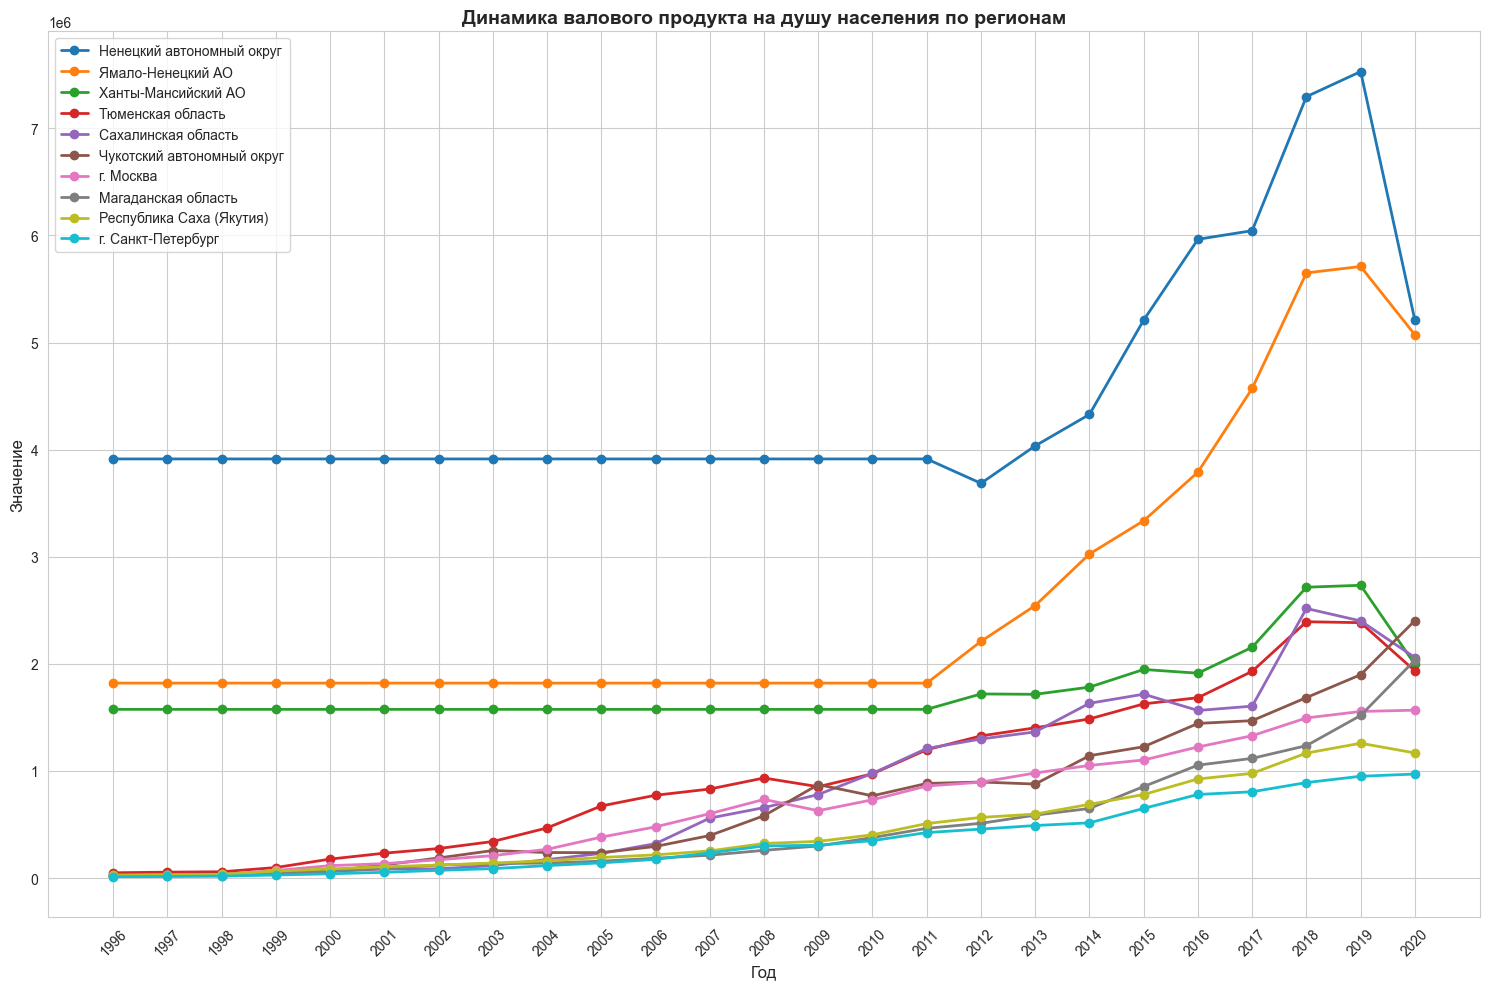

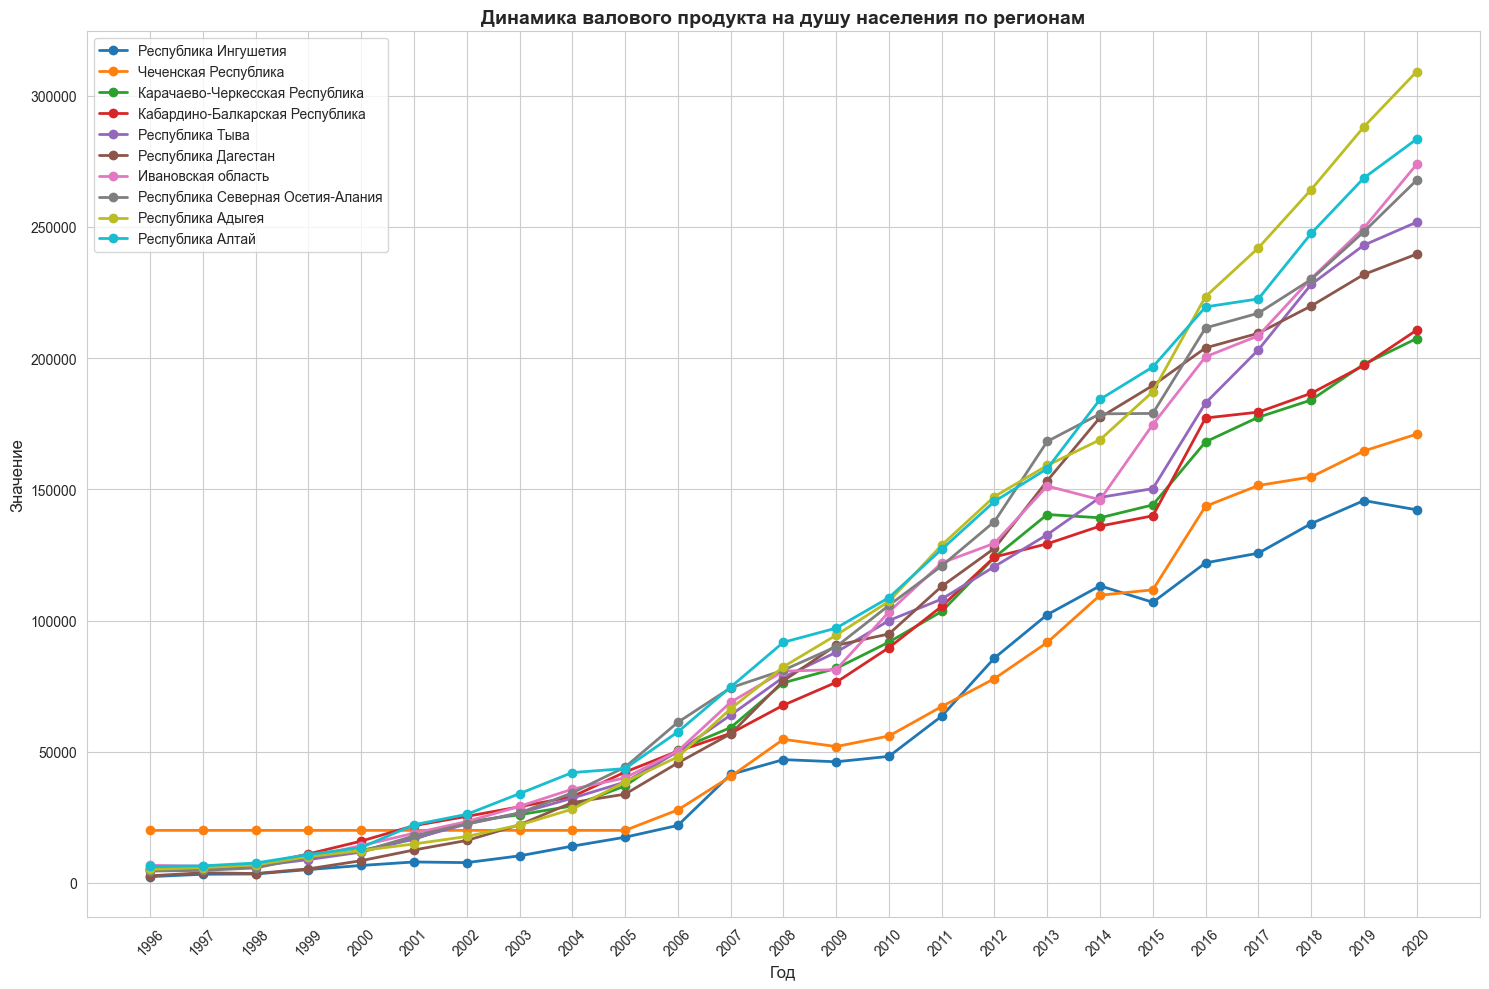

In [130]:
create_less_most_region_graph(gross, 'валового продукта на душу населения')

Как мы видим Ненецкий и Ямало ненецкий АО генерируют больше всех валовых продуктов на душу населения. Так же опять выделяется Ингушетия в которой очень низкое производство. Так же мало производит Чеченская республика.

In [131]:
gross = gross.add_prefix('gross_')

In [132]:
data = data.join(gross.set_index('gross_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
0          15.6          13.8          16.1       1494868.0       1501699.0   
1          23.7          20.7          23.1       1437471.0       1423178.0   
2          23.4          23.4          26.0       1592184.0       1575507.0   
3          20.9          19.0          21.6       2458558.0       2441337.0   
4          27.0          25.1          25.1       1210603.0       1194595.0   

  population_2001  ... gross_2011 gross_2012 gross_2013 gross_2014 gross_2015  \
0       1506976.0  ...   331010.0   354570.6   368874.8   400820.8   447619.7   
1       1407965.0  ...   137187.1   164726.6   175865.0   196096.7   221080.0   
2       1558052.0  ...   181842.6   200456.4   216320.8   232757.6   262945.5   
3       2422371.0  ...   203575.5   241947.4   262578.3   308004.7   345566.8   
4       1178969.0  ...   121945.5   129448.3   151263.6   146032.6   174687.5   

  gross_2016 gross_2017 gross_2018 gross_2019 gross_2020  
0   501467.8   539720.5   588641.5   617426.5   646569.0  
1   258752.7   280630.1   304547.1   332442.8   347204.5  
2   309713.7   325043.1   349856.4   394560.3   410443.6  
3   354657.9   374125.7   408140.7   431037.0   459629.5  
4   200504.4   208522.0   230325.5   249591.6   273821.5  

[5 rows x 100 columns]

In [133]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020 population_1999 population_2000  \
31          13.0          15.5       1909462.0       1909462.0   
36          13.2          13.3        439941.0        439941.0   

   population_2001  ... gross_2011 gross_2012 gross_2013 gross_2014  \
31       1909462.0  ...   100526.0   100526.0   100526.0   100526.4   
36        439941.0  ...    78009.0    78009.0    78009.0    78009.3   

   gross_2015 gross_2016 gross_2017 gross_2018 gross_2019 gross_2020  
31   139873.3   189916.6   201251.2   228692.9   245411.7   270363.8  
36   119384.5   211366.0   234060.8   276550.7   306891.7   295304.9  

[2 rows x 100 columns]

### Региональное производство

In [134]:
production_2005 = pd.read_csv('../data/social_russia_data/regional_production_2005_2016.csv')

production_2005.head()

region                                   production_field  \
0  Российская Федерация                РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
1  Российская Федерация      Подраздел СА ДОБЫЧА ТОПЛИВНО-ЭНЕРГЕТИЧЕСКИ...   
2  Российская Федерация          Добыча каменного угля,бурого угля и торфа   
3  Российская Федерация          Добыча сырой нефти и природного газа; ...   
4  Российская Федерация                     Добыча урановой и ториевой руд   

           2005          2006          2007          2008          2009  \
0  3.062460e+09  3.720887e+09  4.488915e+09  5.271733e+09  5.090973e+09   
1  2.686256e+09  3.292691e+09  3.983633e+09  4.650669e+09  4.537654e+09   
2  2.321794e+08  2.264506e+08  2.862991e+08  4.414241e+08  3.485582e+08   
3  2.450541e+09  3.061557e+09  3.691794e+09  4.202276e+09  4.180328e+09   
4  3.535251e+06  4.683270e+06  5.540329e+06  6.968364e+06           NaN   

           2010          2011          2012          2013          2014  \
0  6.217952e+09  8.020217e+09  8.950066e+09  9.213745e+09  9.690978e+09   
1  5.470740e+09  7.032308e+09  7.921745e+09  8.160342e+09  8.563862e+09   
2  5.089025e+08  6.663161e+08  6.514620e+08  6.003871e+08  6.222425e+08   
3  4.951480e+09  6.355953e+09  7.267043e+09  7.556542e+09  7.938532e+09   
4  1.035720e+07  1.003811e+07  3.240203e+06  3.413056e+06  3.087287e+06   

           2015          2016  
0  1.125954e+10  1.173050e+10  
1  9.896535e+09  1.016955e+10  
2  7.721283e+08  9.090367e+08  
3  9.121647e+09  9.256097e+09  
4  2.759673e+06  4.420410e+06

In [135]:
minerals_2005 = production_2005.copy()[production_2005['production_field'] == 'РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ'] 

minerals_2005.head()

region                     production_field  \
0                 Российская Федерация  РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
55       Центральный федеральный округ  РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
110               Белгородская область  РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
113                   Брянская область  РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
116               Владимирская область  РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   

             2005          2006          2007          2008          2009  \
0    3.062460e+09  3.720887e+09  4.488915e+09  5.271733e+09  5.090973e+09   
55   7.639038e+07  1.848690e+08  5.414181e+08  5.907032e+08  5.483433e+08   
110  4.038990e+07  4.110161e+07  5.692278e+07  6.222149e+07  3.537525e+07   
113  1.364149e+05  1.415951e+05  1.604174e+05  1.584166e+05  1.716277e+05   
116  5.522328e+05  7.495921e+05  1.148718e+06  1.671731e+06  1.302697e+06   

             2010          2011          2012          2013          2014  \
0    6.217952e+09  8.020217e+09  8.950066e+09  9.213745e+09  9.690978e+09   
55   6.238767e+08  8.335619e+08  8.921506e+08  9.851536e+08  9.018051e+08   
110  7.370403e+07  1.101581e+08  9.439002e+07  9.601706e+07  8.422265e+07   
113  2.482497e+05  3.703105e+05  4.088714e+05  3.877768e+05  4.333783e+05   
116  1.516791e+06  1.632291e+06  2.142805e+06  3.643259e+06  4.648023e+06   

             2015          2016  
0    1.125954e+10  1.173050e+10  
55   1.052128e+09  1.144558e+09  
110  8.121115e+07  8.892991e+07  
113  4.253366e+05  2.806723e+05  
116  3.406255e+06  3.180329e+06

In [136]:
manufacturing_2005 = production_2005.copy()[production_2005['production_field'] == 'РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'] 

manufacturing_2005.head()

region                      production_field  \
8                 Российская Федерация  РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
63       Центральный федеральный округ  РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
111               Белгородская область  РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
114                   Брянская область  РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
117               Владимирская область  РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   

             2005          2006          2007          2008          2009  \
8    8.871976e+09  1.118537e+10  1.397778e+10  1.686362e+10  1.435198e+10   
63   2.587948e+09  3.428776e+09  4.431493e+09  5.304670e+09  4.483283e+09   
111  1.017337e+08  1.366486e+08  1.917978e+08  2.707807e+08  2.416383e+08   
114  3.695418e+07  4.679642e+07  5.992006e+07  7.268705e+07  5.784829e+07   
117  8.195199e+07  9.936081e+07  1.447210e+08  1.608528e+08  1.422518e+08   

             2010          2011          2012          2013          2014  \
8    1.888074e+10  2.281328e+10  2.511061e+10  2.683976e+10  2.966125e+10   
63   5.726918e+09  6.764832e+09  7.455335e+09  8.528202e+09  9.764585e+09   
111  3.195360e+08  3.691605e+08  4.093298e+08  4.044666e+08  4.702453e+08   
114  7.386269e+07  9.198185e+07  1.100546e+08  1.176475e+08  1.264647e+08   
117  1.893704e+08  2.223254e+08  2.448005e+08  2.709784e+08  3.136822e+08   

             2015          2016  
8    3.509043e+10  3.616612e+10  
63   1.181079e+10  1.279009e+10  
111  5.628973e+08  6.038814e+08  
114  1.715511e+08  1.755580e+08  
117  3.761681e+08  4.115942e+08

In [137]:
resources_2005 = production_2005.copy()[production_2005['production_field'] == 'РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ'] 

resources_2005.head()

region  \
43                Российская Федерация   
98       Центральный федеральный округ   
112               Белгородская область   
115                   Брянская область   
118               Владимирская область   

                                      production_field          2005  \
43   РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...  1.690656e+09   
98   РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...  4.920316e+08   
112  РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...  1.470585e+07   
115  РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...  7.847969e+06   
118  РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...  1.229027e+07   

             2006          2007          2008          2009          2010  \
43   2.162207e+09  2.145668e+09  2.572988e+09  3.030165e+09  3.665280e+09   
98   6.971053e+08  6.403948e+08  7.616551e+08  9.204798e+08  1.156520e+09   
112  1.703257e+07  1.614409e+07  1.713215e+07  1.875809e+07  2.252472e+07   
115  8.145168e+06  8.010096e+06  9.274234e+06  1.054010e+07  1.295863e+07   
118  1.545265e+07  1.383511e+07  1.724552e+07  2.001669e+07  2.252348e+07   

             2011          2012          2013          2014          2015  \
43   4.219137e+09  4.160147e+09  4.491574e+09  4.712009e+09  4.917677e+09   
98   1.392745e+09  1.298228e+09  1.368387e+09  1.411690e+09  1.491884e+09   
112  2.505780e+07  2.525899e+07  2.886807e+07  2.736042e+07  2.874001e+07   
115  1.401033e+07  1.410197e+07  1.092421e+07  1.383573e+07  1.554865e+07   
118  2.636792e+07  2.815538e+07  3.005675e+07  3.144092e+07  3.332120e+07   

             2016  
43   5.332278e+09  
98   1.668238e+09  
112  2.822501e+07  
115  1.682877e+07  
118  3.660352e+07

Посмотрим более конкретно на распеределение выпускаемой продукции в регионах

In [138]:
minerals_2005.drop(['production_field'], axis=1, inplace=True)
minerals_2005.reset_index(drop=True, inplace=True)
manufacturing_2005.drop(['production_field'], axis=1, inplace=True)
manufacturing_2005.reset_index(drop=True, inplace=True)
resources_2005.drop(['production_field'], axis=1, inplace=True)
resources_2005.reset_index(drop=True, inplace=True)

In [139]:
minerals_2005.head()

region          2005          2006  \
0               Российская Федерация  3.062460e+09  3.720887e+09   
1      Центральный федеральный округ  7.639038e+07  1.848690e+08   
2               Белгородская область  4.038990e+07  4.110161e+07   
3                   Брянская область  1.364149e+05  1.415951e+05   
4               Владимирская область  5.522328e+05  7.495921e+05   

           2007          2008          2009          2010          2011  \
0  4.488915e+09  5.271733e+09  5.090973e+09  6.217952e+09  8.020217e+09   
1  5.414181e+08  5.907032e+08  5.483433e+08  6.238767e+08  8.335619e+08   
2  5.692278e+07  6.222149e+07  3.537525e+07  7.370403e+07  1.101581e+08   
3  1.604174e+05  1.584166e+05  1.716277e+05  2.482497e+05  3.703105e+05   
4  1.148718e+06  1.671731e+06  1.302697e+06  1.516791e+06  1.632291e+06   

           2012          2013          2014          2015          2016  
0  8.950066e+09  9.213745e+09  9.690978e+09  1.125954e+10  1.173050e+10  
1  8.921506e+08  9.851536e+08  9.018051e+08  1.052128e+09  1.144558e+09  
2  9.439002e+07  9.601706e+07  8.422265e+07  8.121115e+07  8.892991e+07  
3  4.088714e+05  3.877768e+05  4.333783e+05  4.253366e+05  2.806723e+05  
4  2.142805e+06  3.643259e+06  4.648023e+06  3.406255e+06  3.180329e+06

In [140]:
minerals_2005[minerals_2005.isna().any(axis=1)]

region         2005  \
25                      Архангельская область (без АО)          NaN   
26               Архангельская область (кроме Ненец...          NaN   
34               Южный федеральный округ (по 2009 год)  54017816.91   
35               Южный федеральный округ (с 2010 года)  45331423.80   
36              Южный федеральный округ (с 29.07.2016)          NaN   
39                                     Республика Крым          NaN   
44             Город федерального значения Севастополь          NaN   
51                                Чеченская Республика          NaN   
74                          Тюменская область (без АО)          NaN   
75               Тюменская область (кроме Ханты-Ман...          NaN   
79                          Крымский федеральный округ          NaN   
80                   Московская обл. в старых границах          NaN   
81                            Москва в старых границах          NaN   
87               Таймырский (Долгано-Ненецкий) авто...    519590.20   
88               Эвенкийский автономный округ (Крас...    173205.50   
90                      Усть-Ордынский Бурятский округ     46867.30   
97               Агинский Бурятский округ (Забайкал...     58537.90   
100              Корякский округ, входящий в состав...   2426143.90   

            2006         2007         2008         2009         2010  \
25           NaN          NaN          NaN          NaN    2166659.1   
26           NaN          NaN          NaN          NaN          NaN   
34   67544748.91  75544420.56  86456130.96  83003241.68  100646939.4   
35   56938119.21  60988291.90  71021734.36  68995803.45   85289926.1   
36           NaN          NaN          NaN          NaN          NaN   
39           NaN          NaN          NaN          NaN          NaN   
44           NaN          NaN          NaN          NaN          NaN   
51           NaN   5462304.50   4951358.00   4152426.00    4053007.0   
74           NaN          NaN          NaN          NaN   33485956.4   
75           NaN          NaN          NaN          NaN          NaN   
79           NaN          NaN          NaN          NaN          NaN   
80           NaN          NaN          NaN          NaN          NaN   
81           NaN          NaN          NaN          NaN          NaN   
87     832119.50          NaN          NaN          NaN          NaN   
88     295565.70          NaN          NaN          NaN          NaN   
90     113606.80    223055.30          NaN          NaN          NaN   
97     232380.90    320576.80          NaN          NaN          NaN   
100   1858182.00          NaN          NaN          NaN          NaN   

             2011          2012          2013          2014          2015  \
25   2.866410e+06  2.156738e+06  2.809707e+06  7.364928e+06           NaN   
26            NaN           NaN           NaN           NaN  1.846824e+07   
34   1.267721e+08  1.742143e+08  2.031561e+08           NaN           NaN   
35   1.097981e+08  1.549627e+08  1.828192e+08  1.931891e+08  2.270647e+08   
36            NaN           NaN           NaN           NaN  2.359370e+08   
39            NaN           NaN           NaN  2.948940e+06  8.186286e+06   
44            NaN           NaN           NaN  1.596780e+04  4.831960e+05   
51   4.404819e+06  4.290047e+06  4.909844e+06  5.440401e+06  4.867880e+06   
74   5.661537e+07  8.283439e+07  1.095672e+08  1.305179e+08           NaN   
75            NaN           NaN           NaN           NaN  1.642801e+08   
79            NaN           NaN           NaN  2.964907e+06  8.403101e+06   
80   7.455736e+06           NaN           NaN           NaN           NaN   
81   6.430443e+08           NaN           NaN           NaN           NaN   
87            NaN           NaN           NaN           NaN           NaN   
88            NaN           NaN           NaN           NaN           NaN   
90            NaN           NaN           NaN           NaN           NaN   
97            NaN   

In [141]:
minerals_2005.iloc[:,1:] = minerals_2005.iloc[:,1:].apply(lambda row: row.fillna(round(row.mean(), 2)), axis=1)
manufacturing_2005.iloc[:,1:] = manufacturing_2005.iloc[:,1:].apply(lambda row: row.fillna(round(row.mean(), 2)), axis=1)
resources_2005.iloc[:,1:] = resources_2005.iloc[:,1:].apply(lambda row: row.fillna(round(row.mean(), 2)), axis=1)

In [142]:
common_converter(minerals_2005)
common_converter(manufacturing_2005)
common_converter(resources_2005)

In [143]:
production_2017 = pd.read_csv('../data/social_russia_data/regional_production_2017_2020.csv')

production_2017.head()

region                                   production_field  \
0  Российская Федерация                         ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
1  Российская Федерация                                        Добыча угля   
2  Российская Федерация               Добыча и обогащение угля и антрацита   
3  Российская Федерация          Добыча и обогащение бурого угля (лигнита)   
4  Российская Федерация                     Добыча нефти и природного газа   

           2017          2018          2019          2020  
0  1.391616e+10  1.819387e+10  1.832413e+10  1.449890e+10  
1  1.228407e+09  1.567151e+09  1.392654e+09  1.100662e+09  
2  1.151523e+09  1.472893e+09  1.302804e+09  1.012754e+09  
3  7.688374e+07  9.425728e+07  8.984967e+07  8.790853e+07  
4  9.286030e+09  1.287361e+10  1.285934e+10  8.945390e+09

In [144]:
minerals_2017 = production_2017.copy()[production_2017['production_field'] == 'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ'] 

minerals_2017.head()

region            production_field  \
0                 Российская Федерация  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
133      Центральный федеральный округ  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
138               Белгородская область  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
143                   Брянская область  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
148               Владимирская область  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   

             2017          2018          2019          2020  
0    1.391616e+10  1.819387e+10  1.832413e+10  1.449890e+10  
133  1.502691e+09  2.099611e+09  2.102477e+09  1.443869e+09  
138  1.165883e+08  1.488634e+08  1.783899e+08  1.898038e+08  
143  2.774277e+05  2.615495e+05  3.380273e+05  3.106659e+05  
148  4.003911e+06  5.005219e+06  5.425672e+06  4.965110e+06

In [145]:
manufacturing_2017 = production_2017.copy()[production_2017['production_field'] == 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'] 

manufacturing_2017.head()

region             production_field  \
16                Российская Федерация  ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
134      Центральный федеральный округ  ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
139               Белгородская область  ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
144                   Брянская область  ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   
149               Владимирская область  ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА   

             2017          2018          2019          2020  
16   3.871246e+10  4.459951e+10  4.743602e+10  4.778255e+10  
134  1.319667e+10  1.510447e+10  1.661044e+10  1.737422e+10  
139  6.290926e+08  7.108288e+08  7.226997e+08  7.463807e+08  
144  1.910189e+08  2.185441e+08  2.536616e+08  2.556862e+08  
149  4.064836e+08  4.484277e+08  4.918302e+08  5.261537e+08

In [146]:
resources_2017 = production_2017.copy()[production_2017['production_field'] == 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА'] 

resources_2017.head()

region  \
120               Российская Федерация   
135      Центральный федеральный округ   
140               Белгородская область   
145                   Брянская область   
150               Владимирская область   

                                      production_field          2017  \
120  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...  5.379682e+09   
135  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...  1.691479e+09   
140  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...  2.703072e+07   
145  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...  1.606411e+07   
150  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...  3.330818e+07   

             2018          2019          2020  
120  5.641920e+09  5.805454e+09  5.959974e+09  
135  1.748280e+09  1.753190e+09  1.945377e+09  
140  2.680549e+07  2.654258e+07  2.678738e+07  
145  1.773026e+07  1.770875e+07  1.787640e+07  
150  3.629512e+07  3.781567e+07  3.726466e+07

In [147]:
waste_2017 = production_2017.copy()[production_2017['production_field'] == 'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ'] 

waste_2017.head()

region  \
125               Российская Федерация   
136      Центральный федеральный округ   
141               Белгородская область   
146                   Брянская область   
151               Владимирская область   

                                      production_field          2017  \
125  ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...  1.022498e+09   
136  ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...  3.121442e+08   
141  ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...  1.061410e+07   
146  ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...  7.347143e+06   
151  ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...  9.986625e+06   

             2018          2019          2020  
125  1.185587e+09  1.324313e+09  1.428755e+09  
136  3.791241e+08  4.202350e+08  4.696371e+08  
141  8.936415e+06  1.140417e+07  1.117503e+07  
146  8.901073e+06  9.258735e+06  9.588966e+06  
151  1.125718e+07  1.158193e+07  1.294257e+07

In [148]:
industry_2017 = production_2017.copy()[production_2017['production_field'] == 'Промышленное производство (промышленность)'] 

industry_2017.head()

region  \
130               Российская Федерация   
137      Центральный федеральный округ   
142               Белгородская область   
147                   Брянская область   
152               Владимирская область   

                               production_field          2017          2018  \
130  Промышленное производство (промышленность)  5.903081e+10  6.962089e+10   
137  Промышленное производство (промышленность)  1.670299e+10  1.933149e+10   
142  Промышленное производство (промышленность)  7.833257e+08  8.954341e+08   
147  Промышленное производство (промышленность)  2.147076e+08  2.454370e+08   
152  Промышленное производство (промышленность)  4.537824e+08  5.009853e+08   

             2019          2020  
130  7.288992e+10  6.967018e+10  
137  2.088634e+10  2.123310e+10  
142  9.390364e+08  9.741469e+08  
147  2.809671e+08  2.834622e+08  
152  5.466535e+08  5.813260e+08

In [149]:
minerals_2017.drop(['production_field'], axis=1, inplace=True)
minerals_2017.reset_index(drop=True, inplace=True)
manufacturing_2017.drop(['production_field'], axis=1, inplace=True)
manufacturing_2017.reset_index(drop=True, inplace=True)
resources_2017.drop(['production_field'], axis=1, inplace=True)
resources_2017.reset_index(drop=True, inplace=True)
industry_2017.drop(['production_field'], axis=1, inplace=True)
industry_2017.reset_index(drop=True, inplace=True)
waste_2017.drop(['production_field'], axis=1, inplace=True)
waste_2017.reset_index(drop=True, inplace=True)

In [150]:
minerals_2017.head()

region          2017          2018  \
0               Российская Федерация  1.391616e+10  1.819387e+10   
1      Центральный федеральный округ  1.502691e+09  2.099611e+09   
2               Белгородская область  1.165883e+08  1.488634e+08   
3                   Брянская область  2.774277e+05  2.615495e+05   
4               Владимирская область  4.003911e+06  5.005219e+06   

           2019          2020  
0  1.832413e+10  1.449890e+10  
1  2.102477e+09  1.443869e+09  
2  1.783899e+08  1.898038e+08  
3  3.380273e+05  3.106659e+05  
4  5.425672e+06  4.965110e+06

In [151]:
waste_2017[waste_2017.isna().any(axis=1)]

Empty DataFrame
Columns: [region, 2017, 2018, 2019, 2020]
Index: []

In [152]:
common_converter(minerals_2017)
common_converter(manufacturing_2017)
common_converter(resources_2017)
common_converter(waste_2017)
common_converter(industry_2017)

Соединим разные года в одну таблицу

In [153]:
minerals = minerals_2005.join(manufacturing_2017.set_index('region'), on="region", how="left")
manufacturing = manufacturing_2005.join(manufacturing_2017.set_index('region'), on="region", how="left")
resources = resources_2005.join(resources_2017.set_index('region'), on="region", how="left")

In [154]:
minerals.head()

region          2005          2006          2007  \
0           Российская Федерация  3.062460e+09  3.720887e+09  4.488915e+09   
1  Центральный федеральный округ  7.639038e+07  1.848690e+08  5.414181e+08   
2           Белгородская область  4.038990e+07  4.110161e+07  5.692278e+07   
3               Брянская область  1.364149e+05  1.415951e+05  1.604174e+05   
4           Владимирская область  5.522328e+05  7.495921e+05  1.148718e+06   

           2008          2009          2010          2011          2012  \
0  5.271733e+09  5.090973e+09  6.217952e+09  8.020217e+09  8.950066e+09   
1  5.907032e+08  5.483433e+08  6.238767e+08  8.335619e+08  8.921506e+08   
2  6.222149e+07  3.537525e+07  7.370403e+07  1.101581e+08  9.439002e+07   
3  1.584166e+05  1.716277e+05  2.482497e+05  3.703105e+05  4.088714e+05   
4  1.671731e+06  1.302697e+06  1.516791e+06  1.632291e+06  2.142805e+06   

           2013          2014          2015          2016          2017  \
0  9.213745e+09  9.690978e+09  1.125954e+10  1.173050e+10  3.871246e+10   
1  9.851536e+08  9.018051e+08  1.052128e+09  1.144558e+09  1.319667e+10   
2  9.601706e+07  8.422265e+07  8.121115e+07  8.892991e+07  6.290926e+08   
3  3.877768e+05  4.333783e+05  4.253366e+05  2.806723e+05  1.910189e+08   
4  3.643259e+06  4.648023e+06  3.406255e+06  3.180329e+06  4.064836e+08   

           2018          2019          2020  
0  4.459951e+10  4.743602e+10  4.778255e+10  
1  1.510447e+10  1.661044e+10  1.737422e+10  
2  7.108288e+08  7.226997e+08  7.463807e+08  
3  2.185441e+08  2.536616e+08  2.556862e+08  
4  4.484277e+08  4.918302e+08  5.261537e+08

In [155]:
minerals[minerals['region'] == 'Чукотский автономный округ']

region       2005       2006       2007        2008  \
107  Чукотский автономный округ  2647943.2  3395090.0  3189637.9  20505856.5   

            2009        2010        2011        2012        2013         2014  \
107  36086019.44  35493753.5  38546542.0  34116310.2  34852867.6  63813116.68   

           2015        2016       2017       2018        2019        2020  
107  77385605.3  83561520.3  1023385.9  1055402.5  67342675.1  93236797.7

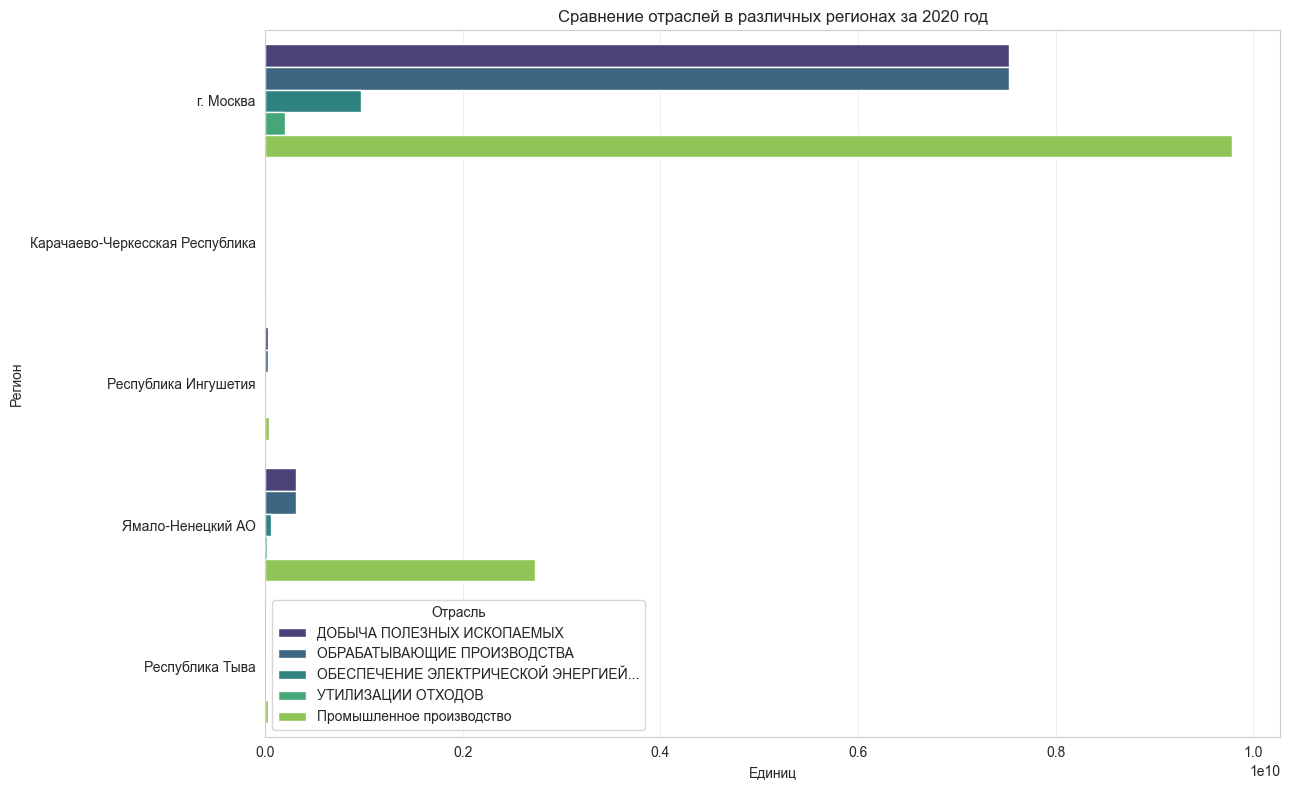

In [156]:
df_regions= ['г. Москва', 'Карачаево-Черкесская Республика', 'Республика Ингушетия', 'Ямало-Hенецкий АО', 'Республика Тыва']

def get_values(df):
    new_df = df[(df['region'].isin(df_regions))].loc[:,'2020']
    return new_df.values
    
# Создаем общий датафрейм
common = {
    'index': df_regions*5,
    'value': [*get_values(minerals), *get_values(manufacturing), *get_values(resources), *get_values(waste_2017), *get_values(industry_2017)],
    'table': ['ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ']*5 + ['ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА']*5 + ['ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ...']*5 + ['УТИЛИЗАЦИИ ОТХОДОВ']*5 + ['Промышленное производство']*5
}

df_long = pd.DataFrame(common)

# Create the plot
plt.figure(figsize=(13, 8))
sns.barplot(data=df_long, x='value', y='index', hue='table', palette='viridis')

plt.title('Сравнение отраслей в различных регионах за 2020 год')
plt.ylabel('Регион')
plt.xlabel('Единиц')
plt.legend(title='Отрасль')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

По данным графикам становится заметно отличие бедных регионов от богатых. В то время как ну Москву и Ямало Ненецкую область приходится много отраслей, то в бедных регионах отсутсвуют способы заработка.

In [157]:
minerals = minerals.add_prefix('minerals_')
manufacturing = manufacturing.add_prefix('manufacturing_')
resources = resources.add_prefix('resources_')
waste = waste_2017.add_prefix('waste_')
industry = industry_2017.add_prefix('industry_')

In [158]:
data = data.join(minerals.set_index('minerals_region'), on="region", how="left")
data = data.join(manufacturing.set_index('manufacturing_region'), on="region", how="left")
data = data.join(resources.set_index('resources_region'), on="region", how="left")
data = data.join(waste.set_index('waste_region'), on="region", how="left")
data = data.join(industry.set_index('industry_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
0          15.6          13.8          16.1       1494868.0       1501699.0   
1          23.7          20.7          23.1       1437471.0       1423178.0   
2          23.4          23.4          26.0       1592184.0       1575507.0   
3          20.9          19.0          21.6       2458558.0       2441337.0   
4          27.0          25.1          25.1       1210603.0       1194595.0   

  population_2001  ... resources_2019 resources_2020  waste_2017  waste_2018  \
0       1506976.0  ...   2.654258e+07   2.678738e+07  10614103.8   8936415.0   
1       1407965.0  ...   1.770875e+07   1.787640e+07   7347143.3   8901072.7   
2       1558052.0  ...   3.781567e+07   3.726466e+07   9986624.8  11257184.5   
3       2422371.0  ...   1.103848e+08   1.377990e+08  12116144.9  13512418.1   
4       1178969.0  ...   2.942105e+07   2.817499e+07   4285184.6   4686647.3   

   waste_2019   waste_2020 industry_2017 industry_2018 industry_2019  \
0  11404169.8  11175025.30  7.833257e+08  8.954341e+08  9.390364e+08   
1   9258735.3   9588966.40  2.147076e+08  2.454370e+08  2.809671e+08   
2  11581929.2  12942570.39  4.537824e+08  5.009853e+08  5.466535e+08   
3  15657245.0  18592053.80  5.295498e+08  5.690802e+08  6.409811e+08   
4   5762633.9   6394404.20  1.703785e+08  1.895272e+08  1.945330e+08   

  industry_2020  
0  9.741469e+08  
1  2.834622e+08  
2  5.813260e+08  
3  7.182667e+08  
4  2.197861e+08  

[5 rows x 156 columns]

In [159]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  \
30  Республика Калмыкия          16.8          15.5          25.0   
31      Республика Крым          12.6          10.2          13.6   
36       г. Севастополь          12.2          10.5          13.3   

    welfare_2018  welfare_2019  welfare_2020 population_1999 population_2000  \
30          25.4          23.5          24.3        310457.0        308347.0   
31          13.5          13.0          15.5       1909462.0       1909462.0   
36          14.1          13.2          13.3        439941.0        439941.0   

   population_2001  ... resources_2019 resources_2020 waste_2017 waste_2018  \
30        307281.0  ...      2905599.4      4114195.2        NaN        NaN   
31       1909462.0  ...     37760565.2     49583786.2  6175076.2  6455084.3   
36        439941.0  ...      4259713.1      8877990.5        NaN        NaN   

   waste_2019 waste_2020 industry_2017 industry_2018 industry_2019  \
30        NaN        NaN  5.312962e+06  6.060863e+06  5.913083e+06   
31  8500351.9  8987761.7  1.309915e+08  1.513854e+08  1.563456e+08   
36        NaN        NaN  2.296492e+07  3.549517e+07  2.480981e+07   

   industry_2020  
30  6.619456e+06  
31  1.713439e+08  
36  2.902825e+07  

[3 rows x 156 columns]

In [160]:
data = data.fillna(0)

/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/132144801.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


In [161]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 156 columns]

### Розничная торговля

In [162]:
retail = pd.read_excel('../data/social_russia_data/retail_turnover_per_capita_2000_2021.xls')

retail.head()

Оборот розничной торговли на душу населения с 2000 г. Unnamed: 1  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                               Российская Федерация         рубль   
4                      Центральный федеральный округ         рубль   

                   Unnamed: 2                  Unnamed: 3  \
0                         NaN                         NaN   
1                        2000                        2001   
2  значение показателя за год  значение показателя за год   
3                       16046                       21031   
4                       26062                       33630   

                   Unnamed: 4                  Unnamed: 5  \
0                         NaN                         NaN   
1                        2002                        2003   
2  значение показателя за год  значение показателя за год   
3                       25913                       31557   
4                       40010                       46760   

                   Unnamed: 6                  Unnamed: 7  \
0                         NaN                         NaN   
1                        2004                        2005   
2  значение показателя за год  значение показателя за год   
3                       39166                       49063   
4                       57011                       68302   

                   Unnamed: 8                  Unnamed: 9  ...  \
0                         NaN                         NaN  ...   
1                        2006                        2007  ...   
2  значение показателя за год  значение показателя за год  ...   
3                       60901                       76111  ...   
4                       81774                       97965  ...   

                  Unnamed: 14                 Unnamed: 15  \
0                         NaN                         NaN   
1                        2012                        2013   
2  значение показателя за год  значение показателя за год   
3                      149401                      165051   
4                      188757                      207394   

                  Unnamed: 16                 Unnamed: 17  \
0                         NaN                         NaN   
1                        2014                        2015   
2  значение показателя за год  значение показателя за год   
3                      180410                      188017   
4                      231873                      237737   

                  Unnamed: 18                 Unnamed: 19  \
0                         NaN                         NaN   
1                        2016                        2017   
2  значение показателя за год  значение показателя за год   
3                      192541                      202568   
4                      243426                      258278   

                  Unnamed: 20                 Unnamed: 21  \
0                         NaN                         NaN   
1                        2018                        2019   
2  значение показателя за год  значение показателя за год   
3                      215074                      229104   
4                      277011                      296368   

                  Unnamed: 22                 Unnamed: 23  
0                         NaN                         NaN  
1                        2020                        2021  
2  значение показателя за год  значение показателя за год  
3                      231283                      270606  
4                      301192                      354141  

[5 rows x 24 columns]

Взглянем на торговлю в регионах

In [163]:
new_columns = retail.iloc[1].values
retail = retail.iloc[3:].set_axis(new_columns, axis=1)

In [164]:
retail.columns.values[0] = 'region'
retail.columns.values[1] = 'rub'

In [165]:
retail.drop(['rub'], axis=1, inplace=True)
retail.drop(retail.iloc[:2].index, inplace=True)
retail.reset_index(drop=True, inplace=True)

In [166]:
retail.head()

region   2000   2001   2002   2003   2004   2005  \
0          Белгородская область  11820  13837  16366  19222  24168  30174   
1              Брянская область   8267  10951  14312  17988  22849  28892   
2          Владимирская область   7442   9403  10984  13357  16584  21140   
3           Воронежская область  11713  15777  18238  22189  28294  35245   
4            Ивановская область   6687   8235  10452  12413  15505  19064   

    2006   2007   2008  ...    2012    2013    2014    2015    2016    2017  \
0  41387  55460  74599  ...  129904  144992  164079  178097  192504  203298   
1  36931  48448  64977  ...  121136  138669  158501  177048  179767  192775   
2  29719  42497  56943  ...  103848  116202  129564  139408  143643  153088   
3  39692  49708  71127  ...  139133  158218  181499  198814  208638  221302   
4  26811  34985  53683  ...  109822  121813  138185  143349  143568  153993   

     2018    2019    2020    2021  
0  217059  230704  237076  259151  
1  209987  225818  225643  257679  
2  164519  175251  177680  207670  
3  236953  251882  252416  296665  
4  163290  178517  180314  211546  

[5 rows x 23 columns]

In [167]:
retail[retail['region'] == 'Белгородская область']

Empty DataFrame
Columns: [region, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []

[0 rows x 23 columns]

In [168]:
retail[retail.isna().any(axis=1)]

region   2000   2001   2002  \
23                      Архангельская область (без АО)      0      0      0   
32               Южный федеральный округ (с 2010 года)  12040  15982  20582   
33              Южный федеральный округ (с 29.07.2016)    NaN    NaN    NaN   
36                                     Республика Крым    NaN    NaN    NaN   
41             Город федерального значения Севастополь    NaN    NaN    NaN   
58               Коми-Пермяцкий округ, входящий в с...   3569   4930   7171   
72                          Тюменская область (без АО)      0      0      0   
75                         Сибирский федеральный округ  12633  16774  21379   
76                         Сибирский федеральный округ    NaN    NaN    NaN   
82               Таймырский (Долгано-Ненецкий) авто...  20134  25091  26127   
83               Эвенкийский автономный округ (Крас...  10965  14964  19848   
85                      Усть-Ордынский Бурятский округ   3456   4077   4556   
90                   Дальневосточный федеральный округ  14200  18475  23116   
91                   Дальневосточный федеральный округ    NaN    NaN    NaN   
94               Агинский Бурятский округ (Забайкал...   5843   9027  12806   
97               Корякский округ, входящий в состав...  15822  20141  22554   
105                         Крымский федеральный округ    NaN    NaN    NaN   

      2003   2004   2005   2006   2007   2008  ...    2012    2013    2014  \
23       0      0      0      0      0      0  ...       0  154177  176420   
32   25102  31493  40368  50064  66842  88242  ...  138131  153160  171997   
33     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
36     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN   79010   
41     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN   90459   
58     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
72       0      0      0      0      0      0  ...       0  204811  217731   
75   26527  33069  41892  52893  65996  83776  ...  120963  132484  139720   
76     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
82     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
83     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
85     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
90   28770  35348  44255  54999  66102  82573  ...  130765  147891  167755   
91     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
94     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
97     NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
105    NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN     NaN   80958   

       2015    2016    2017    2018    2019    2020    2021  
23   194345     NaN     NaN     NaN     NaN     NaN     NaN  
32   185238     NaN     NaN     NaN     NaN     NaN     NaN  
33   185238  182610  189852  200035  212894  214522  263475  
36   112916  115133  120177  133940  143660  148071  176044  
41    94360  145575  146264  149255  154734  141383  187776  
58      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
72   226531     NaN     NaN     NaN     NaN     NaN     NaN  
75   141859  144734  151164     NaN     NaN     NaN     NaN  
76      NaN  144734  151252  159223  171818  172590  201804  
82      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
83      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
85      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
90   191617  201777  213001     NaN     NaN     NaN     NaN  
91      NaN  201777  213001  212494  229680  234050  264569  
94      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
97      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
105  109640       0     NaN     NaN     NaN     NaN     NaN  

[17 rows x 23 columns]

In [169]:
common_converter(retail)

In [170]:
retail = retail.apply(lambda row: row.bfill(), axis=1)
retail = retail.apply(lambda row: row.ffill(), axis=1)

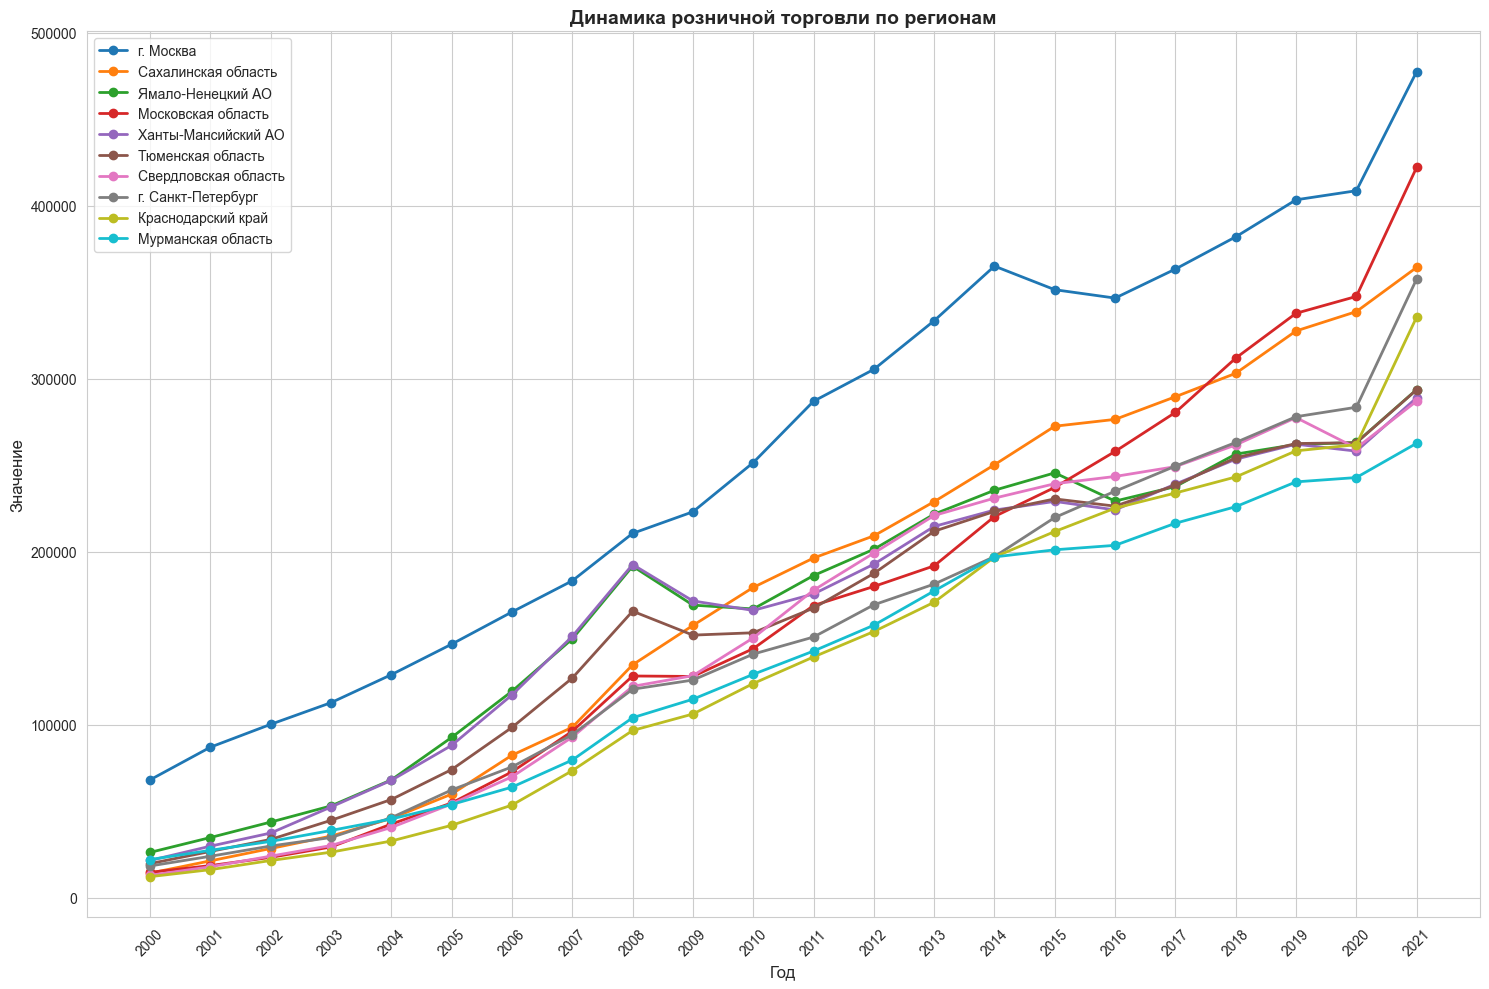

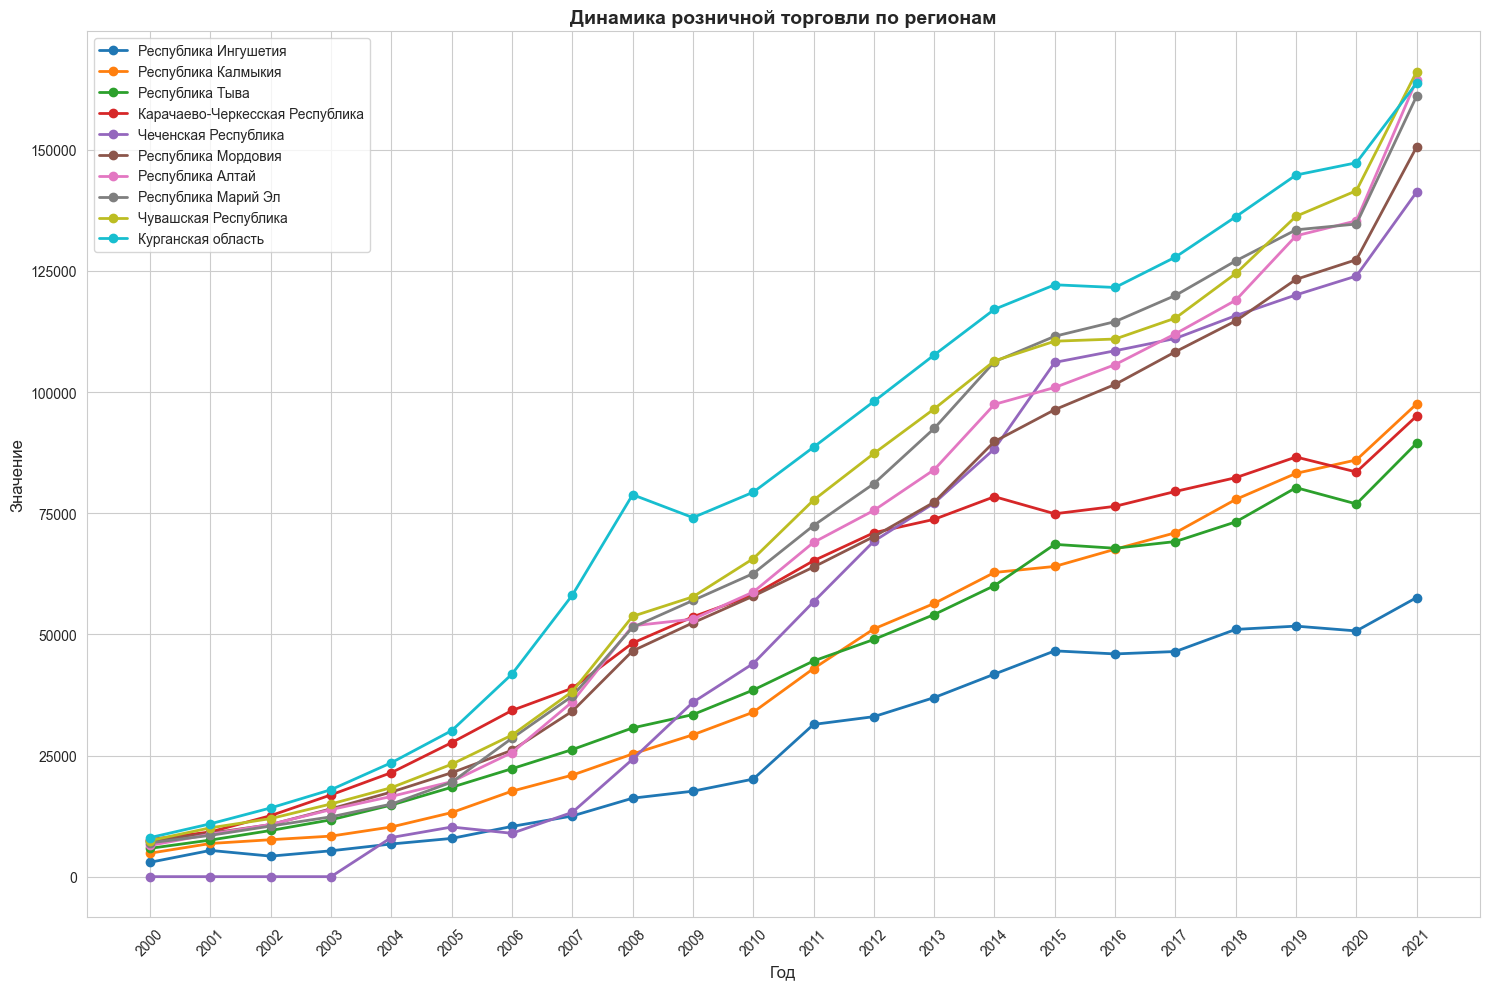

In [171]:
create_less_most_region_graph(retail, 'розничной торговли')

Все также подтверждаем, что к благополучным районам можем отнести Москву и Московскую область, а также Ямало ненцкий округ. А в Ингушетии, Тыве и Карачаево Черкесии торговля очень плохо развита, как и другие отрасли из-за чего относим их к бедным регионам.

In [172]:
retail = retail.add_prefix('retail_')

In [173]:
data = data.join(retail.set_index('retail_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  retail_2012  retail_2013  retail_2014  retail_2015  \
0        1506976.0  ...     129904.0     144992.0     164079.0     178097.0   
1        1407965.0  ...     121136.0     138669.0     158501.0     177048.0   
2        1558052.0  ...     103848.0     116202.0     129564.0     139408.0   
3        2422371.0  ...     139133.0     158218.0     181499.0     198814.0   
4        1178969.0  ...     109822.0     121813.0     138185.0     143349.0   

   retail_2016  retail_2017  retail_2018  retail_2019  retail_2020  \
0     192504.0     203298.0     217059.0     230704.0     237076.0   
1     179767.0     192775.0     209987.0     225818.0     225643.0   
2     143643.0     153088.0     164519.0     175251.0     177680.0   
3     208638.0     221302.0     236953.0     251882.0     252416.0   
4     143568.0     153993.0     163290.0     178517.0     180314.0   

   retail_2021  
0     259151.0  
1     257679.0  
2     207670.0  
3     296665.0  
4     211546.0  

[5 rows x 178 columns]

In [174]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 178 columns]

### Оценка жилишных условий

In [175]:
housing = pd.read_excel('../data/social_russia_data/housing_2020.xlsx')

housing.head()

Регион  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Bладимирская область   

   Число домохозяйств, проживающих во всех типах жилых помещений  \
0                                              100.0               
1                                                NaN               
2                                              100.0               
3                                              100.0               
4                                              100.0               

   в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности  \
0                                               80.7                                     
1                                                NaN                                     
2                                               86.3                                     
3                                               94.7                                     
4                                               81.8                                     

   в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность  \
0                                               15.4                                               
1                                                NaN                                               
2                                               11.7                                               
3                                                4.6                                               
4                                               15.8                                               

   в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность  \
0                                                3.8                                          
1                                                NaN                                          
2                                                2.0                                          
3                                                0.6                                          
4                                                2.5                                          

   затруднились ответить  \
0                    0.1   
1                    NaN   
2                    0.0   
3                    0.0   
4                    0.0   

   Размер общей площади в расчете на члена домохозяйства  \
0                                               24.2       
1                                                NaN       
2                                               25.1       
3                                               30.5       
4                                               24.2       

   Размер жилой площади в расчете на члена домохозяйства  \
0                                               16.9       
1                                                NaN       
2                                               17.8       
3                                               24.1       
4                                               16.1       

   Число жилых комнат в расчете на одно домохозяйство  
0                                                2.4   
1                                                NaN   
2                                                2.6   
3                                                3.2   
4                                                2.2

In [176]:
housing.columns = ['region', 'total', 'good', 'normal', 'bad', 'unknown', 'all_square', 'living_square', 'rooms']

In [177]:
housing.drop(['total', 'unknown'], axis=1, inplace=True)

In [178]:
housing.head()

region  good  normal  bad  all_square  \
0           Российская Федерация  80.7    15.4  3.8        24.2   
1  Центральный федеральный округ   NaN     NaN  NaN         NaN   
2           Белгородская область  86.3    11.7  2.0        25.1   
3               Брянская область  94.7     4.6  0.6        30.5   
4           Bладимирская область  81.8    15.8  2.5        24.2   

   living_square  rooms  
0           16.9    2.4  
1            NaN    NaN  
2           17.8    2.6  
3           24.1    3.2  
4           16.1    2.2

In [179]:
housing[housing.isna().any(axis=1)]

region  good  normal  bad  all_square  \
1          Центральный федеральный округ   NaN     NaN  NaN         NaN   
20     Северо-Западный федеральный округ   NaN     NaN  NaN         NaN   
32               Южный федеральный округ   NaN     NaN  NaN         NaN   
41  Северо-Кавказский  федеральный округ   NaN     NaN  NaN         NaN   
49         Приволжский федеральный округ   NaN     NaN  NaN         NaN   
64           Уральский федеральный округ   NaN     NaN  NaN         NaN   
71           Сибирский федеральный округ   NaN     NaN  NaN         NaN   
82     Дальневосточный федеральный округ   NaN     NaN  NaN         NaN   

    living_square  rooms  
1             NaN    NaN  
20            NaN    NaN  
32            NaN    NaN  
41            NaN    NaN  
49            NaN    NaN  
64            NaN    NaN  
71            NaN    NaN  
82            NaN    NaN

In [180]:
housing.iloc[housing[housing['region'] == 'Bладимирская область'].index, 0] = 'Владимирская область'
housing.iloc[housing[housing['region'] == 'Bолгоградская область'].index, 0] = 'Волгоградская область'
housing.iloc[housing[housing['region'] == 'Bологодская область'].index, 0] = 'Вологодская область'
housing.iloc[housing[housing['region'] == 'Bоронежская область'].index, 0] = 'Воронежская область'
housing.iloc[housing[housing['region'] == 'Архангельская область без авт. округа'].index, 0] = 'Архангельская область'
housing.iloc[housing[housing['region'] == 'Еврейская авт. область'].index, 0] = 'Еврейская автономная область'
housing.iloc[housing[housing['region'] == 'Ненецкий авт. округ'].index, 0] = 'Ненецкий автономный округ'
housing.iloc[housing[housing['region'] == 'Республика Саха(Якутия)'].index, 0] = 'Республика Саха (Якутия)'
housing.iloc[housing[housing['region'] == 'Тюменская область без авт. округов'].index, 0] = 'Тюменская область'
housing.iloc[housing[housing['region'] == 'Ханты-Мансийский авт. округ'].index, 0] = 'Ханты-Мансийский АО'
housing.iloc[housing[housing['region'] == 'Чукотский авт. округ'].index, 0] = 'Чукотский автономный округ'
housing.iloc[housing[housing['region'] == 'Ямало-Ненецкий авт. округ'].index, 0] = 'Ямало-Hенецкий АО'
housing.iloc[housing[housing['region'] == 'г.Москва'].index, 0] = 'г. Москва'

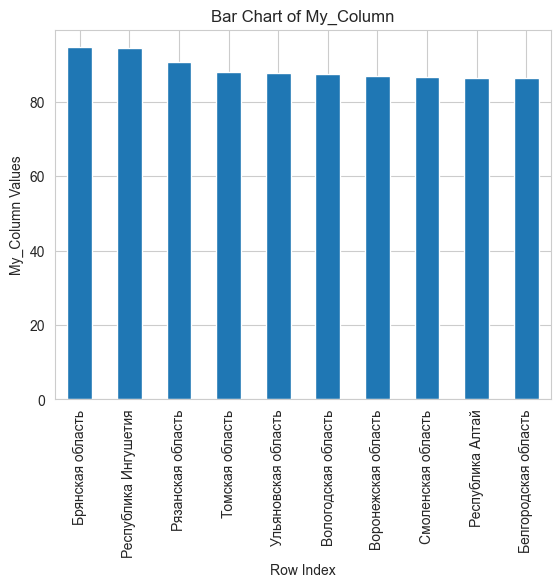

In [181]:
good_houses = housing.sort_values('good', ascending=False)
good_houses = good_houses.iloc[:10].set_index('region')

good_houses['good'].plot(kind='bar')
plt.title('Bar Chart of My_Column')
plt.xlabel('Row Index')
plt.ylabel('My_Column Values')
plt.show()

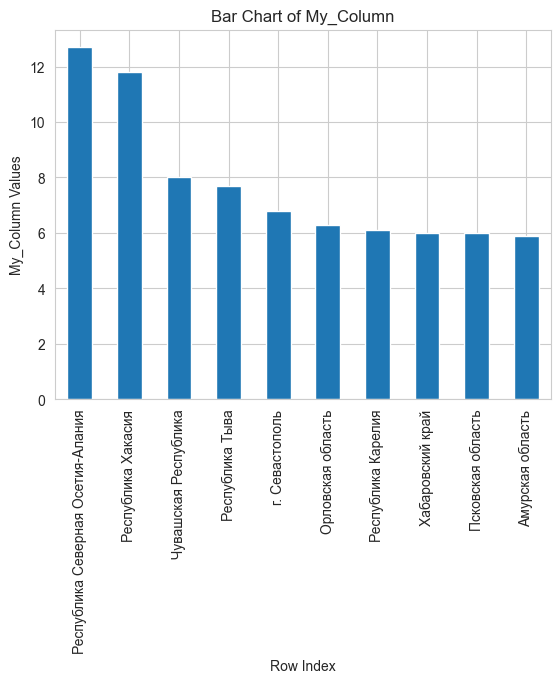

In [182]:
bad_houses = housing.sort_values('bad', ascending=False)
bad_houses = bad_houses.iloc[:10].set_index('region')

bad_houses['bad'].plot(kind='bar')
plt.title('Bar Chart of My_Column')
plt.xlabel('Row Index')
plt.ylabel('My_Column Values')
plt.show()

По данным графикам сложно судить о благополучности регионов, так как Инушетия, фигурировшая ранее как неблагополучный район имеет высокое качество жилищных условий. Но при этом Тыва входит в топ по худшим качествам.

In [183]:
housing = housing.add_prefix('housing_')

In [184]:
data = data.join(housing.set_index('housing_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  retail_2018  retail_2019  retail_2020  retail_2021  \
0        1506976.0  ...     217059.0     230704.0     237076.0     259151.0   
1        1407965.0  ...     209987.0     225818.0     225643.0     257679.0   
2        1558052.0  ...     164519.0     175251.0     177680.0     207670.0   
3        2422371.0  ...     236953.0     251882.0     252416.0     296665.0   
4        1178969.0  ...     163290.0     178517.0     180314.0     211546.0   

   housing_good  housing_normal  housing_bad  housing_all_square  \
0          86.3            11.7          2.0                25.1   
1          94.7             4.6          0.6                30.5   
2          81.8            15.8          2.5                24.2   
3          87.0            11.4          1.6                29.0   
4          76.9            19.1          3.9                25.2   

   housing_living_square  housing_rooms  
0                   17.8            2.6  
1                   24.1            3.2  
2                   16.1            2.2  
3                   19.9            2.6  
4                   18.1            2.4  

[5 rows x 184 columns]

In [185]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 184 columns]

### Новорожденные

In [186]:
newborn = pd.read_csv('../data/social_russia_data/newborn_2006_2022_monthly.csv', sep=';')

newborn.head()

Region январь 2006 г. февраль 2006 г. март 2006 г.  \
0           Российская Федерация         109422       114068,99    129177,99   
1  Центральный федеральный округ       24998,99        25539,99     29558,99   
2           Белгородская область           1040            1094         1190   
3               Брянская область            904             989         1039   
4           Владимирская область           1040            1059         1236   

  апрель 2006 г. май 2006 г. июнь 2006 г. июль 2006 г. август 2006 г.  \
0      113391,99   125099,99       124238    125926,99      140227,99   
1          25781       29137        28837     28997,99       31590,99   
2           1044        1228         1249         1224           1389   
3            936        1072          961         1058           1121   
4           1063        1226         1144         1221           1333   

  сентябрь 2006 г.  ... сентябрь 2021 г. октябрь 2021 г. ноябрь 2021 г.  \
0        123949,99  ...        121645,99       120080,99      114976,99   
1         27755,99  ...            29727        29532,99          29093   
2             1157  ...             1084            1053            990   
3              989  ...              784             751            783   
4             1177  ...              783             834            769   

  декабрь 2021 г. январь 2022 г. февраль 2022 г. март 2022 г. апрель 2022 г.  \
0       117945,99         103782          101082       115512       99696,99   
1           29477          25827           25678        28086       24979,99   
2            1028            861             941          956            801   
3             729            707             670          740            589   
4             821            691             700          708            660   

  май 2022 г. Unnamed: 198  
0      103159          NaN  
1       26304          NaN  
2         869          NaN  
3         660          NaN  
4         711          NaN  

[5 rows x 199 columns]

In [187]:
newborn = newborn.iloc[:, :-1]

In [188]:
newborn.iloc[:,1:] = newborn.iloc[:,1:].apply(lambda x: pd.to_numeric(x.str.replace(',', '.'), errors='coerce'))

In [189]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for year in years:
    # Находим колонки, заканчивающиеся на год (например, "2011")
    cols = [col for col in newborn.columns if col.endswith(f'{year} г.')]
    newborn[f'{year}'] = newborn[cols].sum(axis=1)

In [190]:
newborn.head()

Region январь 2006 г. февраль 2006 г. март 2006 г.  \
0           Российская Федерация       109422.0       114068.99    129177.99   
1  Центральный федеральный округ       24998.99        25539.99     29558.99   
2           Белгородская область         1040.0          1094.0       1190.0   
3               Брянская область          904.0           989.0       1039.0   
4           Владимирская область         1040.0          1059.0       1236.0   

  апрель 2006 г. май 2006 г. июнь 2006 г. июль 2006 г. август 2006 г.  \
0      113391.99   125099.99     124238.0    125926.99      140227.99   
1        25781.0     29137.0      28837.0     28997.99       31590.99   
2         1044.0      1228.0       1249.0       1224.0         1389.0   
3          936.0      1072.0        961.0       1058.0         1121.0   
4         1063.0      1226.0       1144.0       1221.0         1333.0   

  сентябрь 2006 г.  ...        2013        2014        2015        2016  \
0        123949.99  ...  1901181.95  1918089.96  1944135.92  1893255.94   
1         27755.99  ...   439292.95   445745.97   458275.96   456197.98   
2           1157.0  ...     17883.0     17822.0     17864.0     17261.0   
3            989.0  ...     13855.0    13657.99     14067.0     13379.0   
4           1177.0  ...     15777.0     15817.0     16284.0     15662.0   

         2017        2018        2019        2020        2021       2022  
0  1689883.95  1604588.92  1484516.92  1435749.94  1402833.91  523231.99  
1   410627.92   391829.94   369323.93   354091.94   349884.94  130874.99  
2     15113.0     14318.0    13197.99    12351.99     12223.0     4428.0  
3    11552.99     11124.0     10028.0      9480.0      9047.0     3366.0  
4     13395.0     12658.0     11158.0     10120.0      9780.0     3470.0  

[5 rows x 215 columns]

In [191]:
new_col = newborn.columns.get_loc('2006')

In [192]:
newborn = newborn.drop(newborn.columns[1:new_col], axis=1)

In [193]:
newborn.head()

Region        2006        2007        2008  \
0           Российская Федерация  1476220.91  1602386.93  1717480.94   
1  Центральный федеральный округ   335769.94   358612.95   384824.96   
2           Белгородская область     14269.0     15666.0     16810.0   
3               Брянская область     12042.0    13282.99     14319.0   
4           Владимирская область     13915.0     14679.0     15699.0   

         2009        2010        2011        2012        2013        2014  \
0  1764163.99  1789622.97  1793827.98  1896262.96  1901181.95  1918089.96   
1   400637.95   410712.94   412794.93   438709.94   439292.95   445745.97   
2     16911.0     16669.0     16894.0     17913.0     17883.0     17822.0   
3     14406.0     13773.0     13806.0     14376.0     13855.0    13657.99   
4     15520.0     15540.0     15644.0     16445.0     15777.0     15817.0   

         2015        2016        2017        2018        2019        2020  \
0  1944135.92  1893255.94  1689883.95  1604588.92  1484516.92  1435749.94   
1   458275.96   456197.98   410627.92   391829.94   369323.93   354091.94   
2     17864.0     17261.0     15113.0     14318.0    13197.99    12351.99   
3     14067.0     13379.0    11552.99     11124.0     10028.0      9480.0   
4     16284.0     15662.0     13395.0     12658.0     11158.0     10120.0   

         2021       2022  
0  1402833.91  523231.99  
1   349884.94  130874.99  
2     12223.0     4428.0  
3      9047.0     3366.0  
4      9780.0     3470.0

In [194]:
newborn = newborn.rename(columns={'Region': 'region'})

In [195]:
newborn.head()

region        2006        2007        2008  \
0           Российская Федерация  1476220.91  1602386.93  1717480.94   
1  Центральный федеральный округ   335769.94   358612.95   384824.96   
2           Белгородская область     14269.0     15666.0     16810.0   
3               Брянская область     12042.0    13282.99     14319.0   
4           Владимирская область     13915.0     14679.0     15699.0   

         2009        2010        2011        2012        2013        2014  \
0  1764163.99  1789622.97  1793827.98  1896262.96  1901181.95  1918089.96   
1   400637.95   410712.94   412794.93   438709.94   439292.95   445745.97   
2     16911.0     16669.0     16894.0     17913.0     17883.0     17822.0   
3     14406.0     13773.0     13806.0     14376.0     13855.0    13657.99   
4     15520.0     15540.0     15644.0     16445.0     15777.0     15817.0   

         2015        2016        2017        2018        2019        2020  \
0  1944135.92  1893255.94  1689883.95  1604588.92  1484516.92  1435749.94   
1   458275.96   456197.98   410627.92   391829.94   369323.93   354091.94   
2     17864.0     17261.0     15113.0     14318.0    13197.99    12351.99   
3     14067.0     13379.0    11552.99     11124.0     10028.0      9480.0   
4     16284.0     15662.0     13395.0     12658.0     11158.0     10120.0   

         2021       2022  
0  1402833.91  523231.99  
1   349884.94  130874.99  
2     12223.0     4428.0  
3      9047.0     3366.0  
4      9780.0     3470.0

In [196]:
common_converter(newborn)

In [197]:
newborn = newborn.replace(0, np.nan)

/var/folders/vl/s18yh_n12dx_d52qtf4ktx8w0000gn/T/ipykernel_2702/1551986221.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newborn = newborn.replace(0, np.nan)


In [198]:
newborn.iloc[:,1:] = newborn.iloc[:,1:].apply(lambda row: row.fillna(round(row.bfill())), axis=1)

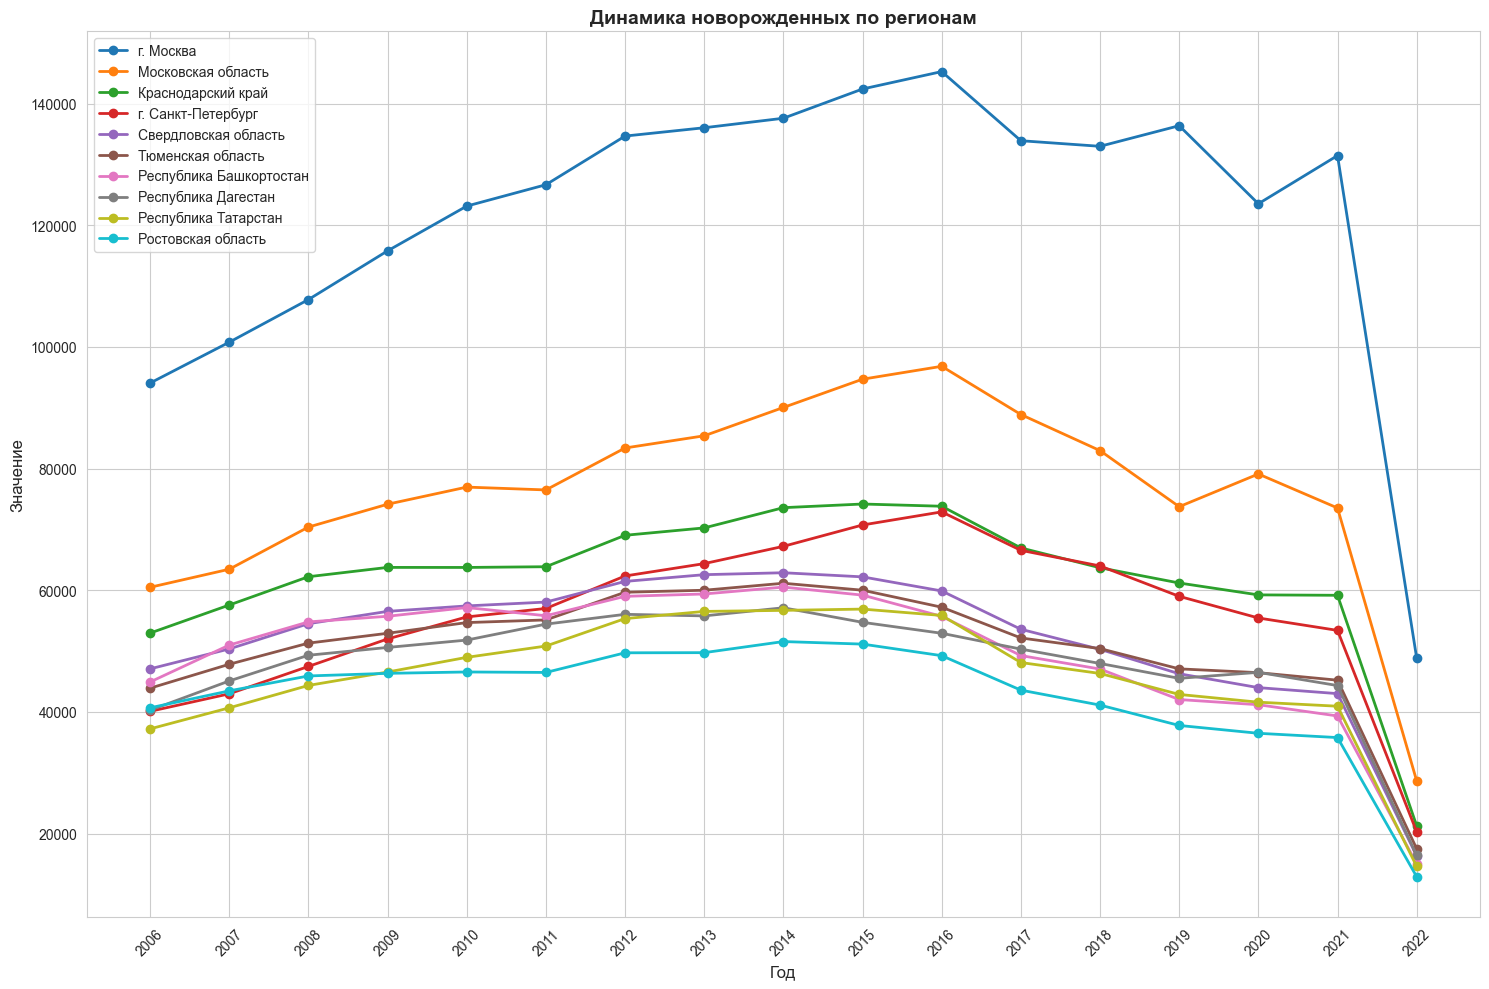

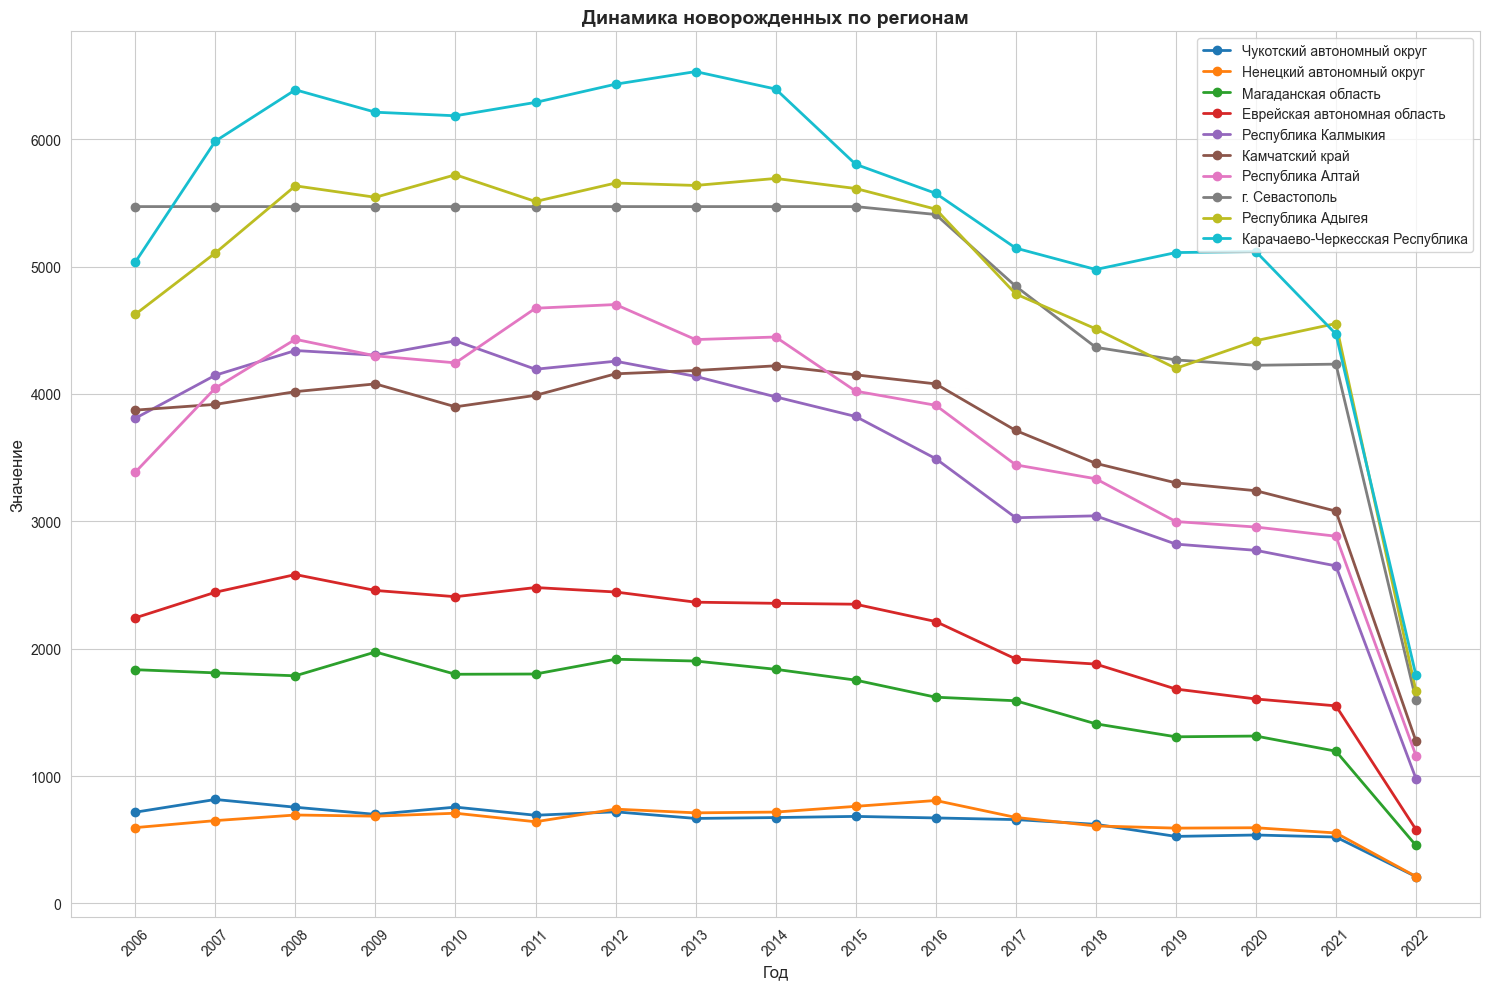

In [199]:
create_less_most_region_graph(newborn, 'новорожденных')

По графикам видем самую высокую рождаемость в Москве и московской области. Самую низкую рождаемость наблюдаем в Чукотском и Ненецком автономных округах, несмотря на то, что в регионах высокий уровень зарплат, скорее всего в регионах тяжело жить из за сурового климата.

In [200]:
newborn = newborn.add_prefix('newborn_')

In [201]:
data = data.join(newborn.set_index('newborn_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  newborn_2013  newborn_2014  newborn_2015  \
0        1506976.0  ...      17883.00      17822.00      17864.00   
1        1407965.0  ...      13855.00      13657.99      14067.00   
2        1558052.0  ...      15777.00      15817.00      16284.00   
3        2422371.0  ...      24980.97      25331.99      25923.98   
4        1178969.0  ...      11769.00      11694.97      11761.00   

   newborn_2016  newborn_2017  newborn_2018  newborn_2019  newborn_2020  \
0       17261.0      15113.00      14318.00      13197.99      12351.99   
1       13379.0      11552.99      11124.00      10028.00       9480.00   
2       15662.0      13395.00      12658.00      11158.00      10120.00   
3       24938.0      22423.00      21381.99      19643.00      19161.00   
4       11184.0       9877.00       9134.00       7951.00       7563.00   

   newborn_2021  newborn_2022  
0       12223.0        4428.0  
1        9047.0        3366.0  
2        9780.0        3470.0  
3       18593.0        6872.0  
4        7327.0        2794.0  

[5 rows x 201 columns]

In [202]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 201 columns]

### Смертность детей в городах

In [203]:
urban_mort = pd.read_excel('../data/social_russia_data/child_mortality_urban_1990_2021.xls')

urban_mort.head()

Число умерших на первом году жизни детей за год (человек, значение показателя за год)  \
0                                                NaN                                      
1                                                NaN                                      
2                               Российская Федерация                                      
3                      Центральный федеральный округ                                      
4                               Белгородская область                                      

  Unnamed: 1           Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0        NaN                  NaN         NaN         NaN         NaN   
1        NaN                  NaN      1990.0      1991.0      1992.0   
2   Оба пола  городское население     23902.0     21549.0     19097.0   
3   Оба пола  городское население      5317.0      4734.0      4175.0   
4   Оба пола  городское население       209.0       198.0       165.0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 25  \
0         NaN         NaN         NaN         NaN  ...          NaN   
1      1993.0      1994.0      1995.0      1996.0  ...       2012.0   
2     18106.0     17131.0     16258.0     14842.0  ...      10843.0   
3      3899.0      3871.0      3631.0      3254.0  ...       2789.0   
4       165.0       153.0       131.0       102.0  ...         84.0   

   Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  \
0          NaN          NaN          NaN          NaN          NaN   
1       2013.0       2014.0       2015.0       2016.0       2017.0   
2      10418.0       9641.0       8499.0       7860.0       6545.0   
3       2735.0       2402.0       2228.0       2146.0       1785.0   
4         68.0         62.0         68.0         72.0         43.0   

   Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  
0          NaN          NaN          NaN          NaN  
1       2018.0       2019.0       2020.0       2021.0  
2       5723.0       5206.0       4573.0       4664.0  
3       1593.0       1409.0       1153.0       1192.0  
4         40.0         23.0         25.0         34.0  

[5 rows x 35 columns]

In [204]:
new_columns = urban_mort.iloc[1].values
urban_mort = urban_mort.iloc[2:].set_axis(new_columns, axis=1)

In [205]:
columns = list(['region','sex','type', *[str(int(x)) for x in urban_mort.columns[3:]]])

urban_mort.columns = columns

In [206]:
urban_mort.drop(['sex', 'type'], axis=1, inplace=True)
urban_mort.reset_index(drop=True, inplace=True)

In [207]:
urban_mort.head()

region     1990     1991     1992     1993  \
0               Российская Федерация  23902.0  21549.0  19097.0  18106.0   
1      Центральный федеральный округ   5317.0   4734.0   4175.0   3899.0   
2               Белгородская область    209.0    198.0    165.0    165.0   
3                   Брянская область    198.0    195.0    200.0    176.0   
4               Владимирская область    221.0    209.0    179.0    148.0   

      1994     1995     1996     1997     1998  ...     2012     2013    2014  \
0  17131.0  16258.0  14842.0  14034.0  13883.0  ...  10843.0  10418.0  9641.0   
1   3871.0   3631.0   3254.0      NaN      NaN  ...   2789.0   2735.0  2402.0   
2    153.0    131.0    102.0    100.0     99.0  ...     84.0     68.0    62.0   
3    157.0    125.0    116.0    135.0    107.0  ...     81.0     77.0    87.0   
4    165.0    146.0    114.0    123.0    130.0  ...     97.0     86.0    87.0   

     2015    2016    2017    2018    2019    2020    2021  
0  8499.0  7860.0  6545.0  5723.0  5206.0  4573.0  4664.0  
1  2228.0  2146.0  1785.0  1593.0  1409.0  1153.0  1192.0  
2    68.0    72.0    43.0    40.0    23.0    25.0    34.0  
3    67.0    67.0    65.0    33.0    26.0    29.0    14.0  
4    76.0    72.0    59.0    45.0    43.0    51.0    52.0  

[5 rows x 33 columns]

In [208]:
urban_mort[urban_mort.isna().any(axis=1)]

region    1990    1991  \
1                        Центральный федеральный округ  5317.0  4734.0   
20                   Северо-Западный федеральный округ  2419.0  2055.0   
25               Архангельская область (кроме Ненец...     NaN     NaN   
33               Южный федеральный округ (по 2009 год)  3151.0  3161.0   
34               Южный федеральный округ (с 2010 года)  1912.0  1847.0   
35              Южный федеральный округ (с 29.07.2016)     NaN     NaN   
38                                     Республика Крым     NaN     NaN   
43             Город федерального значения Севастополь     NaN     NaN   
44                 Северо-Кавказский федеральный округ  1239.0  1314.0   
50                                Чеченская Республика   263.0   326.0   
52                       Приволжский федеральный округ  5353.0  4633.0   
60               Коми-Пермяцкий округ, входящий в с...    13.0    13.0   
68                         Уральский федеральный округ  2184.0  1952.0   
72               Ханты-Мансийский автономный округ ...   331.0   315.0   
74               Тюменская область (кроме Ханты-Ман...     NaN     NaN   
76                         Сибирский федеральный округ  3878.0  3614.0   
77                         Сибирский федеральный округ     NaN     NaN   
83               Таймырский (Долгано-Ненецкий) авто...    11.0     7.0   
84               Эвенкийский автономный округ (Крас...     3.0     2.0   
86                      Усть-Ордынский Бурятский округ     9.0    16.0   
91                   Дальневосточный федеральный округ  1600.0  1400.0   
92                   Дальневосточный федеральный округ     NaN     NaN   
95               Агинский Бурятский округ (Забайкал...    11.0    14.0   
98               Корякский округ, входящий в состав...     4.0     2.0   
106                         Крымский федеральный округ     NaN     NaN   
107                   Чеченская и Ингушская Республики   263.0   326.0   
108                                     Северный район   943.0   809.0   
109                              Северо-Западный район  1354.0  1122.0   
110                                  Центральный район  4347.0  3858.0   
111                                Волго-Вятский район  1172.0  1026.0   
112                       Центрально-Черноземный район   970.0   876.0   
113                                   Поволжский район  2858.0  2498.0   
114                            Северо-Кавказский район  2591.0  2594.0   
115                                    Уральский район  3402.0  3044.0   
116                            Западно-Сибирский район  2645.0  2404.0   
117                           Восточно-Сибирский район  1898.0  1794.0   
118                              Дальневосточный район  1600.0  1400.0   

       1992    1993    1994    1995    1996    1997    1998  ...    2012  \
1    4175.0  3899.0  3871.0  3631.0  3254.0     NaN     NaN  ...  2789.0   
20   1764.0  1617.0  1572.0  1497.0  1249.0     NaN     NaN  ...   806.0   
25      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
33   2952.0  2612.0  2399.0  2326.0  2216.0     NaN     NaN  ...     NaN   
34   1636.0  1738.0  1621.0  1446.0  1337.0     NaN     NaN  ...   898.0   
35      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
38      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
43      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
44   1316.0   874.0   778.0   880.0   879.0     NaN     NaN  ...  1082.0   
50    393.0     0.0     0.0     0.0     0.0     NaN     NaN  ...   322.0   
52   4157.0  4078.0  3839.0  3598.0  3204.0     NaN     NaN  ...  1984.0   
60     16.0     6.0    11.0    11.0     7.0     7.0    10.0  ...     NaN   
68   1687.0  1712.0  1584.0  1616.0  1492.0     NaN     NaN  ...   982.0   
72    279.0   311.0   244.0   280.0   195.0   167.0   162.0  ...   109.0   
74      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
76   3116.0  3073.0

In [209]:
urban_mort.iloc[:,1:] = urban_mort.iloc[:,1:].apply(lambda row: row.fillna(row.median()), axis=1)

In [210]:
common_converter(urban_mort)

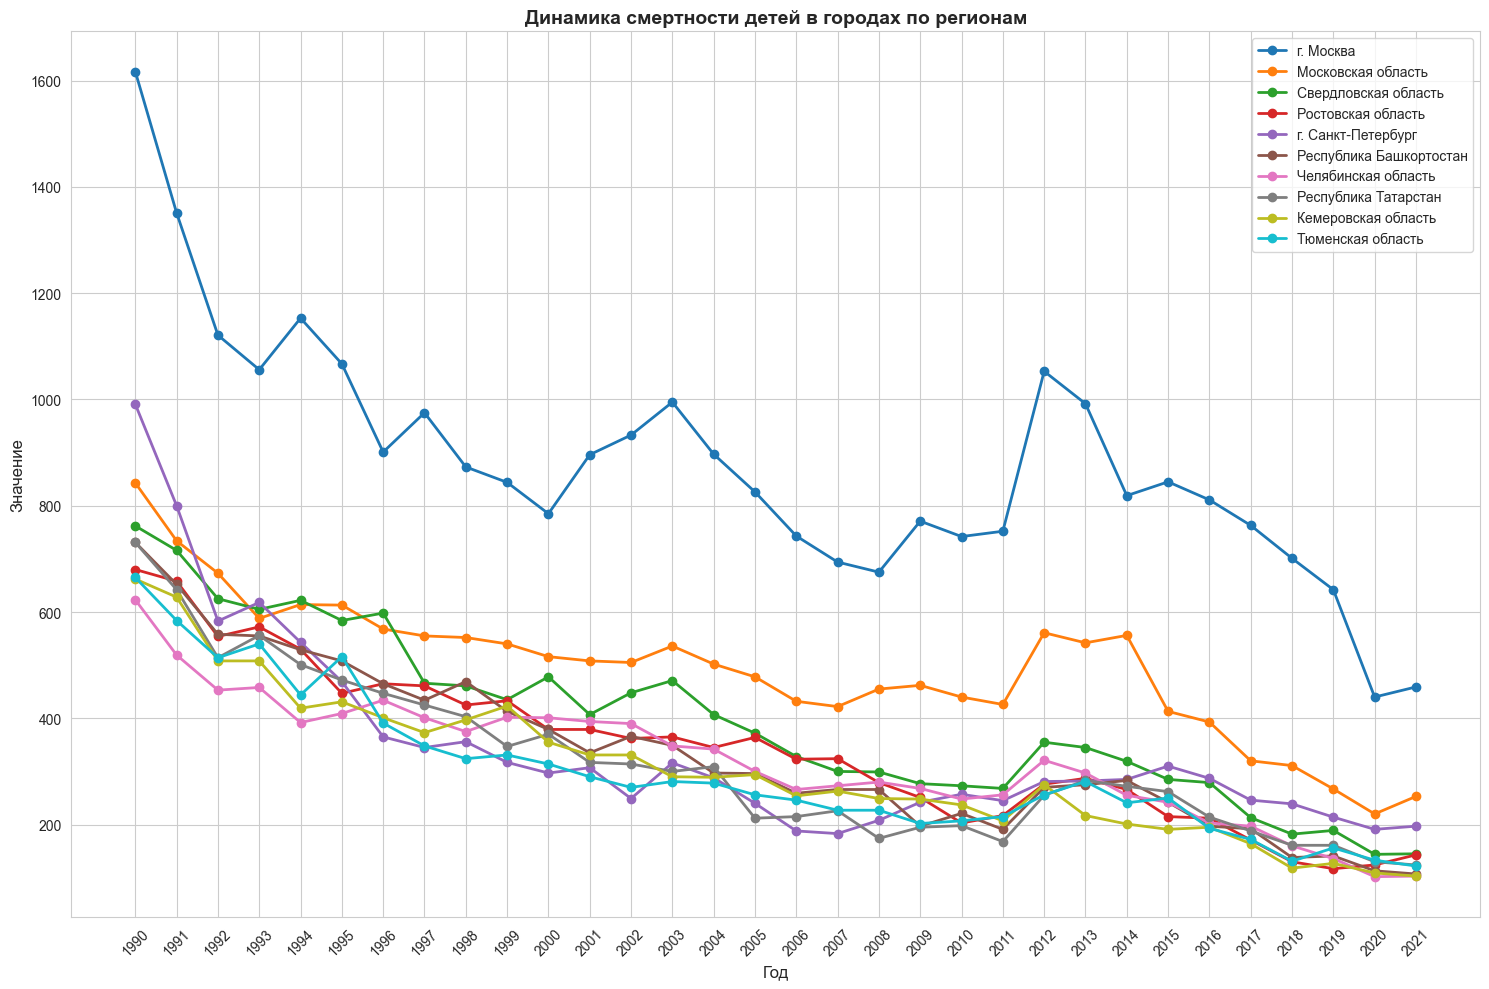

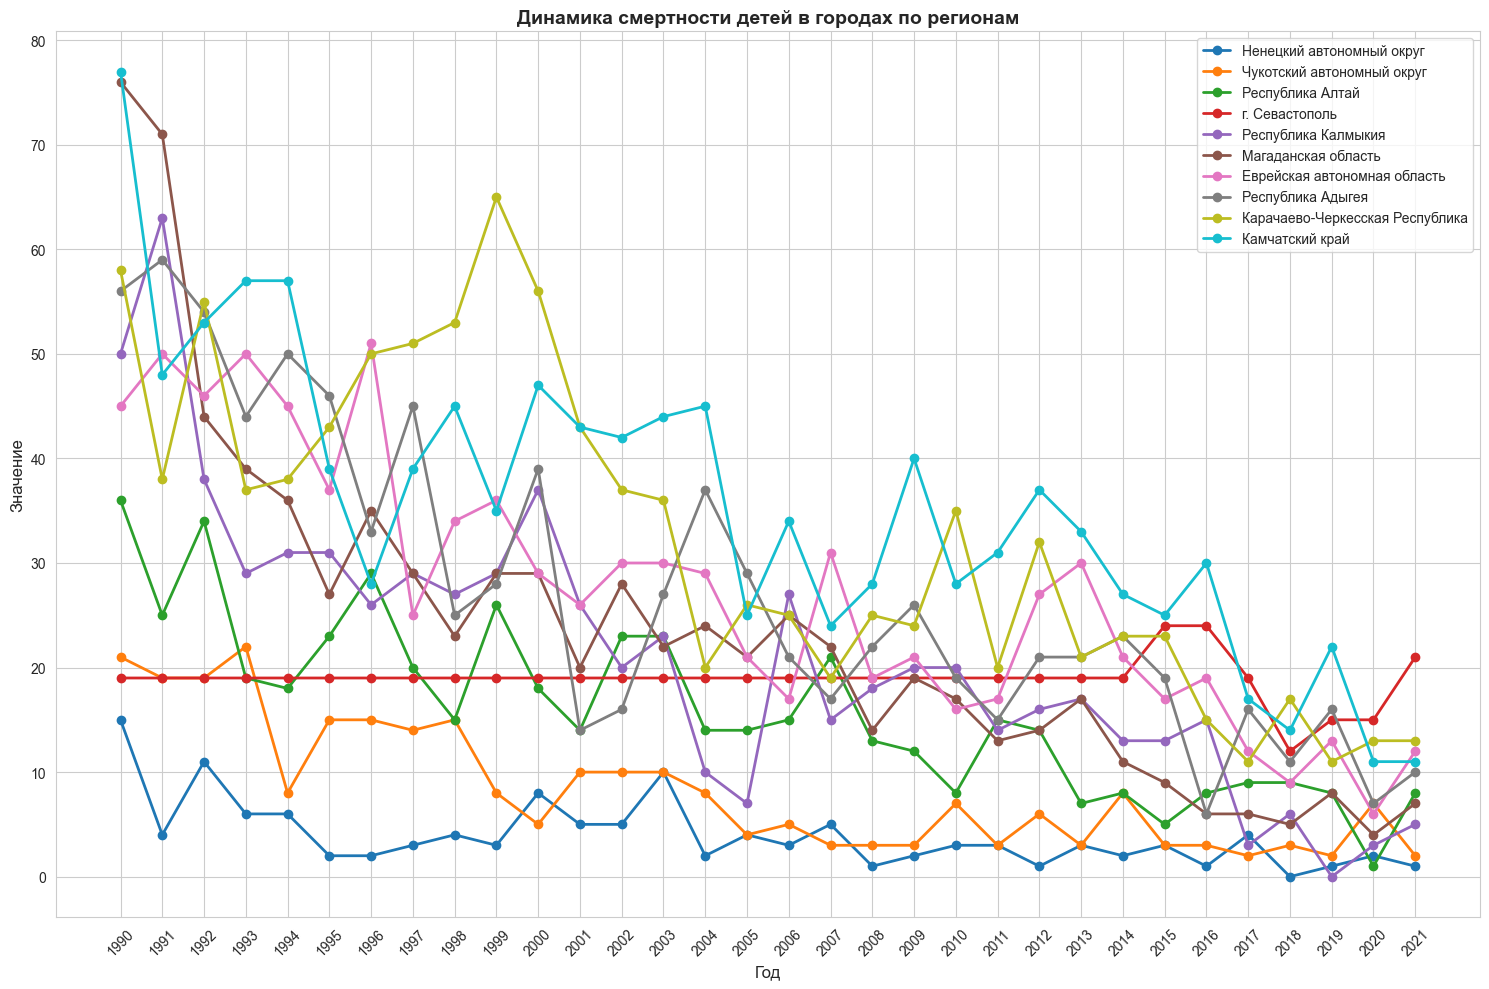

In [211]:
create_less_most_region_graph(urban_mort, 'смертности детей в городах')

Высокая смертность наблюдается в Москве и Московской области, что говорит скорее об общем высоком кол-ве родившихся детей в этих регионах. Самый низкий уровень смертности детей в ненецком округе и чукотском округе, что говорит о том, что там низкая рождаемость. По данной статистике сложно судить о благополучии регионов.

In [212]:
urban_mort = urban_mort.add_prefix('urban_mort_')

In [213]:
data = data.join(urban_mort.set_index('urban_mort_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  urban_mort_2012  urban_mort_2013  urban_mort_2014  \
0        1506976.0  ...             84.0             68.0             62.0   
1        1407965.0  ...             81.0             77.0             87.0   
2        1558052.0  ...             97.0             86.0             87.0   
3        2422371.0  ...            134.0            153.0            112.0   
4        1178969.0  ...             58.0             67.0             58.0   

   urban_mort_2015  urban_mort_2016  urban_mort_2017  urban_mort_2018  \
0             68.0             72.0             43.0             40.0   
1             67.0             67.0             65.0             33.0   
2             76.0             72.0             59.0             45.0   
3            101.0             96.0             90.0             77.0   
4             48.0             51.0             31.0             28.0   

   urban_mort_2019  urban_mort_2020  urban_mort_2021  
0             23.0             25.0             34.0  
1             26.0             29.0             14.0  
2             43.0             51.0             52.0  
3             74.0             58.0             73.0  
4             31.0             25.0             20.0  

[5 rows x 233 columns]

In [214]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 233 columns]

### Детская смертность в сельской местности

In [215]:
rural_mort = pd.read_excel('../data/social_russia_data/child_mortality_rural_1990_2021.xls')

rural_mort.head()

Число умерших на первом году жизни детей за год (человек, значение показателя за год)  \
0                                                NaN                                      
1                                                NaN                                      
2                               Российская Федерация                                      
3                      Центральный федеральный округ                                      
4                               Белгородская область                                      

  Unnamed: 1          Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0        NaN                 NaN         NaN         NaN         NaN   
1        NaN                 NaN      1990.0      1991.0      1992.0   
2   Оба пола  сельское население     11186.0     10943.0     10111.0   
3   Оба пола  сельское население      1615.0      1550.0      1361.0   
4   Оба пола  сельское население       103.0        92.0        75.0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 25  \
0         NaN         NaN         NaN         NaN  ...          NaN   
1      1993.0      1994.0      1995.0      1996.0  ...       2012.0   
2      9840.0      9010.0      8582.0      7983.0  ...       5463.0   
3      1426.0      1347.0      1321.0      1200.0  ...        625.0   
4        79.0        80.0        72.0        72.0  ...         43.0   

   Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  \
0          NaN          NaN          NaN          NaN          NaN   
1       2013.0       2014.0       2015.0       2016.0       2017.0   
2       5059.0       4681.0       4165.0       3568.0       3032.0   
3        608.0        487.0        490.0        426.0        347.0   
4         48.0         41.0         42.0         36.0         34.0   

   Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  
0          NaN          NaN          NaN          NaN  
1       2018.0       2019.0       2020.0       2021.0  
2       2521.0       2122.0       1916.0       1852.0  
3        291.0        211.0        228.0        212.0  
4         33.0         16.0         22.0         20.0  

[5 rows x 35 columns]

In [216]:
new_columns = rural_mort.iloc[1].values
rural_mort = rural_mort.iloc[2:].set_axis(new_columns, axis=1)

In [217]:
columns = list(['region','sex','type', *[str(int(x)) for x in rural_mort.columns[3:]]])

rural_mort.columns = columns

In [218]:
rural_mort.drop(['sex', 'type'], axis=1, inplace=True)
rural_mort.reset_index(drop=True, inplace=True)

In [219]:
rural_mort.head()

region     1990     1991     1992    1993  \
0               Российская Федерация  11186.0  10943.0  10111.0  9840.0   
1      Центральный федеральный округ   1615.0   1550.0   1361.0  1426.0   
2               Белгородская область    103.0     92.0     75.0    79.0   
3                   Брянская область    124.0    109.0     83.0   121.0   
4               Владимирская область     80.0     58.0     60.0    62.0   

     1994    1995    1996    1997    1998  ...    2012    2013    2014  \
0  9010.0  8582.0  7983.0  7701.0  7214.0  ...  5463.0  5059.0  4681.0   
1  1347.0  1321.0  1200.0     NaN     NaN  ...   625.0   608.0   487.0   
2    80.0    72.0    72.0    67.0    61.0  ...    43.0    48.0    41.0   
3    99.0   104.0    96.0    67.0    75.0  ...    46.0    47.0    39.0   
4    46.0    50.0    47.0    38.0    39.0  ...    30.0    31.0    23.0   

     2015    2016    2017    2018    2019    2020    2021  
0  4165.0  3568.0  3032.0  2521.0  2122.0  1916.0  1852.0  
1   490.0   426.0   347.0   291.0   211.0   228.0   212.0  
2    42.0    36.0    34.0    33.0    16.0    22.0    20.0  
3    44.0    36.0    31.0    12.0    11.0    12.0    13.0  
4    31.0    28.0    17.0    22.0    15.0    10.0    14.0  

[5 rows x 33 columns]

In [220]:
rural_mort[rural_mort.isna().any(axis=1)]

region    1990    1991  \
1                        Центральный федеральный округ  1615.0  1550.0   
19           Город Москва столица Российской Федера...     0.0     0.0   
20                   Северо-Западный федеральный округ   637.0   591.0   
25               Архангельская область (кроме Ненец...     NaN     NaN   
32           Город Санкт-Петербург город федерально...     0.0     0.0   
33               Южный федеральный округ (по 2009 год)  2985.0  3010.0   
34               Южный федеральный округ (с 2010 года)  1145.0  1156.0   
35              Южный федеральный округ (с 29.07.2016)     NaN     NaN   
38                                     Республика Крым     NaN     NaN   
43             Город федерального значения Севастополь     NaN     NaN   
44                 Северо-Кавказский федеральный округ  1840.0  1854.0   
50                                Чеченская Республика   662.0   660.0   
52                       Приволжский федеральный округ  2190.0  2280.0   
60               Коми-Пермяцкий округ, входящий в с...    27.0    30.0   
68                         Уральский федеральный округ   813.0   740.0   
72               Ханты-Мансийский автономный округ ...    44.0    44.0   
74               Тюменская область (кроме Ханты-Ман...     NaN     NaN   
76                         Сибирский федеральный округ  2189.0  2081.0   
77                         Сибирский федеральный округ     NaN     NaN   
83               Таймырский (Долгано-Ненецкий) авто...    11.0    10.0   
84               Эвенкийский автономный округ (Крас...    14.0     8.0   
86                      Усть-Ордынский Бурятский округ    69.0    48.0   
91                   Дальневосточный федеральный округ   757.0   691.0   
92                   Дальневосточный федеральный округ     NaN     NaN   
95               Агинский Бурятский округ (Забайкал...    18.0    17.0   
98               Корякский округ, входящий в состав...     5.0    10.0   
106                         Крымский федеральный округ     NaN     NaN   
107                   Чеченская и Ингушская Республики   662.0   660.0   
108                                     Северный район   346.0   333.0   
109                              Северо-Западный район   227.0   211.0   
110                                  Центральный район  1097.0  1012.0   
111                                Волго-Вятский район   574.0   525.0   
112                       Центрально-Черноземный район   518.0   538.0   
113                                   Поволжский район  1056.0  1106.0   
114                            Северо-Кавказский район  2675.0  2711.0   
115                                    Уральский район  1415.0  1421.0   
116                            Западно-Сибирский район  1242.0  1286.0   
117                           Восточно-Сибирский район  1215.0  1062.0   
118                              Дальневосточный район   757.0   691.0   

       1992    1993    1994    1995    1996    1997    1998  ...    2012  \
1    1361.0  1426.0  1347.0  1321.0  1200.0     NaN     NaN  ...   625.0   
19      0.0     0.0     0.0     0.0     0.0     NaN     NaN  ...     3.0   
20    546.0   509.0   516.0   456.0   423.0     NaN     NaN  ...   216.0   
25      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
32      0.0     0.0     0.0     0.0     0.0     NaN     NaN  ...     NaN   
33   2817.0  2392.0  2275.0  2259.0  2074.0     NaN     NaN  ...     NaN   
34   1153.0  1227.0  1188.0  1118.0   959.0     NaN     NaN  ...   555.0   
35      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
38      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
43      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN   
44   1664.0  1165.0  1087.0  1141.0  1115.0     NaN     NaN  ...  1343.0   
50    510.0     0.0     0.0     0.0     0.0     NaN     NaN  ...   439.0   
52   2212.0  2253.0  1995.0  1904.0  1770.0     NaN     NaN  ...  1017.0   
60     31.0    32.0    

In [221]:
rural_mort.iloc[:,1:] = rural_mort.iloc[:,1:].apply(lambda row: row.fillna(row.bfill()), axis=1)
rural_mort.iloc[:,1:] = rural_mort.iloc[:,1:].apply(lambda row: row.fillna(row.ffill()), axis=1)

In [222]:
common_converter(rural_mort)

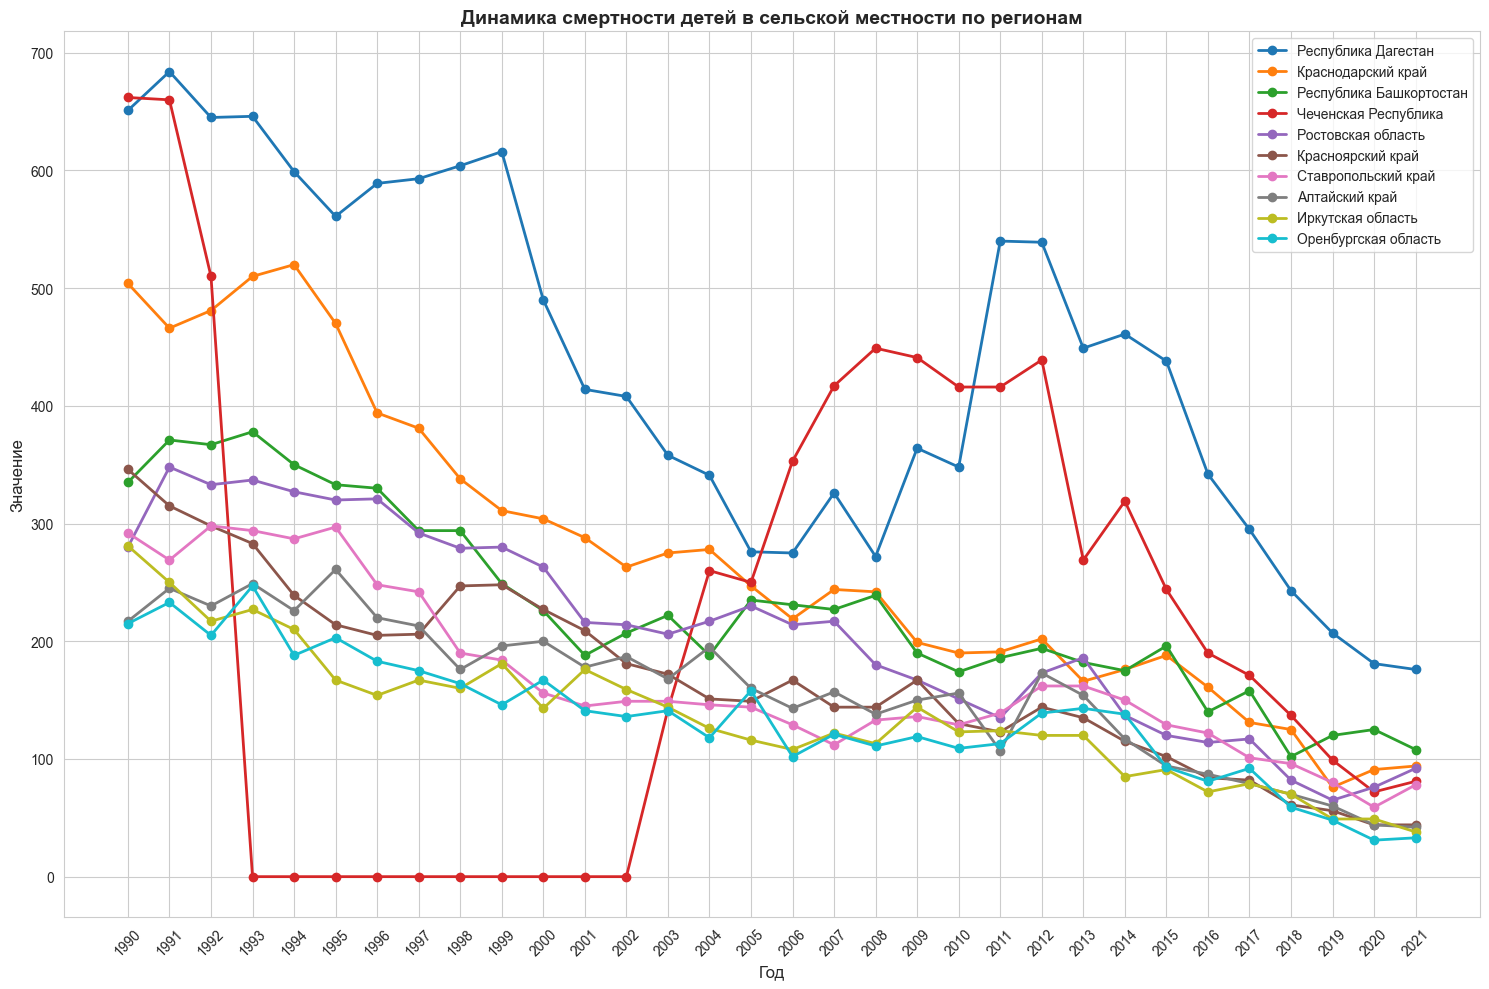

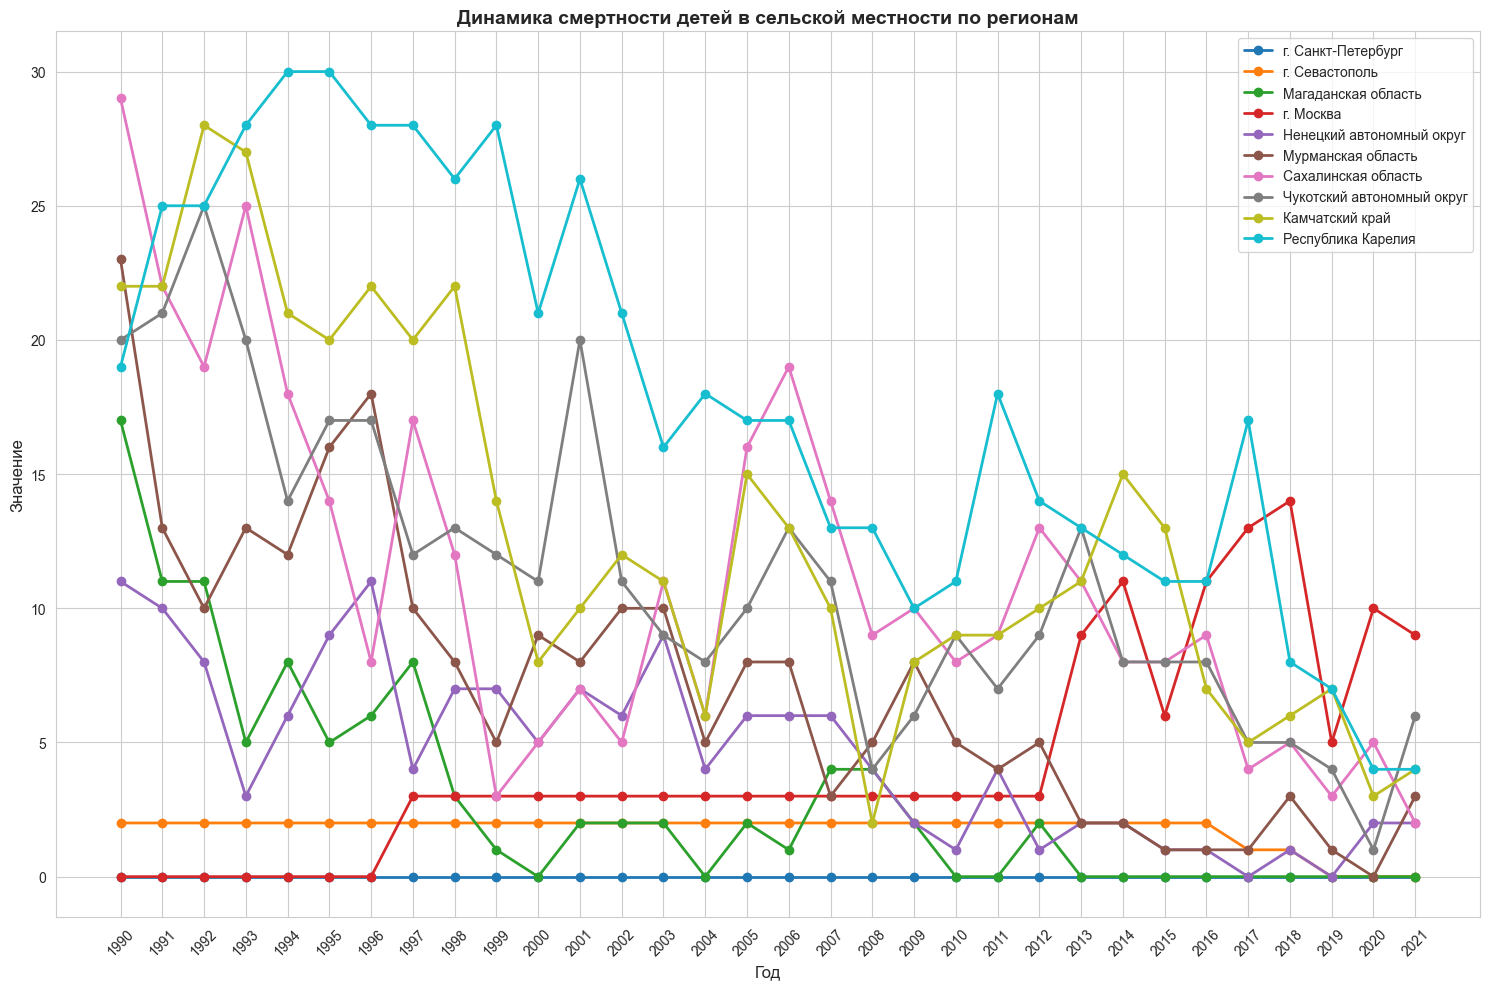

In [223]:
create_less_most_region_graph(rural_mort, 'смертности детей в сельской местности')

Низкие показатели данных графиков возможно говорят об отсутствии сельской местности как таковой в регионах. А высокие в преобладании таковой, поэтому по данным данным также сложно судить о благосостоянии регионов.

In [224]:
rural_mort = rural_mort.add_prefix('rural_mort_')

In [225]:
data = data.join(rural_mort.set_index('rural_mort_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  rural_mort_2012  rural_mort_2013  rural_mort_2014  \
0        1506976.0  ...             43.0             48.0             41.0   
1        1407965.0  ...             46.0             47.0             39.0   
2        1558052.0  ...             30.0             31.0             23.0   
3        2422371.0  ...             32.0             33.0             33.0   
4        1178969.0  ...             13.0             19.0             10.0   

   rural_mort_2015  rural_mort_2016  rural_mort_2017  rural_mort_2018  \
0             42.0             36.0             34.0             33.0   
1             44.0             36.0             31.0             12.0   
2             31.0             28.0             17.0             22.0   
3             25.0             24.0             18.0             22.0   
4             16.0             15.0              4.0              7.0   

   rural_mort_2019  rural_mort_2020  rural_mort_2021  
0             16.0             22.0             20.0  
1             11.0             12.0             13.0  
2             15.0             10.0             14.0  
3              7.0             12.0             10.0  
4              9.0              3.0              4.0  

[5 rows x 265 columns]

In [226]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 265 columns]

### Число людей с инвалидностью

In [227]:
disabled = pd.read_csv('../data/social_russia_data/disabled_total_by_age_2017_2022.csv')

disabled.head()

region       total     18_30     31_40      41_50  \
0           Российская Федерация  11640873.0  550895.0  766054.0  1030652.0   
1  Центральный федеральный округ   3420310.0  118579.0  172662.0   257484.0   
2           Белгородская область    223030.0    6318.0   10383.0    16596.0   
3               Брянская область    110418.0    4215.0    6568.0    10230.0   
4           Владимирская область    133352.0    4454.0    6811.0     9606.0   

       51_60        60_        date  
0  2135436.0  7157836.0  2017-01-01  
1   598102.0  2273483.0  2017-01-01  
2    37444.0   152289.0  2017-01-01  
3    21481.0    67924.0  2017-01-01  
4    23322.0    89159.0  2017-01-01

In [228]:
disabled['date'] = pd.to_datetime(disabled['date'])
disabled['year'] = disabled['date'].dt.year

In [229]:
disabled = disabled.pivot_table(
    index='region',
    columns='year',
    values='total',
    aggfunc='sum',
    fill_value=0
).reset_index()

disabled.columns.name = None 


In [230]:
disabled.head()

region       2017       2018       2019       2020  \
0         Алтайский край  1987350.0  2120203.0  2100077.0  2060817.0   
1       Амурская область   816315.0   797050.0   785693.0   766768.0   
2  Архангельская область  1056888.0  1038542.0  1031766.0  1016584.0   
3   Астраханская область   533426.0   525601.0   523200.0   520687.0   
4   Белгородская область  2625755.0  2522995.0  2446166.0  2359129.0   

        2021      2022  
0  1986766.0  646296.0  
1   733732.0  236444.0  
2   978993.0  316492.0  
3   511039.0  167664.0  
4  2252362.0  723760.0

In [231]:
disabled.iloc[disabled[disabled['region'] == 'Ханты-Мансийский автономный округ'].index, 0] = 'Ханты-Мансийский АО'
disabled.iloc[disabled[disabled['region'] == 'Ямало-Ненецкий автономный округ'].index, 0] = 'Ямало-Hенецкий АО'
disabled.iloc[disabled[disabled['region'] == 'город Москва'].index, 0] = 'г. Москва'
disabled.iloc[disabled[disabled['region'] == 'город Санкт-Петербург'].index, 0] = 'г. Санкт-Петербург'
disabled.iloc[disabled[disabled['region'] == 'город Севастополь'].index, 0] = 'г. Севастополь'

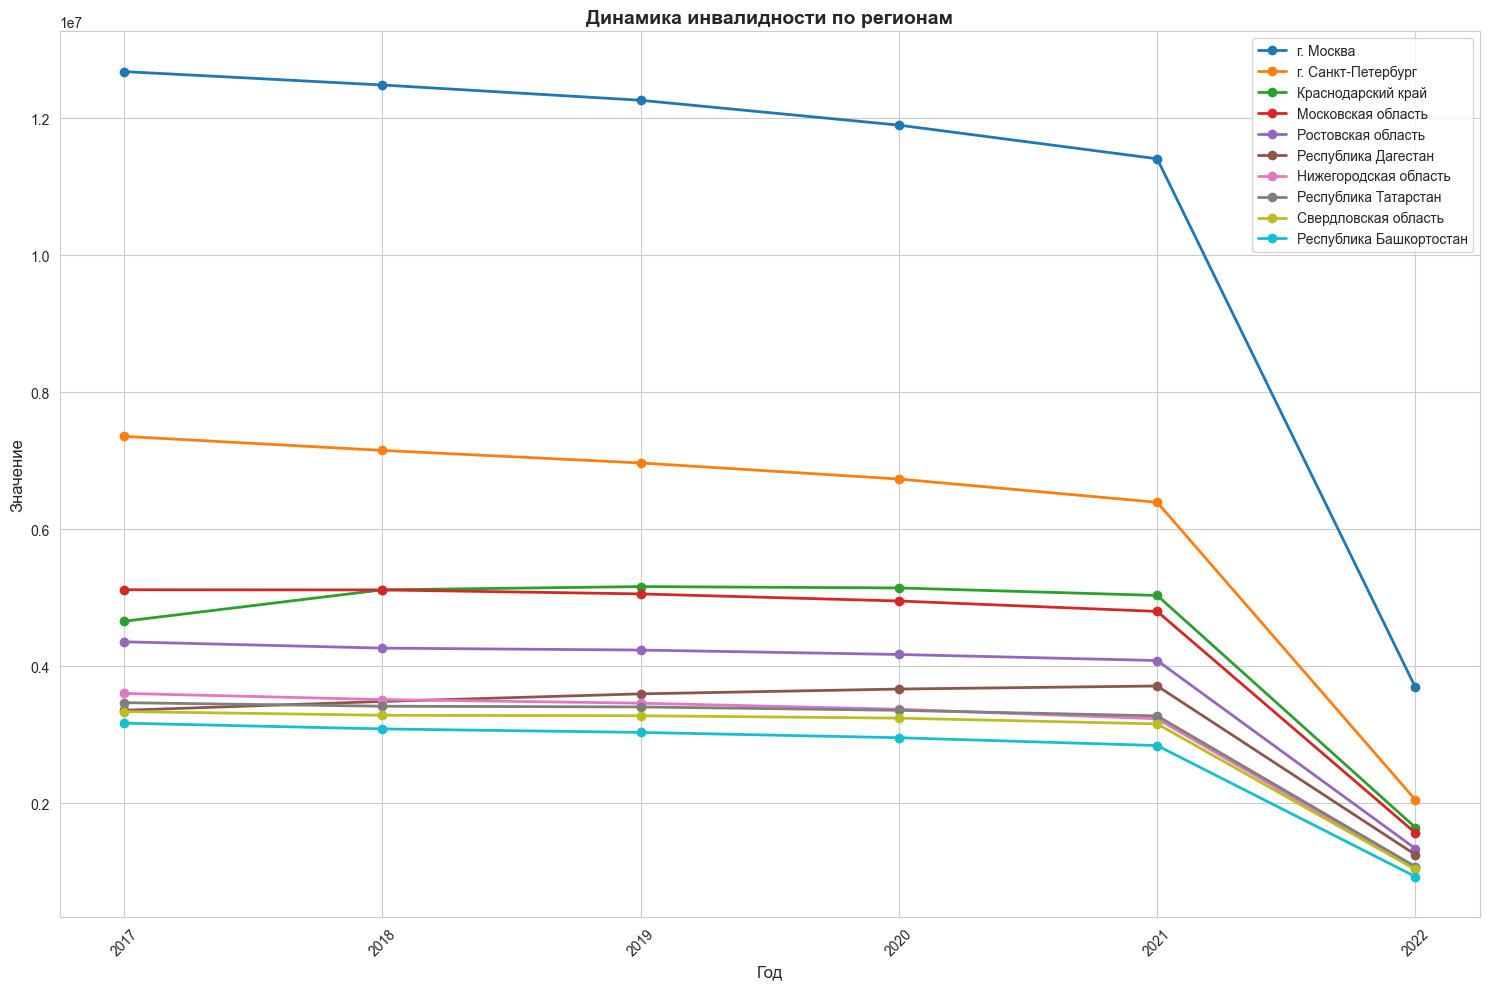

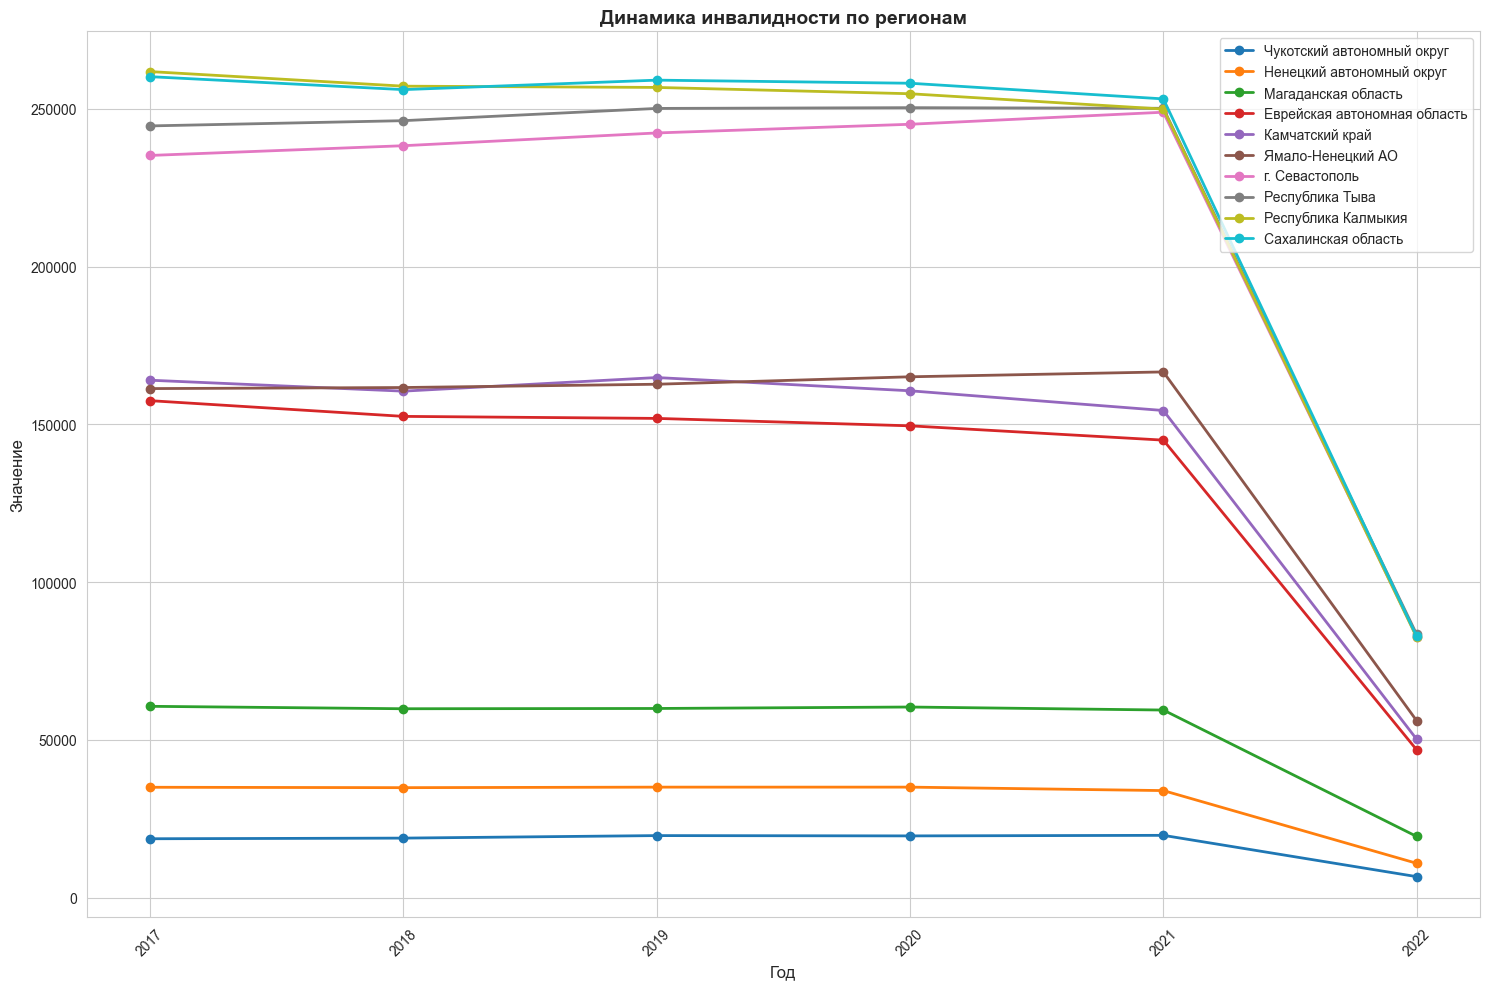

In [232]:
create_less_most_region_graph(disabled, 'инвалидности')

Смотря на данные графики сложно выявить благоприятные районы, становится лишь понятно, что в регионах с большим кол-вом насеселения людей с инвалидностью больше.

In [233]:
disabled = disabled.add_prefix('disabled_')

In [234]:
data = data.join(disabled.set_index('disabled_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  rural_mort_2018  rural_mort_2019  rural_mort_2020  \
0        1506976.0  ...             33.0             16.0             22.0   
1        1407965.0  ...             12.0             11.0             12.0   
2        1558052.0  ...             22.0             15.0             10.0   
3        2422371.0  ...             22.0              7.0             12.0   
4        1178969.0  ...              7.0              9.0              3.0   

   rural_mort_2021  disabled_2017  disabled_2018  disabled_2019  \
0             20.0      2625755.0      2522995.0      2446166.0   
1             13.0      1316321.0      1297907.0      1286661.0   
2             14.0      1575026.0      1527682.0      1499470.0   
3             10.0      2630229.0      2602719.0      2604460.0   
4              4.0       979394.0       953194.0       940218.0   

   disabled_2020  disabled_2021  disabled_2022  
0      2359129.0      2252362.0       723760.0  
1      1262073.0      1225446.0       397632.0  
2      1455865.0      1400165.0       451664.0  
3      2580949.0      2512905.0       819127.0  
4       918781.0       891701.0       289204.0  

[5 rows x 271 columns]

In [235]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [region, welfare_2015, welfare_2016, welfare_2017, welfare_2018, welfare_2019, welfare_2020, population_1999, population_2000, population_2001, population_2002, population_2003, population_2004, population_2005, population_2006, population_2007, population_2008, population_2009, population_2010, population_2011, population_2012, population_2013, population_2014, population_2015, population_2016, population_2017, population_2018, population_2019, population_2020, population_2021, population_2022, poverty_1995, poverty_1996, poverty_1997, poverty_1998, poverty_1999, poverty_2000, poverty_2001, poverty_2002, poverty_2003, poverty_2004, poverty_2005, poverty_2006, poverty_2007, poverty_2008, poverty_2009, poverty_2010, poverty_2011, poverty_2012, poverty_2013, poverty_2014, poverty_2015, poverty_2016, poverty_2017, poverty_2018, poverty_2019, poverty_2020, income_2015, income_2016, income_2017, income_2018, income_2019, income_2020, poverty_2017_children, poverty_2017_workers, poverty_2017_old, poverty_2018_children, poverty_2018_workers, poverty_2018_old, poverty_2019_children, poverty_2019_workers, poverty_2019_old, poverty_2020_children, poverty_2020_workers, poverty_2020_old, gross_1996, gross_1997, gross_1998, gross_1999, gross_2000, gross_2001, gross_2002, gross_2003, gross_2004, gross_2005, gross_2006, gross_2007, gross_2008, gross_2009, gross_2010, gross_2011, gross_2012, gross_2013, gross_2014, gross_2015, gross_2016, gross_2017, gross_2018, gross_2019, gross_2020, ...]
Index: []

[0 rows x 271 columns]

### Болезни

In [236]:
morbidity = pd.read_excel('../data/social_russia_data/morbidity_2005_2020_age_disease.xls')

morbidity.head()

Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)  \
0                                                NaN                                                                                                                       
1                                                NaN                                                                                                                       
2                               Российская Федерация                                                                                                                       
3                               Российская Федерация                                                                                                                       
4                               Российская Федерация                                                                                                                       

                                 Unnamed: 1       Unnamed: 2  Unnamed: 3  \
0                                       NaN              NaN         NaN   
1                                       NaN              NaN      2005.0   
2  Беременность, роды и послеродовой период         0-14 лет        21.3   
3  Беременность, роды и послеродовой период        15-17 лет      1537.3   
4  Беременность, роды и послеродовой период  18 лет и старше      6731.7   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1      2006.0      2007.0      2008.0      2009.0      2010.0      2011.0   
2        17.6        17.9        22.1        18.1        18.9        16.2   
3      1527.5      1605.2      1681.5      1618.9      1451.3      1247.6   
4      6833.5      7229.7      7516.9      8007.5      8084.4      7981.6   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  
0          NaN          NaN          NaN          NaN          NaN  
1       2012.0       2013.0       2014.0       2015.0       2016.0  
2         17.7         12.2         12.1          8.1         15.5  
3       1229.1       1272.3       1186.5        914.0        794.0  
4       8141.8       8084.6       8219.9       7734.1       7278.6

In [237]:
new_columns = morbidity.iloc[1].values
morbidity = morbidity.iloc[2:].set_axis(new_columns, axis=1)
morbidity.reset_index(drop=True, inplace=True)

In [238]:
columns = list(['region', 'disease', 'year', *[str(int(x)) for x in morbidity.columns[3:]]])

morbidity.columns = columns

In [239]:
morbidity = morbidity[morbidity['year'] == 'Всего']
morbidity.drop(['year'], axis=1, inplace=True)
morbidity.reset_index(drop=True, inplace=True)

In [240]:
morbidity.head(18)

region                                            disease  \
0   Российская Федерация           Беременность, роды и послеродовой период   
1   Российская Федерация          Болезни глаза и его придаточного аппарата   
2   Российская Федерация  Болезни костно-мышечной системы и соединительн...   
3   Российская Федерация                        Болезни мочеполовой системы   
4   Российская Федерация                            Болезни нервной системы   
5   Российская Федерация                            Болезни органов дыхания   
6   Российская Федерация                        Болезни органов пищеварения   
7   Российская Федерация                     Болезни системы кровообращения   
8   Российская Федерация                Болезни уха и сосцевидного отростка   
9   Российская Федерация  Болезни эндокринной системы, расстройства пита...   
10  Российская Федерация  Врожденные аномалии (пороки развития), деформа...   
11  Российская Федерация                                    Все заболевания   
12  Российская Федерация                    Злокачественные новообразования   
13  Российская Федерация      Некоторые инфекционные и паразитарные болезни   
14  Российская Федерация                                    Новообразования   
15  Российская Федерация                                     Прочие болезни   
16  Российская Федерация  Психические расстройства и расстройства поведения   
17  Российская Федерация  Травмы, отравления и другие последствия воздей...   

       2005     2006     2007     2008     2009     2010     2011     2012  \
0    5719.4   5861.2   6258.7   6556.6   7011.6   7085.3   6979.7   7121.5   
1    3365.9   3584.0   3501.6   3422.2   3366.7   3322.6   3330.1   3525.4   
2    3342.9   3536.8   3533.9   3531.6   3489.6   3374.5   3366.0   3328.1   
3    4621.1   4889.2   4883.1   4871.8   4816.8   4821.1   4934.8   4963.8   
4    1534.2   1626.8   1661.3   1704.2   1672.8   1652.6   1647.7   1628.4   
5   29525.3  29713.7  30227.6  30446.5  33928.7  32611.9  33903.7  33120.7   
6    3546.1   3525.9   3450.8   3458.9   3454.0   3366.9   3336.7   3482.5   
7    2308.9   2657.5   2617.2   2663.4   2650.6   2631.2   2662.4   2665.8   
8    2412.8   2457.7   2506.9   2483.8   2630.6   2724.9   2782.4   2818.8   
9     958.4   1173.8   1152.9   1147.3   1043.3   1029.8   1032.1   1062.1   
10    171.0    180.5    192.3    207.8    208.6    207.7    211.7    208.8   
11  74587.8  76387.1  77100.3  77199.7  80246.3  78517.5  79740.7  79471.1   
12      NaN      NaN      NaN      NaN      NaN      NaN    342.4      NaN   
13   3742.0   3738.8   3752.0   3653.8   3464.4   3304.5   3238.1   3209.8   
14    955.8    994.9   1011.0   1012.2   1074.5   1085.2   1110.2   1157.6   
15    713.8    798.9    809.0    836.9    816.7    692.4      NaN      NaN   
16    720.7    692.6    663.8    653.8    614.9    602.5    566.8    539.5   
17   9021.9   8954.6   9198.3   9172.5   9058.3   9228.3   9282.4   9384.8   

       2013     2014     2015     2016  
0    7067.6   7145.3   6700.2   6291.1  
1    3504.4   3464.2   3332.0   3266.4  
2    3232.5   3177.1   2850.5   2808.0  
3    4985.9   4897.9   4639.8   4564.5  
4    1649.5   1620.2   1541.3   1522.5  
5   33881.6  33300.6  33785.5  35192.4  
6    3526.6   3652.4   3526.6   3568.0  
7    2989.1   2874.9   3116.7   3172.1  
8    2800.0   2768.8   2659.1   2636.3  
9    1065.0   1118.4   1333.8   1390.4  
10    208.1    209.9    202.7    206.0  
11  80030.3      NaN  77815.7  78602.1  
12      NaN      NaN      NaN      NaN  
13   3093.3   3079.4   2811.6   2788.5  
14   1136.3   1157.5   1141.8   1138.3  
15    632.2   5456.2      NaN      NaN  
16    521.2    501.7    484.9    442.9  
17   9267.9   9012.8   8467.3   8279.2

In [241]:
morbidity['region'] = morbidity['region'].str.lstrip()

In [242]:
morbidity.iloc[morbidity[morbidity['region'] == 'Архангельская обл. без данных по Ненецкому авт. окр.'].index, 0] = 'Архангельская область'
morbidity.iloc[morbidity[morbidity['region'] == 'Республика Адыгея (Адыгея)'].index, 0] = 'Республика Адыгея'
morbidity.iloc[morbidity[morbidity['region'] == 'Республика Адыгея (Адыгея) (до 03.06.2014)'].index, 0] = 'Республика Адыгея'
morbidity.iloc[morbidity[morbidity['region'] == 'Республика Татарстан (Татарстан)'].index, 0] = 'Республика Татарстан'
morbidity.iloc[morbidity[morbidity['region'] == 'Чувашская Республика - Чувашия'].index, 0] = 'Чувашская Республика'
morbidity.iloc[morbidity[morbidity['region'] == 'Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр.'].index, 0] = 'Тюменская область'
morbidity.iloc[morbidity[morbidity['region'] == 'Ненецкий автономный округ (Архангельская область)'].index, 0] = 'Ненецкий автономный округ'
morbidity.iloc[morbidity[morbidity['region'] == 'Ханты-Мансийский автономный округ - Югра (Тюменская область)'].index, 0] = 'Ханты-Мансийский АО'
morbidity.iloc[morbidity[morbidity['region'] == 'Ямало-Ненецкий автономный округ (Тюменская область)'].index, 0] = 'Ямало-Hенецкий АО'
morbidity.iloc[morbidity[morbidity['region'] == 'г. Москва '].index, 0] = 'г. Москва'
morbidity.iloc[morbidity[morbidity['region'] == 'Республика Северная Осетия - Алания'].index, 0] = 'Республика Северная Осетия-Алания'

In [243]:
birth = morbidity.copy()[morbidity['disease'] == 'Беременность, роды и послеродовой период'] 
birth.reset_index(drop=True, inplace=True)

birth.head()

region                                   disease  \
0           Российская Федерация  Беременность, роды и послеродовой период   
1  Центральный федеральный округ  Беременность, роды и послеродовой период   
2           Белгородская область  Беременность, роды и послеродовой период   
3               Брянская область  Беременность, роды и послеродовой период   
4           Владимирская область  Беременность, роды и послеродовой период   

     2005    2006    2007    2008    2009    2010    2011    2012    2013  \
0  5719.4  5861.2  6258.7  6556.6  7011.6  7085.3  6979.7  7121.5  7067.6   
1  4289.8  4618.8  4781.4  5029.8  5623.1  5841.0  5579.2  5677.3  5529.5   
2  4452.8  5196.3  4236.4  4392.9  5165.4  4684.9  4585.2  4839.8  4730.8   
3  5692.7  5074.7  5386.1  5942.4  6390.2  5731.4  6225.2  6315.0  6220.6   
4  3653.0  4053.0  4534.7  4723.5  5677.9  5657.3  5285.4  5617.3  5425.4   

     2014    2015    2016  
0  7145.3  6700.2  6291.1  
1  5640.9  5453.6  5213.5  
2  5215.7  4879.2  4868.6  
3  6493.0  5784.8  4981.6  
4  6490.7  6997.3  5798.3

In [244]:
eye_disease = morbidity.copy()[morbidity['disease'] == 'Болезни глаза и его придаточного аппарата'] 
eye_disease.reset_index(drop=True, inplace=True)

eye_disease.head()

region                                    disease  \
0           Российская Федерация  Болезни глаза и его придаточного аппарата   
1  Центральный федеральный округ  Болезни глаза и его придаточного аппарата   
2           Белгородская область  Болезни глаза и его придаточного аппарата   
3               Брянская область  Болезни глаза и его придаточного аппарата   
4           Владимирская область  Болезни глаза и его придаточного аппарата   

     2005    2006    2007    2008    2009    2010    2011    2012    2013  \
0  3365.9  3584.0  3501.6  3422.2  3366.7  3322.6  3330.1  3525.4  3504.4   
1  3031.2  3118.7  3096.5  3023.4  3019.1  2982.0  2953.5  3199.7  3144.7   
2  5249.2  5264.4  5447.3  4638.6  4103.2  4653.0  4701.9  5138.5  4748.5   
3  3619.4  3736.7  4214.7  4103.6  3638.7  3381.7  3489.5  3743.2  3765.7   
4  4093.5  4035.1  4475.3  4441.8  4728.5  4305.1  4200.7  4785.9  4172.5   

     2014    2015    2016  
0  3464.2  3332.0  3266.4  
1  3152.0  3026.9  2930.4  
2  4046.3  3617.4  3665.9  
3  3648.3  3415.6  3304.2  
4  4498.2  4156.9  3521.4

In [245]:
urinary = morbidity.copy()[morbidity['disease'] == 'Болезни мочеполовой системы'] 
urinary.reset_index(drop=True, inplace=True)

urinary.head()

region                      disease    2005    2006  \
0           Российская Федерация  Болезни мочеполовой системы  4621.1  4889.2   
1  Центральный федеральный округ  Болезни мочеполовой системы  4145.6  4387.0   
2           Белгородская область  Болезни мочеполовой системы  5711.7  6236.3   
3               Брянская область  Болезни мочеполовой системы  3656.8  4013.7   
4           Владимирская область  Болезни мочеполовой системы  5906.5  6672.7   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  4883.1  4871.8  4816.8  4821.1  4934.8  4963.8  4985.9  4897.9  4639.8   
1  4340.3  4308.0  4228.4  4182.9  4232.8  4192.8  4071.8  3902.9  3617.7   
2  6280.5  5864.0  5562.1  5586.1  6071.2  6149.8  6209.7  5854.9  6329.1   
3  4231.1  4593.4  4880.2  4819.4  4831.2  4643.6  4546.1  4051.7  3715.7   
4  6831.4  6558.3  6417.6  5833.5  5788.4  5541.2  5090.4  4656.5  4641.5   

     2016  
0  4564.5  
1  3484.8  
2  6493.8  
3  3358.6  
4  4846.2

In [246]:
bones = morbidity.copy()[morbidity['disease'] == 'Болезни костно-мышечной системы и соединительной ткани'] 
bones.reset_index(drop=True, inplace=True)

bones.head()

region  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Владимирская область   

                                             disease    2005    2006    2007  \
0  Болезни костно-мышечной системы и соединительн...  3342.9  3536.8  3533.9   
1  Болезни костно-мышечной системы и соединительн...  3262.6  3420.4  3433.2   
2  Болезни костно-мышечной системы и соединительн...  4935.5  5156.4  5037.5   
3  Болезни костно-мышечной системы и соединительн...  4066.8  4054.4  4323.3   
4  Болезни костно-мышечной системы и соединительн...  4511.4  4787.5  4997.2   

     2008    2009    2010    2011    2012    2013    2014    2015    2016  
0  3531.6  3489.6  3374.5  3366.0  3328.1  3232.5  3177.1  2850.5  2808.0  
1  3416.7  3353.5  3206.7  3127.6  3054.9  2896.5  2818.3  2323.8  2237.8  
2  4736.8  4669.8  4605.1  4790.3  4894.3  4525.0  3906.3  3504.9  3431.3  
3  4049.0  3861.3  3615.9  3664.8  3574.2  3057.4  2705.1  2456.2  2406.2  
4  4744.0  4300.4  3751.6  3458.4  3133.2  2619.0  2367.9  2192.6  1992.5

In [247]:
nerves = morbidity.copy()[morbidity['disease'] == 'Болезни нервной системы'] 
nerves.reset_index(drop=True, inplace=True)

nerves.head()

region                  disease    2005    2006  \
0           Российская Федерация  Болезни нервной системы  1534.2  1626.8   
1  Центральный федеральный округ  Болезни нервной системы  1296.5  1326.4   
2           Белгородская область  Болезни нервной системы  2825.2  2953.3   
3               Брянская область  Болезни нервной системы  1804.9  1985.9   
4           Владимирская область  Болезни нервной системы  1680.2  1754.0   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  1661.3  1704.2  1672.8  1652.6  1647.7  1628.4  1649.5  1620.2  1541.3   
1  1311.3  1339.6  1349.1  1320.0  1280.0  1261.7  1242.9  1211.6  1145.2   
2  2481.7  2207.1  2327.6  2280.5  2387.6  2388.4  2402.7  2031.4  1914.9   
3  2236.3  2403.1  2561.0  2388.4  2137.9  2257.3  2090.3  1830.7  1529.8   
4  1977.7  1800.3  1728.5  1287.0  1235.1  1225.2  1233.1  1188.0  1215.9   

     2016  
0  1522.5  
1  1130.9  
2  1929.8  
3  1321.8  
4  1328.3

In [248]:
lungs = morbidity.copy()[morbidity['disease'] == 'Болезни органов дыхания'] 
lungs.reset_index(drop=True, inplace=True)

lungs.head()

region                  disease     2005     2006  \
0           Российская Федерация  Болезни органов дыхания  29525.3  29713.7   
1  Центральный федеральный округ  Болезни органов дыхания  31221.9  31425.3   
2           Белгородская область  Болезни органов дыхания  25502.6  24472.2   
3               Брянская область  Болезни органов дыхания  29645.3  28766.2   
4           Владимирская область  Болезни органов дыхания  39395.9  39581.6   

      2007     2008     2009     2010     2011     2012     2013     2014  \
0  30227.6  30446.5  33928.7  32611.9  33903.7  33120.7  33881.6  33300.6   
1  31612.8  32113.8  35193.0  33735.6  33533.6  32843.2  32783.9  32438.1   
2  26048.2  24385.4  27270.4  25661.8  25872.4  25370.1  25679.6  25182.8   
3  28865.4  31000.8  32932.0  31087.7  32944.9  31770.6  32602.6  32686.3   
4  36803.7  40783.3  46734.2  41895.5  43348.4  42213.8  42366.2  42576.9   

      2015     2016  
0  33785.5  35192.4  
1  32185.2  33596.1  
2  25735.5  27195.7  
3  32046.2  33294.4  
4  44199.0  46461.1

In [249]:
stomach = morbidity.copy()[morbidity['disease'] == 'Болезни органов пищеварения'] 
stomach.reset_index(drop=True, inplace=True)

stomach.head()

region                      disease    2005    2006  \
0           Российская Федерация  Болезни органов пищеварения  3546.1  3525.9   
1  Центральный федеральный округ  Болезни органов пищеварения  2564.1  2578.9   
2           Белгородская область  Болезни органов пищеварения  2982.2  3070.4   
3               Брянская область  Болезни органов пищеварения  3741.7  4331.6   
4           Владимирская область  Болезни органов пищеварения  3059.3  3239.6   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  3450.8  3458.9  3454.0  3366.9  3336.7  3482.5  3526.6  3652.4  3526.6   
1  2519.5  2524.8  2581.9  2532.1  2415.5  2506.9  2525.2  2738.5  2395.1   
2  3222.2  3096.8  3463.7  3360.4  3035.7  2826.8  2708.1  2511.7  2340.3   
3  4936.5  4720.1  5210.5  5419.0  6465.7  6439.2  6795.4  7071.6  6464.8   
4  3845.0  3799.2  3942.0  3918.2  3167.6  4638.1  4341.2  3297.4  4467.3   

     2016  
0  3568.0  
1  2398.1  
2  2515.5  
3  5725.7  
4  4020.6

In [250]:
blood = morbidity.copy()[morbidity['disease'] == 'Болезни системы кровообращения'] 
blood.reset_index(drop=True, inplace=True)

blood.head()

region                         disease    2005  \
0           Российская Федерация  Болезни системы кровообращения  2308.9   
1  Центральный федеральный округ  Болезни системы кровообращения  2128.2   
2           Белгородская область  Болезни системы кровообращения  4556.9   
3               Брянская область  Болезни системы кровообращения  2490.7   
4           Владимирская область  Болезни системы кровообращения  1966.3   

     2006    2007    2008    2009    2010    2011    2012    2013    2014  \
0  2657.5  2617.2  2663.4  2650.6  2631.2  2662.4  2665.8  2989.1  2874.9   
1  2332.6  2304.7  2327.0  2403.9  2415.7  2337.0  2334.6  2404.6  2368.7   
2  5133.9  4649.4  4175.5  4351.0  4261.2  4517.6  4651.5  4910.4  4179.1   
3  3133.3  3605.8  3524.8  3245.0  3322.2  3378.7  3168.7  3424.8  3027.2   
4  2461.8  2530.4  2382.6  2462.0  2584.3  2181.6  2035.3  2856.0  2710.3   

     2015    2016  
0  3116.7  3172.1  
1  2588.6  2509.5  
2  3753.6  3995.8  
3  3091.6  3201.2  
4  2225.3  2715.0

In [251]:
ears = morbidity.copy()[morbidity['disease'] == 'Болезни уха и сосцевидного отростка'] 
ears.reset_index(drop=True, inplace=True)

ears.head()

region                              disease    2005  \
0           Российская Федерация  Болезни уха и сосцевидного отростка  2412.8   
1  Центральный федеральный округ  Болезни уха и сосцевидного отростка  2261.6   
2           Белгородская область  Болезни уха и сосцевидного отростка  2796.7   
3               Брянская область  Болезни уха и сосцевидного отростка  2547.1   
4           Владимирская область  Болезни уха и сосцевидного отростка  3152.4   

     2006    2007    2008    2009    2010    2011    2012    2013    2014  \
0  2457.7  2506.9  2483.8  2630.6  2724.9  2782.4  2818.8  2800.0  2768.8   
1  2325.5  2372.4  2344.0  2557.7  2675.9  2652.7  2669.1  2623.9  2580.1   
2  2573.1  2923.1  2595.1  2761.2  2942.4  3144.9  3426.3  3392.1  3226.7   
3  2549.1  2727.0  3029.4  3374.4  3144.6  3286.0  3318.0  3341.8  3227.7   
4  3182.4  3344.6  3532.6  3932.4  3798.4  4120.3  3893.1  3573.9  3369.6   

     2015    2016  
0  2659.1  2636.3  
1  2484.8  2442.1  
2  2992.7  3004.7  
3  3076.9  2973.5  
4  3247.9  3171.0

In [252]:
endocrine = morbidity.copy()[morbidity['disease'] == 'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ'] 
endocrine.reset_index(drop=True, inplace=True)

endocrine.head()

region  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Владимирская область   

                                             disease    2005    2006    2007  \
0  Болезни эндокринной системы, расстройства пита...   958.4  1173.8  1152.9   
1  Болезни эндокринной системы, расстройства пита...   811.3   965.0   942.9   
2  Болезни эндокринной системы, расстройства пита...   876.2  1187.9  1068.1   
3  Болезни эндокринной системы, расстройства пита...  1630.9  2088.8  1800.8   
4  Болезни эндокринной системы, расстройства пита...   973.7  1203.5  1268.0   

     2008    2009    2010    2011    2012    2013    2014    2015    2016  
0  1147.3  1043.3  1029.8  1032.1  1062.1  1065.0  1118.4  1333.8  1390.4  
1   965.0   909.3   871.5   840.3   866.5   857.2   876.4  1045.7  1057.5  
2   961.2   881.2   874.8   833.0   941.9   911.4   817.0   777.5   813.6  
3  1721.4  1626.4  1511.8  1366.5  1552.7  1662.6  1590.4  1763.6  1641.5  
4  1469.9  1325.4  1227.6  1169.6  1198.4  1117.9  1168.6  1620.8  1265.2

In [253]:
anomaly = morbidity.copy()[morbidity['disease'] == 'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения'] 
anomaly.reset_index(drop=True, inplace=True)

anomaly.head()

region  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Владимирская область   

                                             disease   2005   2006   2007  \
0  Врожденные аномалии (пороки развития), деформа...  171.0  180.5  192.3   
1  Врожденные аномалии (пороки развития), деформа...  127.1  134.1  144.5   
2  Врожденные аномалии (пороки развития), деформа...  102.7  101.8  105.2   
3  Врожденные аномалии (пороки развития), деформа...   98.6  113.8  123.5   
4  Врожденные аномалии (пороки развития), деформа...  141.6  144.3  242.6   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  207.8  208.6  207.7  211.7  208.8  208.1  209.9  202.7  206.0  
1  150.1  156.8  154.6  154.0  150.7  144.5  144.2  140.9  149.8  
2  114.2  120.1  126.7  108.7  100.6  110.3  104.2  140.4  136.2  
3  100.4  111.7  126.4  147.0  155.3  162.2  169.4  180.9  192.1  
4  255.6  207.9  159.3  189.2  129.3  152.8  251.8  173.2  210.4

In [254]:
neoplasm = morbidity.copy()[morbidity['disease'] == 'Злокачественные новообразования'] 
neoplasm.reset_index(drop=True, inplace=True)

neoplasm.head()

region                          disease  2005  2006  \
0           Российская Федерация  Злокачественные новообразования   NaN   NaN   
1  Центральный федеральный округ  Злокачественные новообразования   NaN   NaN   
2           Белгородская область  Злокачественные новообразования   NaN   NaN   
3               Брянская область  Злокачественные новообразования   NaN   NaN   
4           Владимирская область  Злокачественные новообразования   NaN   NaN   

   2007  2008  2009  2010   2011  2012  2013  2014  2015  2016  
0   NaN   NaN   NaN   NaN  342.4   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  363.0   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  384.3   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  451.1   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  370.8   NaN   NaN   NaN   NaN   NaN

In [255]:
growths = morbidity.copy()[morbidity['disease'] == 'Новообразования'] 
growths.reset_index(drop=True, inplace=True)

growths.head()

region          disease    2005    2006    2007  \
0           Российская Федерация  Новообразования   955.8   994.9  1011.0   
1  Центральный федеральный округ  Новообразования   945.4   983.2  1000.5   
2           Белгородская область  Новообразования  1347.5  1457.6  1674.5   
3               Брянская область  Новообразования  1043.9  1273.3  1322.8   
4           Владимирская область  Новообразования  1169.7  1201.6  1274.4   

     2008    2009    2010    2011    2012    2013    2014    2015    2016  
0  1012.2  1074.5  1085.2  1110.2  1157.6  1136.3  1157.5  1141.8  1138.3  
1   998.2  1046.3  1056.6  1065.2  1173.6  1033.9  1047.9  1021.3  1045.5  
2  1450.8  1336.0  1311.1  1249.5  1423.0  1225.5  1231.3  1031.2  1204.0  
3  1323.7  1335.9  1285.2  1309.4  1119.1  1204.1  1165.2  1147.0  1134.5  
4  1184.1  1158.2  1111.9  1197.9  1140.4  1066.9  1123.5  1217.2  1107.7

In [256]:
others = morbidity.copy()[morbidity['disease'] == 'Прочие болезни'] 
others.reset_index(drop=True, inplace=True)

others.head()

region         disease   2005   2006   2007   2008  \
0           Российская Федерация  Прочие болезни  713.8  798.9  809.0  836.9   
1  Центральный федеральный округ  Прочие болезни  465.9  471.0  489.9  497.0   
2           Белгородская область  Прочие болезни  526.8  596.3  496.2  443.7   
3               Брянская область  Прочие болезни  918.2  856.4  932.9  953.9   
4           Владимирская область  Прочие болезни  510.4  223.6  419.7  415.3   

    2009   2010  2011  2012   2013    2014  2015  2016  
0  816.7  692.4   NaN   NaN  632.2  5456.2   NaN   NaN  
1  493.2  452.9   NaN   NaN  384.1  4758.5   NaN   NaN  
2  451.3  400.2   NaN   NaN  401.1  4814.6   NaN   NaN  
3  900.4  895.1   NaN   NaN  885.9  5525.7   NaN   NaN  
4  448.9  379.8   NaN   NaN  215.7  7446.5   NaN   NaN

In [257]:
psychic = morbidity.copy()[morbidity['disease'] == 'Психические расстройства и расстройства поведения'] 
psychic.reset_index(drop=True, inplace=True)

psychic.head()

region  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Владимирская область   

                                             disease   2005   2006   2007  \
0  Психические расстройства и расстройства поведения  720.7  692.6  663.8   
1  Психические расстройства и расстройства поведения  672.5  637.6  646.8   
2  Психические расстройства и расстройства поведения  653.8  656.0  726.1   
3  Психические расстройства и расстройства поведения  553.6  571.4  606.9   
4  Психические расстройства и расстройства поведения  667.4  636.2  618.8   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  653.8  614.9  602.5  566.8  539.5  521.2  501.7  484.9  442.9  
1  633.7  609.9  580.7  538.3  519.6  502.6  472.4  446.9  402.2  
2  645.4  576.9  540.2  464.8  470.4  433.6  403.2  404.4  388.2  
3  542.0  566.5  530.4  483.2  521.4  532.1  509.4  492.5  411.3  
4  608.3  658.5  659.6  639.6  583.7  584.9  583.0  582.9  572.7

In [258]:
injuries = morbidity.copy()[morbidity['disease'] == 'Травмы, отравления и другие последствия воздействия внешних причин'] 
injuries.reset_index(drop=True, inplace=True)

injuries.head()

region  \
0           Российская Федерация   
1  Центральный федеральный округ   
2           Белгородская область   
3               Брянская область   
4           Владимирская область   

                                             disease    2005    2006    2007  \
0  Травмы, отравления и другие последствия воздей...  9021.9  8954.6  9198.3   
1  Травмы, отравления и другие последствия воздей...  8171.9  8048.9  8333.6   
2  Травмы, отравления и другие последствия воздей...  8923.7  8089.1  8581.3   
3  Травмы, отравления и другие последствия воздей...  8217.2  8351.0  8359.2   
4  Травмы, отравления и другие последствия воздей...  8826.1  8436.5  8722.9   

     2008    2009     2010     2011     2012     2013     2014    2015    2016  
0  9172.5  9058.3   9228.3   9282.4   9384.8   9267.9   9012.8  8467.3  8279.2  
1  8399.8  8436.5   8655.1   8591.6   8776.5   8682.6   8567.6  7691.7  7698.1  
2  8721.3  8679.4   8843.7   8612.2   8891.5   8854.5   9083.1  8540.9  8782.1  
3  8497.8  8460.5   9094.3  10050.2  11030.2  10838.0  10691.7  9644.4  9717.7  
4  9046.3  9795.6  10103.2   9280.2  10043.1   9463.2   9549.6  9579.1  9918.2

In [259]:
birth.drop(['disease'], axis=1, inplace=True)
stomach.drop(['disease'], axis=1, inplace=True)
injuries.drop(['disease'], axis=1, inplace=True)
psychic.drop(['disease'], axis=1, inplace=True)
others.drop(['disease'], axis=1, inplace=True)
lungs.drop(['disease'], axis=1, inplace=True)
blood.drop(['disease'], axis=1, inplace=True)
growths.drop(['disease'], axis=1, inplace=True)
neoplasm.drop(['disease'], axis=1, inplace=True)
ears.drop(['disease'], axis=1, inplace=True)
eye_disease.drop(['disease'], axis=1, inplace=True)
endocrine.drop(['disease'], axis=1, inplace=True)
anomaly.drop(['disease'], axis=1, inplace=True)
bones.drop(['disease'], axis=1, inplace=True)
urinary.drop(['disease'], axis=1, inplace=True)
nerves.drop(['disease'], axis=1, inplace=True)


In [260]:
birth.head()

region    2005    2006    2007    2008    2009  \
0           Российская Федерация  5719.4  5861.2  6258.7  6556.6  7011.6   
1  Центральный федеральный округ  4289.8  4618.8  4781.4  5029.8  5623.1   
2           Белгородская область  4452.8  5196.3  4236.4  4392.9  5165.4   
3               Брянская область  5692.7  5074.7  5386.1  5942.4  6390.2   
4           Владимирская область  3653.0  4053.0  4534.7  4723.5  5677.9   

     2010    2011    2012    2013    2014    2015    2016  
0  7085.3  6979.7  7121.5  7067.6  7145.3  6700.2  6291.1  
1  5841.0  5579.2  5677.3  5529.5  5640.9  5453.6  5213.5  
2  4684.9  4585.2  4839.8  4730.8  5215.7  4879.2  4868.6  
3  5731.4  6225.2  6315.0  6220.6  6493.0  5784.8  4981.6  
4  5657.3  5285.4  5617.3  5425.4  6490.7  6997.3  5798.3

In [261]:
birth = birth.groupby('region', as_index=False).first()
stomach = stomach.groupby('region', as_index=False).first()
injuries = injuries.groupby('region', as_index=False).first()
psychic = psychic.groupby('region', as_index=False).first()
others = others.groupby('region', as_index=False).first()
lungs = lungs.groupby('region', as_index=False).first()
blood = blood.groupby('region', as_index=False).first()
growths = growths.groupby('region', as_index=False).first()
neoplasm = neoplasm.groupby('region', as_index=False).first()
ears = ears.groupby('region', as_index=False).first()
eye_disease = eye_disease.groupby('region', as_index=False).first()
endocrine = endocrine.groupby('region', as_index=False).first()
anomaly = anomaly.groupby('region', as_index=False).first()
bones = bones.groupby('region', as_index=False).first()
urinary = urinary.groupby('region', as_index=False).first()
nerves = nerves.groupby('region', as_index=False).first()

In [262]:
neoplasm[neoplasm.isna().any(axis=1)]

region  2005  2006  2007  2008  2009  \
0                             Алтайский край   NaN   NaN   NaN   NaN   NaN   
1                           Амурская область   NaN   NaN   NaN   NaN   NaN   
2                      Архангельская область   NaN   NaN   NaN   NaN   NaN   
3                       Астраханская область   NaN   NaN   NaN   NaN   NaN   
4                       Белгородская область   NaN   NaN   NaN   NaN   NaN   
..                                       ...   ...   ...   ...   ...   ...   
87  Южный федеральный округ  (до 03.06.2014)   NaN   NaN   NaN   NaN   NaN   
88                         Ямало-Hенецкий АО   NaN   NaN   NaN   NaN   NaN   
89                       Ярославская область   NaN   NaN   NaN   NaN   NaN   
90                                 г. Москва   NaN   NaN   NaN   NaN   NaN   
91                        г. Санкт-Петербург   NaN   NaN   NaN   NaN   NaN   

    2010   2011  2012  2013  2014  2015  2016  
0    NaN  420.5   NaN   NaN   NaN   NaN   NaN  
1    NaN  324.9   NaN   NaN   NaN   NaN   NaN  
2    NaN  347.4   NaN   NaN   NaN   NaN   NaN  
3    NaN  328.4   NaN   NaN   NaN   NaN   NaN  
4    NaN  384.3   NaN   NaN   NaN   NaN   NaN  
..   ...    ...   ...   ...   ...   ...   ...  
87   NaN  368.5   NaN   NaN   NaN   NaN   NaN  
88   NaN  214.9   NaN   NaN   NaN   NaN   NaN  
89   NaN  412.6   NaN   NaN   NaN   NaN   NaN  
90   NaN  261.6   NaN   NaN   NaN   NaN   NaN  
91   NaN  314.5   NaN   NaN   NaN   NaN   NaN  

[92 rows x 13 columns]

In [263]:
thresh = neoplasm.shape[0]*0.7

neoplasm = neoplasm.dropna(thresh=thresh, axis=1)

In [264]:
neoplasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  92 non-null     object 
 1   2011    92 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [265]:
others[others.isna().any(axis=1)]

region    2005    2006    2007    2008    2009    2010  \
0          Алтайский край  1071.4   888.6  1066.9  1057.4  1078.8   924.2   
1        Амурская область   702.7   691.3   745.8   648.4   637.9   602.1   
2   Архангельская область  1481.3  1645.7  1743.4  2049.3  2162.2  1842.2   
3    Астраханская область   693.9   774.0   642.7   461.8   446.8   326.9   
4    Белгородская область   526.8   596.3   496.2   443.7   451.3   400.2   
..                    ...     ...     ...     ...     ...     ...     ...   
92      Ямало-Hенецкий АО  1164.1  1385.5  1104.4  1045.5   954.7   758.8   
93    Ярославская область   529.6   474.3   380.3   387.6   404.5   248.3   
94              г. Москва   172.9   156.1   164.5   164.8   197.1   218.1   
95     г. Санкт-Петербург   827.6   933.8  1141.8  1128.3  1042.4  1136.3   
96         г. Севастополь     NaN     NaN     NaN     NaN     NaN     NaN   

    2011  2012    2013    2014  2015  2016  
0    NaN   NaN   769.9  7267.9   NaN   NaN  
1    NaN   NaN   641.1  5641.8   NaN   NaN  
2    NaN   NaN   368.1  5404.0   NaN   NaN  
3    NaN   NaN   412.1  3285.0   NaN   NaN  
4    NaN   NaN   401.1  4814.6   NaN   NaN  
..   ...   ...     ...     ...   ...   ...  
92   NaN   NaN   722.7  5953.1   NaN   NaN  
93   NaN   NaN    88.4  4588.3   NaN   NaN  
94   NaN   NaN   161.7  4273.2   NaN   NaN  
95   NaN   NaN  1016.5  6578.4   NaN   NaN  
96   NaN   NaN     NaN  4612.1   NaN   NaN  

[97 rows x 13 columns]

In [266]:
thresh = others.shape[0]*0.7

others = others.dropna(thresh=thresh, axis=1)

In [267]:
others[others.isna().any(axis=1)]

region   2005   2006   2007  \
25                         Крымский федеральный округ    NaN    NaN    NaN   
54                                    Республика Крым    NaN    NaN    NaN   
70  Северо-Кавказский федеральный округ (до 03.06....  449.7  692.6  678.7   
71  Северо-Кавказский федеральный округ (с 03.06.2...    NaN    NaN    NaN   
90           Южный федеральный округ  (до 03.06.2014)  575.5  667.7  644.4   
91            Южный федеральный округ  (с 03.06.2014)    NaN    NaN    NaN   
96                                     г. Севастополь    NaN    NaN    NaN   

     2008   2009   2010   2013    2014  
25    NaN    NaN    NaN    NaN  4927.5  
54    NaN    NaN    NaN    NaN  4993.9  
70  840.9  872.8  266.4  661.3     NaN  
71    NaN    NaN    NaN    NaN  6513.9  
90  618.7  558.2  484.7  500.6     NaN  
91    NaN    NaN    NaN    NaN  4278.2  
96    NaN    NaN    NaN    NaN  4612.1

In [268]:
birth.iloc[:,1:] = birth.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
stomach.iloc[:,1:] = stomach.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
injuries.iloc[:,1:] = injuries.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
psychic.iloc[:,1:] = psychic.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
lungs.iloc[:,1:] = lungs.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
blood.iloc[:,1:] = blood.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
growths.iloc[:,1:] = growths.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
ears.iloc[:,1:] = ears.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
eye_disease.iloc[:,1:] = eye_disease.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
endocrine.iloc[:,1:] = endocrine.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
anomaly.iloc[:,1:] = anomaly.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
bones.iloc[:,1:] = bones.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
urinary.iloc[:,1:] = urinary.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
nerves.iloc[:,1:] = nerves.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)
others.iloc[:,1:] = others.iloc[:,1:].apply(lambda row: row.fillna(round(row.median(), 2)), axis=1)

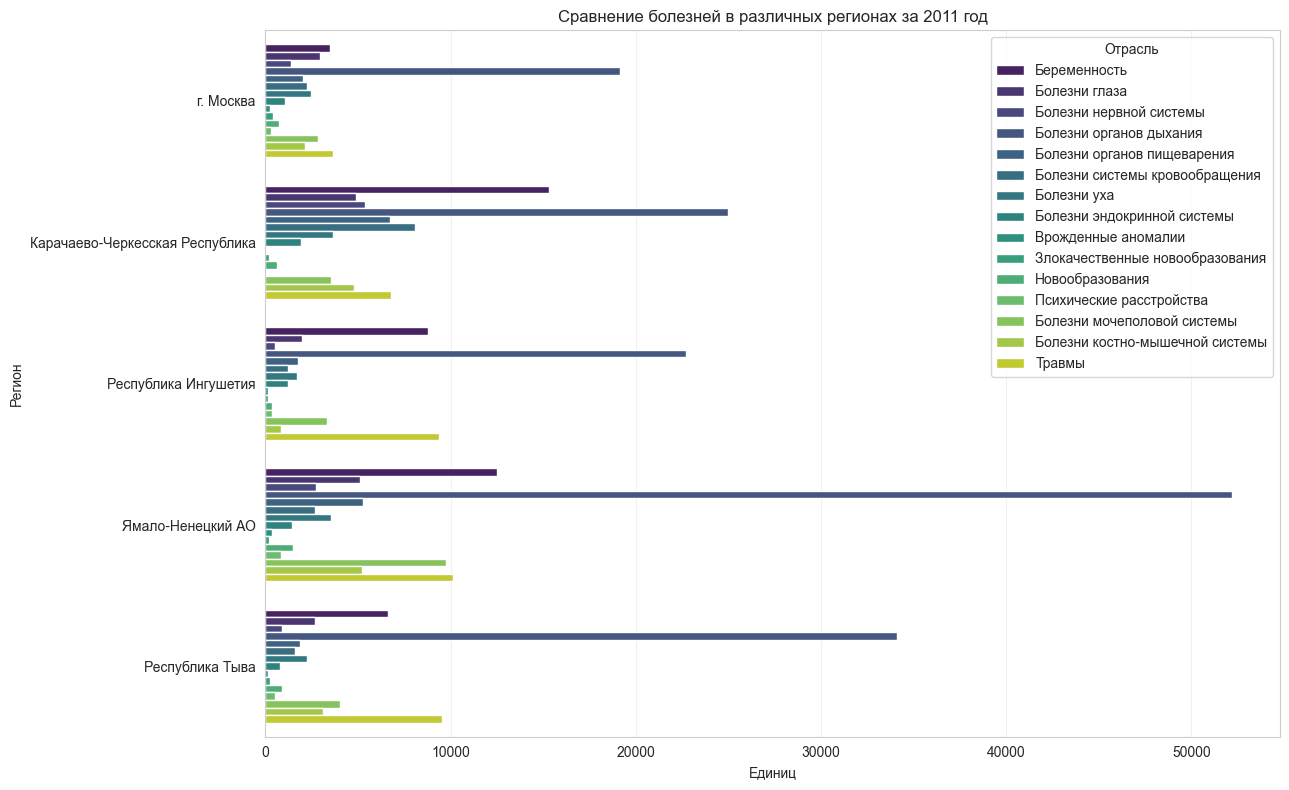

In [269]:
df_regions= ['г. Москва', 'Карачаево-Черкесская Республика', 'Республика Ингушетия', 'Ямало-Hенецкий АО', 'Республика Тыва']

def get_values(df):
    new_df = df[(df['region'].isin(df_regions))].loc[:,'2011']
    return new_df.values
    
# Создаем общий датафрейм
common = {
    'index': df_regions*15,
    'value': [*get_values(birth), *get_values(eye_disease), *get_values(nerves), *get_values(lungs), *get_values(stomach), *get_values(blood), *get_values(ears), *get_values(endocrine), *get_values(anomaly), *get_values(neoplasm), *get_values(growths), *get_values(psychic), *get_values(urinary), *get_values(bones), *get_values(injuries)],
    'table': ['Беременность']*5 + ['Болезни глаза']*5 + ['Болезни нервной системы']*5 + ['Болезни органов дыхания']*5 + ['Болезни органов пищеварения']*5 + ['Болезни системы кровообращения']*5 + ['Болезни уха']*5 + ['Болезни эндокринной системы']*5 + ['Врожденные аномалии']*5 + ['Злокачественные новообразования']*5 + ['Новообразования']*5 + ['Психические расстройства']*5 + ['Болезни мочеполовой системы']*5 + ['Болезни костно-мышечной системы']*5 + ['Травмы']*5
}

df_long = pd.DataFrame(common)

# Create the plot
plt.figure(figsize=(13, 8))
sns.barplot(data=df_long, x='value', y='index', hue='table', palette='viridis')

plt.title('Сравнение болезней в различных регионах за 2011 год')
plt.ylabel('Регион')
plt.xlabel('Единиц')
plt.legend(title='Отрасль')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

По графикам можем заметить высокий уровень болезней, связанных с органами дыхания, что говорит о загрязнении регионов особенно Ямало ненецкого. Можно выделить в Ямало ненецком болезни мочеполовой системы, что говорит также о низком кач-ве воды.

In [270]:
birth = birth.add_prefix('birth_')
stomach = stomach.add_prefix('stomach_')
injuries = injuries.add_prefix('injuries_')
psychic = psychic.add_prefix('psychic_')
others = others.add_prefix('others_')
lungs = lungs.add_prefix('lungs_')
blood = blood.add_prefix('blood_')
growths = growths.add_prefix('growths_')
neoplasm = neoplasm.add_prefix('neoplasm_')
ears = ears.add_prefix('ears_')
eye_disease = eye_disease.add_prefix('eye_')
endocrine = endocrine.add_prefix('endocrine_')
anomaly = anomaly.add_prefix('anomaly_')
bones = bones.add_prefix('bones_')
urinary = urinary.add_prefix('urinary_')
nerves = nerves.add_prefix('nerves_')

In [271]:
data = data.join(birth.set_index('birth_region'), on="region", how="left")
data = data.join(stomach.set_index('stomach_region'), on="region", how="left")
data = data.join(injuries.set_index('injuries_region'), on="region", how="left")
data = data.join(psychic.set_index('psychic_region'), on="region", how="left")
data = data.join(others.set_index('others_region'), on="region", how="left")
data = data.join(lungs.set_index('lungs_region'), on="region", how="left")
data = data.join(blood.set_index('blood_region'), on="region", how="left")
data = data.join(growths.set_index('growths_region'), on="region", how="left")
data = data.join(neoplasm.set_index('neoplasm_region'), on="region", how="left")
data = data.join(ears.set_index('ears_region'), on="region", how="left")
data = data.join(endocrine.set_index('endocrine_region'), on="region", how="left")
data = data.join(anomaly.set_index('anomaly_region'), on="region", how="left")
data = data.join(bones.set_index('bones_region'), on="region", how="left")
data = data.join(urinary.set_index('urinary_region'), on="region", how="left")
data = data.join(nerves.set_index('nerves_region'), on="region", how="left")
data = data.join(eye_disease.set_index('eye_region'), on="region", how="left")

data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  eye_2007  eye_2008  eye_2009  eye_2010  eye_2011  \
0        1506976.0  ...    5447.3    4638.6    4103.2    4653.0    4701.9   
1        1407965.0  ...    4214.7    4103.6    3638.7    3381.7    3489.5   
2        1558052.0  ...    4475.3    4441.8    4728.5    4305.1    4200.7   
3        2422371.0  ...    2638.9    2686.2    2479.8    2156.4    2354.4   
4        1178969.0  ...    4568.7    4669.8    4890.0    4968.0    5647.4   

   eye_2012  eye_2013  eye_2014  eye_2015  eye_2016  
0    5138.5    4748.5    4046.3    3617.4    3665.9  
1    3743.2    3765.7    3648.3    3415.6    3304.2  
2    4785.9    4172.5    4498.2    4156.9    3521.4  
3    2427.9    2476.0    2594.5    2681.0    2545.1  
4    6196.3    5698.0    5822.5    5095.6    7101.7  

[5 rows x 448 columns]

In [272]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020  population_1999  population_2000  \
31          13.0          15.5        1909462.0        1909462.0   
36          13.2          13.3         439941.0         439941.0   

    population_2001  ...  eye_2007  eye_2008  eye_2009  eye_2010  eye_2011  \
31        1909462.0  ...    2113.3    2113.3    2113.3    2113.3    2113.3   
36         439941.0  ...    2292.1    2292.1    2292.1    2292.1    2292.1   

    eye_2012  eye_2013  eye_2014  eye_2015  eye_2016  
31    2113.3    2113.3    2422.7    2113.3    2034.0  
36    2292.1    2292.1    2292.1    2327.4    2254.6  

[2 rows x 448 columns]

### Алкоголизм и наркомания

In [273]:
all_sheets = pd.read_excel('../data/social_russia_data/drug_alco.xlsx', sheet_name=None)

alco_data = all_sheets['alco']

alco_new_data = all_sheets['alco1718']

drug_data = all_sheets['drugs']

drugs_new_date = all_sheets['drug1718']

In [274]:
alco_data.head()

region   2005   2006   2007   2008   2009   2010  \
0           Российская Федерация  147.4  135.3  123.1  122.2  112.5  108.5   
1  Центральный федеральный округ  141.5  131.1  120.3  119.8  109.6  103.3   
2           Белгородская область   99.6   93.2   84.0   92.3   94.3   86.4   
3               Брянская область  243.8  231.8  242.0  225.8  180.2  180.6   
4           Владимирская область  178.3  161.5  147.1  145.0  140.5  135.0   

    2011   2012   2013   2014   2015   2016  
0   96.7   85.8   78.3   74.6   70.9   64.9  
1   86.4   80.0   72.9   69.1   64.1   55.3  
2   72.6   74.8   66.9   56.8   50.7   46.1  
3  133.2  134.4  130.2  120.6  102.5  107.9  
4  120.8   88.8   94.1   87.7   81.7   75.7

In [275]:
alco_new_data.head()

region  2017  2018
0           Российская Федерация  53.2  51.6
1  Центральный федеральный округ  46.2  44.9
2           Белгородская область  45.2  41.3
3               Брянская область  92.2  82.2
4           Владимирская область  65.3  66.5

In [276]:
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'Архангельская область без автономного округа'].index, 0] = 'Архангельская область'
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'город Москва'].index, 0] = 'г. Москва'
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'город Санкт - Петербург'].index, 0] = 'г. Санкт-Петербург'
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'Республика Северная Осетия - Алания'].index, 0] = 'Республика Северная Осетия-Алания'
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'Тюменская область без автономного округа'].index, 0] = 'Тюменская область'
alco_new_data.iloc[alco_new_data[alco_new_data['region'] == 'город Севастополь'].index, 0] = 'г. Севастополь'
alco_data.iloc[alco_data[alco_data['region'] == 'Ненецкий автономный округ (Архангельская область)'].index, 0] = 'Ненецкий автономный округ'
alco_data.iloc[alco_data[alco_data['region'] == 'Республика Адыгея (Адыгея) (до 03.06.2014)'].index, 0] = 'Республика Адыгея'
alco_data.iloc[alco_data[alco_data['region'] == 'Республика Татарстан (Татарстан)'].index, 0] = 'Республика Татарстан'
alco_data.iloc[alco_data[alco_data['region'] == 'Северо-Кавказский федеральный округ (до 03.06.2014)'].index, 0] = 'Северо-Кавказский федеральный округ'
alco_data.iloc[alco_data[alco_data['region'] == 'Ханты-Мансийский автономный округ - Югра (Тюменская область)'].index, 0] = 'Ханты-Мансийский АО'
alco_data.iloc[alco_data[alco_data['region'] == 'Чувашская Республика - Чувашия'].index, 0] = 'Чувашская Республика'
alco_data.iloc[alco_data[alco_data['region'] == 'Южный федеральный округ  (до 03.06.2014)'].index, 0] = 'Южный федеральный округ'
alco_data.iloc[alco_data[alco_data['region'] == 'Ямало-Ненецкий автономный округ (Тюменская область)'].index, 0] = 'Ямало-Hенецкий АО'

In [277]:
all_alco = alco_data.join(alco_new_data.set_index('region'), on='region', how='outer')

all_alco.reset_index(drop=True, inplace=True)

all_alco.tail()

region   2005   2006   2007   2008   2009   2010   2011  \
90    Ямало-Hенецкий АО  213.1  175.6  172.9  158.9  145.3  168.2  155.5   
91  Ярославская область  163.4  143.8  164.0  144.1  129.4  123.9  124.2   
92            г. Москва   69.6   66.9   58.7   55.7   62.0   61.9   48.3   
93   г. Санкт-Петербург   77.3   72.9   53.4   51.1   48.7   47.7   42.0   
94       г. Севастополь    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     2012   2013   2014   2015   2016  2017  2018  
90  127.9  123.7  117.0  125.9  113.1  91.9  94.7  
91  102.7   89.5   87.8   90.0   77.2  67.3  45.3  
92   51.1   46.2   41.6   34.9   24.9  19.4  23.1  
93   38.8   32.6   30.5   22.0   22.1  16.6  14.7  
94    NaN    NaN    NaN    NaN    NaN  74.6    90

In [278]:
all_alco[all_alco.isna().any(axis=1)]

region   2005   2006   2007  \
2                               Архангельская область  120.1  115.2  102.5   
3                                Астраханская область  137.1  166.0  130.3   
7                               Волгоградская область  156.6  137.9  113.6   
10  Главное медицинское управление Управления дела...    NaN    NaN    NaN   
16                    Кабардино-Балкарская Республика   90.2   85.8   80.7   
20                    Карачаево-Черкесская Республика   59.8   69.8   67.0   
24                                 Краснодарский край  111.6   99.1  105.1   
45                                  Республика Адыгея  120.6  126.7  102.0   
49                                Республика Дагестан   36.8   37.7   32.7   
50                               Республика Ингушетия    2.7    2.9    0.0   
51                                Республика Калмыкия   98.9   92.7   90.8   
54                                    Республика Крым    NaN    NaN    NaN   
58                  Республика Северная Осетия-Алания   57.6   66.4   72.1   
63                                 Ростовская область  102.5  100.9   82.7   
70                Северо-Кавказский федеральный округ   57.5   49.0   46.7   
73                                Ставропольский край   66.7   58.8   51.3   
78                                  Тюменская область  163.1  166.5  152.1   
86                               Чеченская Республика    0.0   25.1   39.3   
89                            Южный федеральный округ  119.3  112.7  101.2   
94                                     г. Севастополь    NaN    NaN    NaN   

     2008   2009   2010   2011   2012  2013  2014  2015  2016  2017  2018  
2    89.8   96.5   99.5   84.4   73.2  77.6   NaN   NaN   NaN  55.3  64.7  
3   116.1  134.5  113.4   91.7   84.7  61.8   NaN   NaN   NaN  26.2  22.2  
7   116.0  102.6   93.6   88.0   73.6  67.9   NaN   NaN   NaN  58.8  55.6  
10    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN     -     -  
16   81.6   88.8   82.9   62.1   63.9  81.0   NaN   NaN   NaN  54.1  51.6  
20   81.9   68.6   85.0   49.9   34.3  33.9   NaN   NaN   NaN  31.5  21.7  
24   96.7   90.3   78.9   67.2   52.0  45.6   NaN   NaN   NaN  21.8  18.3  
45  132.8  132.7  129.1  116.4  110.5  82.8   NaN   NaN   NaN  61.5  52.5  
49   31.9   31.3   31.8   23.9   28.8  23.1   NaN   NaN   NaN  16.1  13.6  
50    0.6    0.4    0.4    0.5    0.7   1.6   NaN   NaN   NaN     0   0.2  
51  111.3  117.1   96.1   70.3   60.3  52.8   NaN   NaN   NaN  31.1  58.1  
54    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN  53.3  57.6  
58   78.8   64.4   63.6   50.7   52.6  51.1   NaN   NaN   NaN  42.4  46.3  
63   86.6   79.8   72.7   63.5   56.2  50.3   NaN   NaN   NaN  30.7  29.6  
70   49.0   44.1   44.6   35.5   34.2  32.9   NaN   NaN   NaN  21.8  20.5  
73   55.6   52.4   56.3   48.7   42.5  38.1   NaN   NaN   NaN  24.5  23.6  
78  149.8  133.3  129.7  115.6   89.4  65.6   NaN   NaN   NaN  63.2  61.2  
86   40.0   20.2   14.2   12.8    9.8  13.1   NaN   NaN   NaN     3   4.1  
89  100.1   94.6   84.3   73.4   61.8  53.7   NaN   NaN   NaN  36.4  35.3  
94    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN  74.6    90

In [279]:
all_alco = all_alco.apply(lambda row: row.bfill(), axis=1)

In [280]:
all_alco[all_alco.isna().any(axis=1)]

Empty DataFrame
Columns: [region, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

In [281]:
all_alco[all_alco['region'] == 'Ханты-Мансийский АО']

region   2005   2006   2007   2008   2009   2010   2011  \
83  Ханты-Мансийский АО  165.4  165.2  160.4  159.5  146.7  137.5  121.9   

    2012  2013  2014  2015  2016  2017  2018  
83  91.7  81.4  80.3  77.7  75.5  50.2  33.7

In [282]:
drug_data.head()

region  2005  2006  2007  2008  2009  2010  2011  \
0           Российская Федерация  17.2  19.1  19.1  18.7  17.8  17.6  15.4   
1  Центральный федеральный округ   9.5  11.8  11.8  13.1  13.9  14.9  12.3   
2           Белгородская область   4.5   9.5   9.5   4.2   3.9   4.8   4.0   
3               Брянская область  14.3  11.5  11.5  14.4  15.4  18.3  20.3   
4           Владимирская область   6.4   5.7   5.7   6.8   8.3   7.8   7.4   

   2012  2013  2014  2015  2016  
0  13.9  12.6  14.5  14.1  11.1  
1  12.9  13.9  16.9  14.9  10.7  
2   2.3   2.4   1.9   2.0   1.6  
3  15.4  12.8  14.8   6.7  13.2  
4   9.8  11.5  15.5  21.3  10.7

In [283]:
drugs_new_date.head()

region  2017  2018
0           Российская Федерация    11  10.1
1  Центральный федеральный округ  10.3   9.2
2           Белгородская область   2.3   3.2
3               Брянская область  10.7   6.1
4           Владимирская область  12.9   7.8

In [284]:
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'Архангельская область без автономного округа'].index, 0] = 'Архангельская область'
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'город Москва'].index, 0] = 'г. Москва'
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'город Санкт - Петербург'].index, 0] = 'г. Санкт-Петербург'
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'Республика Северная Осетия - Алания'].index, 0] = 'Республика Северная Осетия-Алания'
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'Тюменская область без автономного округа'].index, 0] = 'Тюменская область'
drugs_new_date.iloc[drugs_new_date[drugs_new_date['region'] == 'город Севастополь'].index, 0] = 'г. Севастополь'
drug_data.iloc[drug_data[drug_data['region'] == 'Ненецкий автономный округ (Архангельская область)'].index, 0] = 'Ненецкий автономный округ'
drug_data.iloc[drug_data[drug_data['region'] == 'Республика Адыгея (Адыгея) (до 03.06.2014)'].index, 0] = 'Республика Адыгея'
drug_data.iloc[drug_data[drug_data['region'] == 'Республика Татарстан (Татарстан)'].index, 0] = 'Республика Татарстан'
drug_data.iloc[drug_data[drug_data['region'] == 'Северо-Кавказский федеральный округ (до 03.06.2014)'].index, 0] = 'Северо-Кавказский федеральный округ'
drug_data.iloc[drug_data[drug_data['region'] == 'Ханты-Мансийский автономный округ - Югра (Тюменская область)'].index, 0] = 'Ханты-Мансийский АО'
drug_data.iloc[drug_data[drug_data['region'] == 'Чувашская Республика - Чувашия'].index, 0] = 'Чувашская Республика'
drug_data.iloc[drug_data[drug_data['region'] == 'Южный федеральный округ  (до 03.06.2014)'].index, 0] = 'Южный федеральный округ'
drug_data.iloc[drug_data[drug_data['region'] == 'Ямало-Ненецкий автономный округ (Тюменская область)'].index, 0] = 'Ямало-Hенецкий АО'

In [285]:
all_drugs = drug_data.join(drugs_new_date.set_index('region'), on='region', how='outer')

all_drugs.reset_index(drop=True, inplace=True)

all_drugs.head()

region  2005  2006  2007  2008  2009  2010  2011  2012  \
0         Алтайский край  29.8  35.2  35.2  37.7  27.3  24.5  26.4  33.4   
1       Амурская область  21.3  27.2  27.2  28.4  26.2  37.1  33.9  24.2   
2  Архангельская область   1.5   1.4   1.4   2.6   3.4   4.6   6.4   4.0   
3   Астраханская область  10.7  12.9  12.9   6.8   8.1   9.8   7.5   5.1   
4   Белгородская область   4.5   9.5   9.5   4.2   3.9   4.8   4.0   2.3   

   2013  2014  2015  2016  2017  2018  
0  22.9  21.6  20.7  17.4  17.4  17.4  
1  22.5  22.2  19.1  18.9  18.7  24.4  
2   4.0   NaN   NaN   NaN   5.4   9.2  
3   2.3   NaN   NaN   NaN   0.7   0.2  
4   2.4   1.9   2.0   1.6   2.3   3.2

In [286]:
all_drugs[all_drugs.isna().any(axis=1)]

region  2005  2006  2007  2008  \
2                               Архангельская область   1.5   1.4   1.4   2.6   
3                                Астраханская область  10.7  12.9  12.9   6.8   
7                               Волгоградская область  11.0  17.9  17.9  13.9   
10  Главное медицинское управление Управления дела...   NaN   NaN   NaN   NaN   
16                    Кабардино-Балкарская Республика  31.9  37.6  37.6  21.1   
20                    Карачаево-Черкесская Республика  41.6  45.3  45.3  15.7   
24                                 Краснодарский край  39.9  43.3  43.3  27.8   
45                                  Республика Адыгея  45.8  50.2  50.2  37.3   
49                                Республика Дагестан  15.3  20.0  20.0  17.1   
50                               Республика Ингушетия   6.4   6.7   6.7   4.8   
51                                Республика Калмыкия  19.7  29.2  29.2  10.9   
54                                    Республика Крым   NaN   NaN   NaN   NaN   
58                  Республика Северная Осетия-Алания  14.6  13.0  13.0   5.1   
63                                 Ростовская область   7.1   8.4   8.4   7.4   
70                Северо-Кавказский федеральный округ  22.8  21.6  21.6  16.9   
73                                Ставропольский край  25.2  23.5  23.5  20.9   
78                                  Тюменская область  24.7  26.8  26.8  20.6   
86                               Чеченская Республика   0.0  11.3  11.3  16.6   
89                            Южный федеральный округ  21.8  25.3  25.3  17.3   
94                                     г. Севастополь   NaN   NaN   NaN   NaN   

    2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
2    3.4   4.6   6.4   4.0   4.0   NaN   NaN   NaN   5.4   9.2  
3    8.1   9.8   7.5   5.1   2.3   NaN   NaN   NaN   0.7   0.2  
7   19.8  21.9  16.1  15.0   6.0   NaN   NaN   NaN   8.3   7.7  
10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     -     -  
16  16.7  17.7  17.7  17.2  12.8   NaN   NaN   NaN  10.6    10  
20   7.3  14.5  13.2   4.6   4.9   NaN   NaN   NaN     6   5.4  
24  15.3  10.5   9.8   6.0   4.3   NaN   NaN   NaN   4.2   3.9  
45  16.9  14.0  15.2  12.4   5.9   NaN   NaN   NaN   4.9   5.1  
49  12.9  16.8  16.7  14.5  14.6   NaN   NaN   NaN  10.1   9.1  
50   4.1   0.6   1.2   0.7   1.4   NaN   NaN   NaN   1.2   2.7  
51   6.0   5.3   3.8   4.5   0.4   NaN   NaN   NaN     0   0.7  
54   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  14.8  14.6  
58   6.4   7.7   6.5   3.5   2.1   NaN   NaN   NaN     5   9.4  
63   9.8  10.8  17.5  12.8  12.3   NaN   NaN   NaN   9.7  10.6  
70  14.4  15.6  13.3   9.5   8.0   NaN   NaN   NaN     6     6  
73  17.5  16.9  14.4   9.2   5.8   NaN   NaN   NaN     4     4  
78  22.8  19.9  18.0  13.3  13.0   NaN   NaN   NaN  12.8  13.2  
86  20.7  19.6   8.0   2.0   1.2   NaN   NaN   NaN   0.8   0.6  
89  13.8  12.7  13.3   9.9   6.9   NaN   NaN   NaN   7.9   7.8  
94   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  28.9  25.4

In [287]:
all_drugs = all_drugs.apply(lambda row: row.bfill(), axis=1)

In [288]:
all_drugs[all_drugs.isna().any(axis=1)]

Empty DataFrame
Columns: [region, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

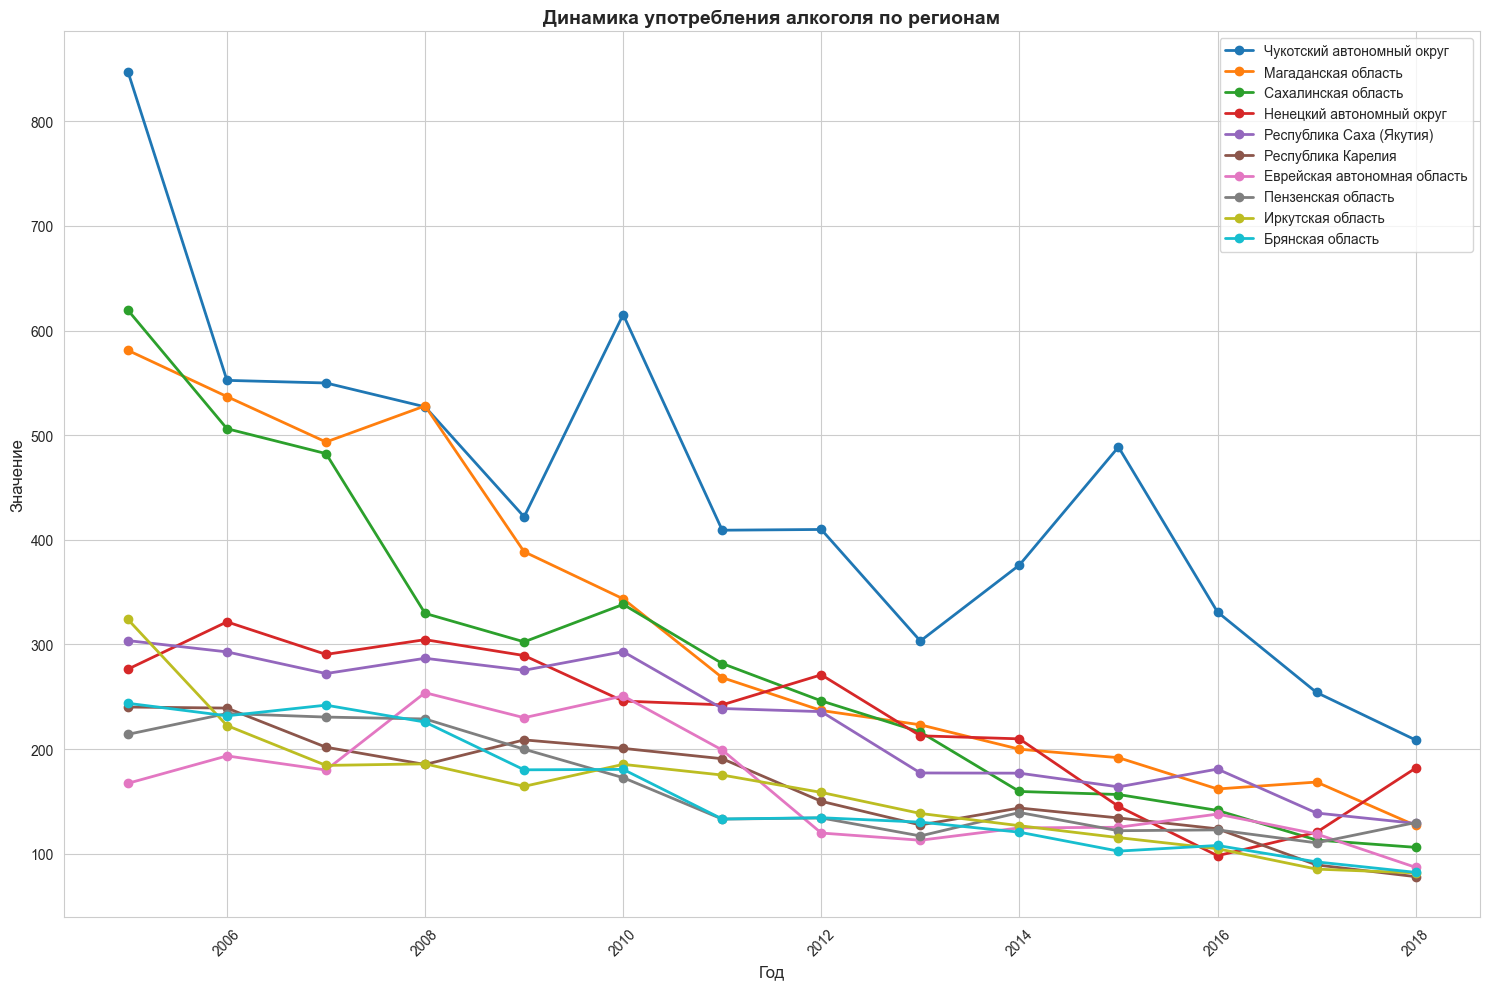

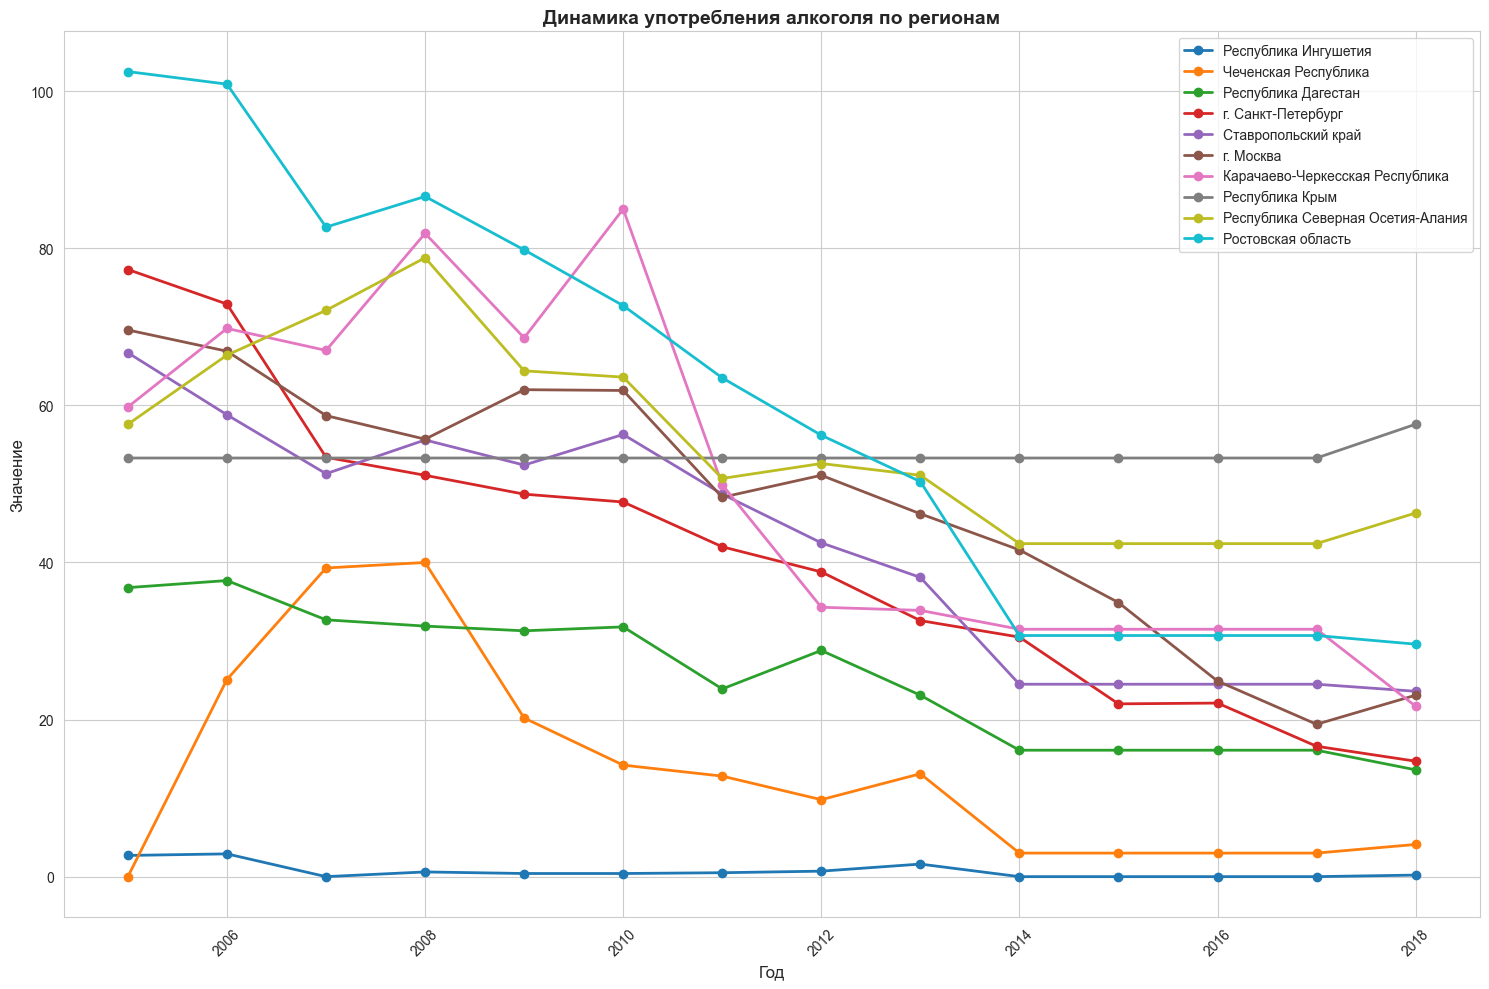

In [289]:
create_less_most_region_graph(all_alco, 'употребления алкоголя')

Самым пьющим регионом оказался Чукотская область, как видим там высокий уровень зарабоной платы и низкая рождаемость детей, вероятно это происходит из-за сурового климата. Самым непьющим регионом является Ингушетия, при этом в Ингушетия считается бедным регионом и возможно у жителей просто нет денег на алкоголь.

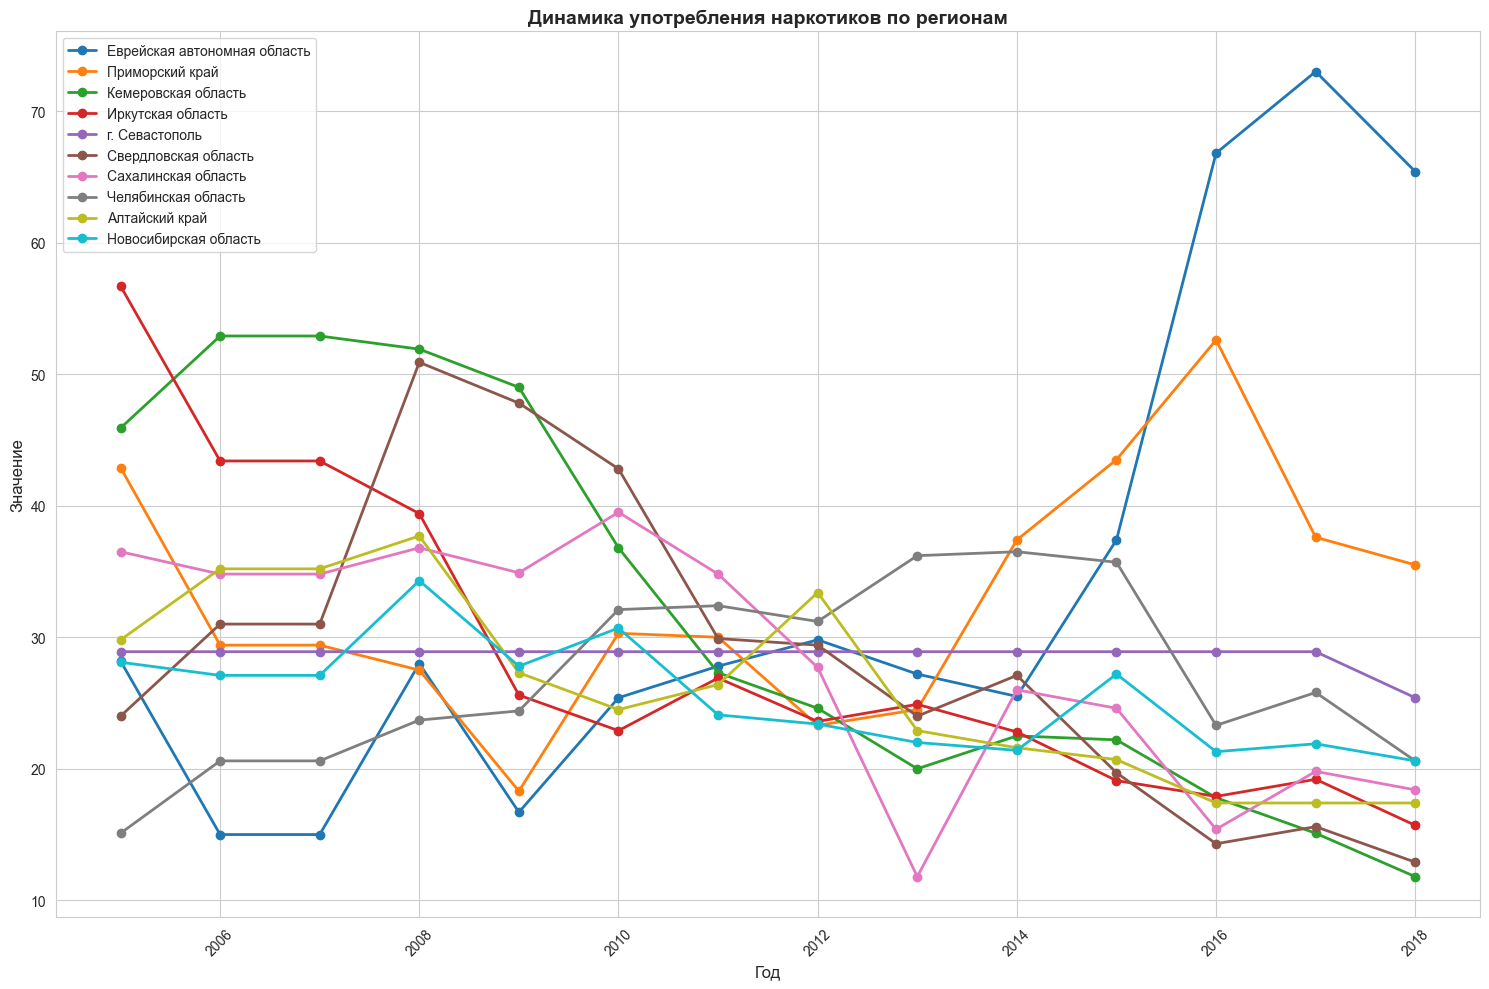

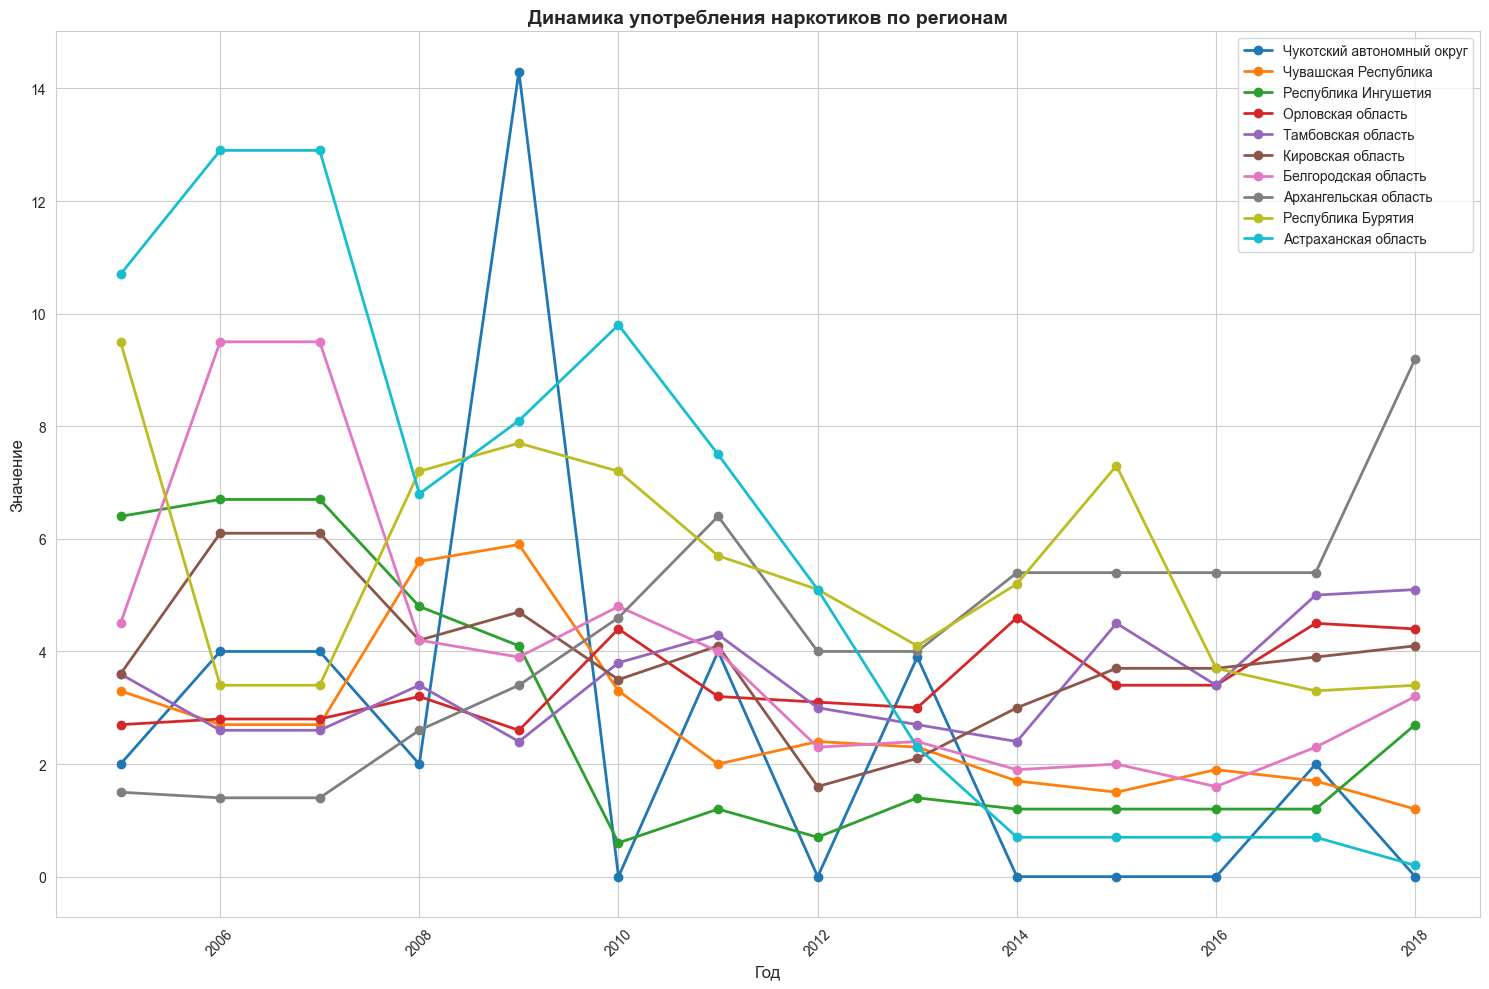

In [290]:
create_less_most_region_graph(all_drugs, 'употребления наркотиков')

По количеству наркозависимых лидирует Еврейская область, на которую раньше мы не обращали внимания, регион входит в топ по бедности и имеет низкий уровень населения при средней зарплате. Самый не употребляющий наркотики регион Чукотский, видим резкий всплеск в 2009 году, с дальнейшей убылью, но при этом регион самый пьющий, возможно из за строгого контроля со стороны правоохранительных органов вспслеск был приостановлен. 

In [291]:
all_alco = all_alco.add_prefix('alco_')

In [292]:
all_drugs = all_drugs.add_prefix('drugs_')

In [293]:
data = data.join(all_alco.set_index('alco_region'), on="region", how="left")

In [294]:
data = data.join(all_drugs.set_index('drugs_region'), on="region", how="left")

In [295]:
data.head()

region  welfare_2015  welfare_2016  welfare_2017  \
0  Белгородская область          11.3          11.8          16.4   
1      Брянская область          22.0          26.6          24.7   
2  Владимирская область          18.1          18.0          24.0   
3   Воронежская область          15.2          15.4          22.8   
4    Ивановская область          18.1          28.9          28.7   

   welfare_2018  welfare_2019  welfare_2020  population_1999  population_2000  \
0          15.6          13.8          16.1        1494868.0        1501699.0   
1          23.7          20.7          23.1        1437471.0        1423178.0   
2          23.4          23.4          26.0        1592184.0        1575507.0   
3          20.9          19.0          21.6        2458558.0        2441337.0   
4          27.0          25.1          25.1        1210603.0        1194595.0   

   population_2001  ...  drugs_2009  drugs_2010  drugs_2011  drugs_2012  \
0        1506976.0  ...         3.9         4.8         4.0         2.3   
1        1407965.0  ...        15.4        18.3        20.3        15.4   
2        1558052.0  ...         8.3         7.8         7.4         9.8   
3        2422371.0  ...        16.1        12.6        20.0        18.1   
4        1178969.0  ...        15.3        14.8        12.8         9.1   

   drugs_2013  drugs_2014  drugs_2015  drugs_2016  drugs_2017  drugs_2018  
0         2.4         1.9         2.0         1.6         2.3         3.2  
1        12.8        14.8         6.7        13.2        10.7         6.1  
2        11.5        15.5        21.3        10.7        12.9         7.8  
3        16.8        19.9        26.0        20.1        23.2        22.5  
4         7.9         9.0         6.4         3.8         7.7         5.7  

[5 rows x 476 columns]

In [296]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020  population_1999  population_2000  \
31          13.0          15.5        1909462.0        1909462.0   
36          13.2          13.3         439941.0         439941.0   

    population_2001  ...  drugs_2009  drugs_2010  drugs_2011  drugs_2012  \
31        1909462.0  ...        14.8        14.8        14.8        14.8   
36         439941.0  ...        28.9        28.9        28.9        28.9   

    drugs_2013  drugs_2014  drugs_2015  drugs_2016  drugs_2017  drugs_2018  
31        14.8        14.8        14.8        14.8        14.8        14.6  
36        28.9        28.9        28.9        28.9        28.9        25.4  

[2 rows x 476 columns]

### Криминал

In [297]:
files = glob.glob(os.path.join('../data/social_russia_data/crimes', '*.xls'))

dfs = {}
for file in files:
    year = file.split('.xls')[0][-4:]
    df = pd.read_excel(file)
    dfs[year] = df
    
display(dfs['2016'])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (122053) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (122053) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Unnamed: 0                                         Unnamed: 1  \
0           NaN                                        ФОРМА 4-ЕГС   
1           NaN                                                NaN   
2           NaN  Раздел 4. Сведения о преступлениях, совершенны...   
3           NaN                                                NaN   
4           NaN                                                NaN   
..          ...                                                ...   
109         NaN                          УТ МВД по Приволжскому ФО   
110         NaN                            УТ МВД по Сибирскому ФО   
111         NaN                      УТ МВД по Северо-Западному ФО   
112         NaN                      УТ МВД по Дальневосточному ФО   
113         NaN                    УТ МВД по Северо-Кавказскому ФО   

          Unnamed: 2          Unnamed: 3          Unnamed: 4  \
0                NaN                 NaN                 NaN   
1                NaN                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3                NaN                 NaN                 NaN   
4    Строка 1: Всего  Неверное имя среза  Неверное имя среза   
..               ...                 ...                 ...   
109               43                1334                 965   
110               30                1630                 708   
111               10                1037                 801   
112               28                 977                 377   
113                9                 785                 637   

             Unnamed: 5          Unnamed: 6          Unnamed: 7  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   NaN                 NaN                 NaN   
4    Неверное имя среза  Неверное имя среза  Неверное имя среза   
..                  ...                 ...                 ...   
109                  16                 287                  28   
110                   7                 332                  44   
111                  19                 304                 102   
112                  13                 162                  50   
113                   2                 105                   1   

             Unnamed: 8          Unnamed: 9         Unnamed: 10  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   NaN                 NaN                 NaN   
4    Неверное имя среза  Неверное имя среза  Неверное имя среза   
..                  ...                 ...                 ...   
109                   2                 253                 225   
110                   0                 457                 330   
111                  13                 336                 179   
112                   0                 194                 268   
113                   0                 135                 119   

            Unnamed: 11  
0           ФОРМА 4-ЕГС  
1                   NaN  
2                   NaN  
3                   NaN  
4    Неверное имя среза  
..                  ...  
109                   1  
110                   1  
111                   4  
112                   0  
113                   0  

[114 rows x 12 columns]

In [298]:
columns = ['empty', 'region', 'underage', 'secondly', 'judged', 'group', 'gang', 'organisation', 'society', 'alco_crime', 'drug_crime', 'toxic_crime', 'family', 'to_women', 'to_underage', 'foreign', 'cis', 'migrant', 'illegal']

for i in dfs.keys():
    new_columns = dfs[i].iloc[10].values
    dfs[i] = dfs[i].iloc[11:].set_axis(new_columns, axis=1)
    dfs[i].reset_index(drop=True, inplace=True)
    dfs[i].columns = columns[:len(dfs[i].columns)]
    dfs[i].drop(['empty'], axis=1, inplace=True)
    dfs[i]['region'] = dfs[i]['region'].str.lstrip()
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Кемеровская область – Кузбасс'].index, 0] = 'Кемеровская область'
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Ханты-Мансийский автономный округ - Югра'].index, 0] = 'Ханты-Мансийский АО'
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Ханты-Мансийский автономный округ –  Югра'].index, 0] = 'Ханты-Мансийский АО'
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Ямало-Ненецкий автономный округ'].index, 0] = 'Ямало-Hенецкий АО'
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Новгородская  область'].index, 0] = 'Новгородская область'
    dfs[i].iloc[dfs[i][dfs[i]['region'] == 'Республика Северная Осетия – Алания'].index, 0] = 'Республика Северная Осетия-Алания'
    
display(dfs['2021'])

region underage secondly  judged group   gang  \
0               Российская Федерация    31865   618158  346328  2690  66929   
1      Центральный федеральный округ     4876   112133   68775   460  16136   
2               Белгородская область      231     4605    2906     9    467   
3                   Брянская область      189     5652    3465    18    586   
4               Владимирская область      334     5106    3017    23    552   
..                               ...      ...      ...     ...   ...    ...   
98         УТ МВД по Приволжскому ФО       43     1473     593     7    479   
99           УТ МВД по Сибирскому ФО       19     1456     720    22    481   
100    УТ МВД по Северо-Западному ФО        8      824     447    18    403   
101    УТ МВД по Дальневосточному ФО        3      897     294     4    150   
102  УТ МВД по Северо-Кавказскому ФО        0      892     550     2    161   

    organisation society alco_crime drug_crime toxic_crime  family to_women  \
0          19674    2498     289195       8100          90  127800    88147   
1           7072     475      50069       2076          16   20755    13994   
2            131      28       2049         87           0     845      562   
3            174      18       2847         17           1    1309      909   
4             30       6       2672         22           0    1065      730   
..           ...     ...        ...        ...         ...     ...      ...   
98            55       0        245         33           1       4        3   
99            31       0        329         30           0       2        2   
100           38       0        164         15           0       4        4   
101           78       6        123         18           0       0        0   
102           27       0         38         39           0       2        1   

    to_underage foreign    cis migrant illegal  
0         62844   36420  28520    7910    2803  
1         10535   16161  13347    6398     935  
2           458     285    103      57      31  
3           605     328    191      18      97  
4           536     272    229      65      22  
..          ...     ...    ...     ...     ...  
98            1      90     75      15       1  
99            1      33     29       2       1  
100           1     182    151       7      26  
101           0      43     29      10       1  
102           0     106     48       7      20  

[103 rows x 18 columns]

In [299]:
graph_crimes = dfs['2022'].copy()
graph_crimes['sum'] = graph_crimes.iloc[:,1:].apply(lambda row: row.sum(), axis=1)
graph_crimes = graph_crimes[graph_crimes['region'].isin(all_regions)]

graph_crimes.head()

region underage secondly judged group gang organisation  \
2  Белгородская область       72     2674   1821     6  228          187   
3      Брянская область       81     3116   1921     8  342          228   
4  Владимирская область      124     2918   1728     6  252           61   
5   Воронежская область      167     4917   3022     9  598           45   
6    Ивановская область      148     2392   1391     7  318           51   

  society alco_crime drug_crime toxic_crime family to_women to_underage  \
2      27        963         22           0    432      276         240   
3      49       1313         17           1    650      456         311   
4      11       1321          5           0    524      342         261   
5      29       1714         63           0    683      455         450   
6       1       1122         11           0    536      384         229   

  foreign  cis migrant illegal    sum  
2     100   37       9      14   7108  
3     137  108       2      30   8770  
4     134  105      19      11   7822  
5     233  148       7       4  12544  
6     138  132      14       1   6875

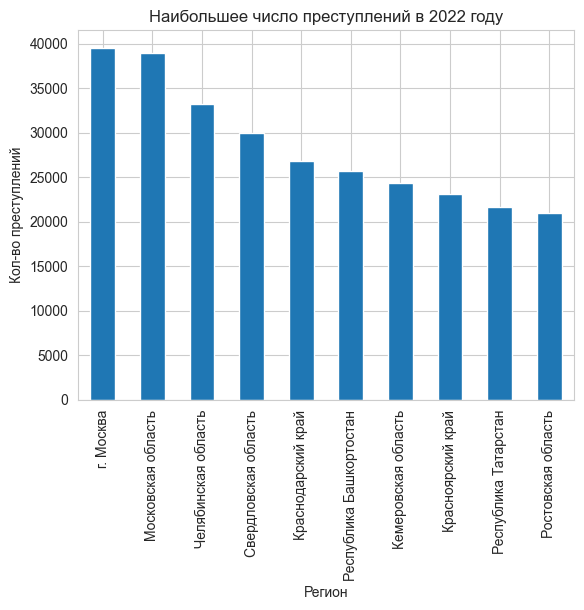

In [300]:
high_crime = graph_crimes.sort_values('sum', ascending=False)
high_crime = high_crime.iloc[:10].set_index('region')

high_crime['sum'].plot(kind='bar')
plt.title('Наибольшее число преступлений в 2022 году')
plt.xlabel('Регион')
plt.ylabel('Кол-во преступлений')
plt.show()

Можно выделить Москву и область, так как ранее было заметно, что там высокий уровень населения и высокий уровень бедности среди рабочего класса.

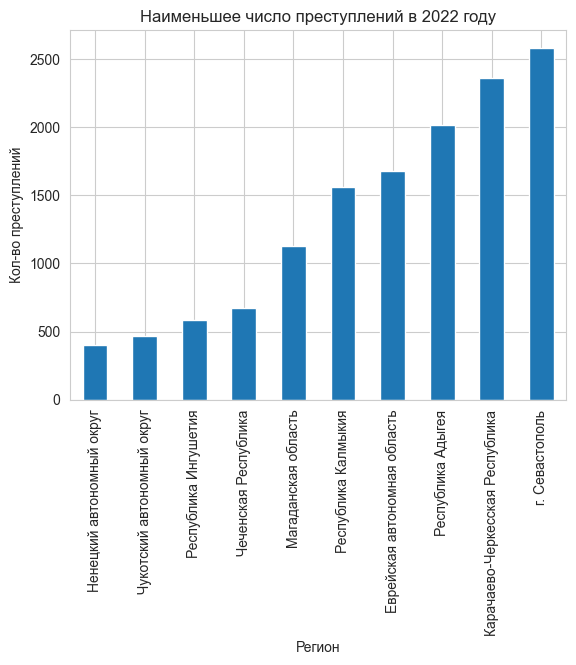

In [301]:
low_crime = graph_crimes.sort_values('sum', ascending=True)
low_crime = low_crime.iloc[:10].set_index('region')

low_crime['sum'].plot(kind='bar')
plt.title('Наименьшее число преступлений в 2022 году')
plt.xlabel('Регион')
plt.ylabel('Кол-во преступлений')
plt.show()

Несмотря на бедности в регионе в Ингушетии низкий уровень преступности, но также это может говорить и о низкой популяции в регионе. Проще оценить данный критерий на графике популяции к кол-ву преступлений.

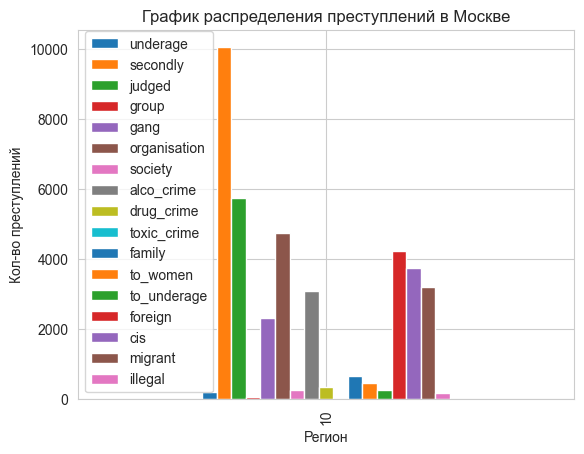

In [302]:
moscow_crime = dfs['2022'].copy()
moscow_crime = moscow_crime[moscow_crime['region'] == 'г. Москва']

moscow_crime.iloc[:, 1:].plot(kind='bar')
plt.title('График распределения преступлений в Москве')
plt.xlabel('Регион')
plt.ylabel('Кол-во преступлений')
plt.show()

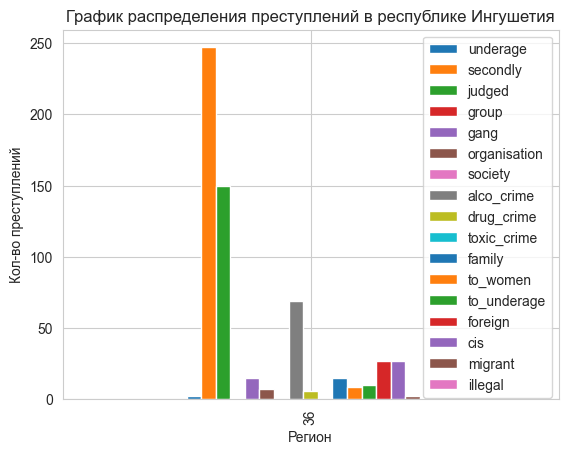

In [303]:
moscow_crime = dfs['2022'].copy()
moscow_crime = moscow_crime[moscow_crime['region'] == 'Республика Ингушетия']

moscow_crime.iloc[:, 1:].plot(kind='bar')
plt.title('График распределения преступлений в республике Ингушетия')
plt.xlabel('Регион')
plt.ylabel('Кол-во преступлений')
plt.show()

По графикам распределения преступлений можно выделить, что преступления зачастую совершают люди, которые раннее уже их совершали и были судимы.

In [304]:
crime_tables = {}

def setCrimeTable(df, year):
    for i in range(1, len(df.columns)): 
        col_name = df.columns[i]
        newTable = df.iloc[:, [0, i]]
        newTable.columns = [f'{col_name}_region', f'{col_name}_{year}']
        
        if (col_name in crime_tables):
            crime_tables[col_name] = crime_tables[col_name].join(newTable.set_index(f'{col_name}_region'), on=f'{col_name}_region', how="outer")
        else:
            crime_tables[col_name] = newTable
            crime_tables[col_name].columns = newTable.columns

for i in dfs.keys():
    setCrimeTable(dfs[i], i)
    
print(crime_tables)

{'underage':           underage_region underage_2016 underage_2017 underage_2021  \
72         Алтайский край          1310          1134           770   
85       Амурская область           782           709           311   
21  Архангельская область           756           668           439   
41   Астраханская область           378           320           333   
2    Белгородская область           272           218           231   
..                    ...           ...           ...           ...   
69      Ямало-Hенецкий АО           228           143            76   
19    Ярославская область           544           393           282   
10              г. Москва           728           566           469   
23     г. Санкт-Петербург           703           575           420   
43         г. Севастополь           100            57            66   

   underage_2022 underage_2020 underage_2019 underage_2018  
72           363           887           961          1081  
85          

In [305]:
for i in crime_tables.keys():
    data = data.join(crime_tables[i].set_index(f'{i}_region'), on="region", how="left")

In [306]:
data[data.isna().any(axis=1)]

region  welfare_2015  welfare_2016  welfare_2017  welfare_2018  \
31  Республика Крым          12.6          10.2          13.6          13.5   
36   г. Севастополь          12.2          10.5          13.3          14.1   

    welfare_2019  welfare_2020  population_1999  population_2000  \
31          13.0          15.5        1909462.0        1909462.0   
36          13.2          13.3         439941.0         439941.0   

    population_2001  ...  to_underage_2021  to_underage_2022  foreign_2021  \
31        1909462.0  ...               688               322          1020   
36         439941.0  ...               111                44           233   

    foreign_2022  cis_2021  cis_2022  migrant_2021  migrant_2022  \
31           474       172        75             2             3   
36           143        38        33             3             1   

    illegal_2021  illegal_2022  
31            15             5  
36             1             1  

[2 rows x 560 columns]

Сохраним готовый датафрейм в отдельном файле

In [308]:
data.to_csv('../data/social_data.csv', index=False)

### Итог

После рассмотрения графиков можем выделить, что к благоустроенным регионам мы точно можем выделить Москву и область, а также Ямало Ненецкий округ, но там стоит обратить на загрязненные воду и воздух судя по списку болезней. К неблагоприятным районам можем отнести Ингушетию и республику Тыву по нескольким параметрам. В бедных регионах плохо развита торговля и промышленность и низкий уровень популяции. Под вопросом у нас Карачаево Черкесская республика, Чукотская республика и Еврейский округ, так как данные регионы можно выделить к бедным лишь по некоторым параметрам, таким как алкоголизм, наркотики и низкий уровень населения. Чтобы окончательно определится со списком неблагоприятных регионов лучше воспользоваться кластеризацией с помощью моделей машинного обучения. 